In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from matplotlib import cm
from scipy import interpolate
from astropy.convolution import convolve, Box1DKernel, convolve_fft, Gaussian1DKernel

from astropy.modeling import models, fitting


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Plot of some M dwarfs

In [4]:
# plt.figure(figsize=(8.5, 8.5))
# path = '/media/david/1tb_storage1/emergency_data/PyHammer-2.0.0/resources/templates/'
# sptypes = ['M0', 'M2', 'M4', 'M6', 'M8']
# nspec = len(sptypes) 
# cols = np.linspace(0, 1, nspec)

# for i, sptype in enumerate(sptypes):
#         specs = glob.glob('{}{}_+0.0_Dwarf.fits'.format(path, sptype))+glob.glob('{}{}.fits'.format(path, sptype))
#         if len(specs) > 0 :
#             data = fits.getdata(specs[0])
#             w, f = 10**data['Loglam'], data['Flux']
#             mask = (w < 9350) | (w > 9450)
#             f = f/np.max(data['Flux'][mask])+nspec-i
#             plt.plot(w, f)#, plt.cm.cool(cols[i]))
#             labpos= (np.mean(f[(w > 9500) & (w < 10000)]))+0.2 #position of the label just above the spectrum

#             plt.annotate(sptype, (0.9, labpos), xycoords=('axes fraction', 'data'), ha='left', va='bottom')
# plt.xlim(w[0], w[-1])

# plt.xlabel('Wavelength (\AA)', size=20)
# plt.ylabel('Normalised Flux+constant', size=20)
# plt.tight_layout()
# plt.savefig('plots/mdwarf_specs.png', facecolor='w', dpi=150)

In [5]:
# from scipy.io import readsav
soldat = Table.read('../../../hwo/Solar_1au_sed.csv')
sw, sf = soldat['WAVELENGTH'], soldat['FLUX']
# sol_spec =  readsav('../../stuff/Solar-data.idlsav')

# sw = sol_spec['wave']*10
# sf = sol_spec['flux']*100

In [6]:
r_t1 = 0.117*u.Rsun
r_674 = 0.35*u.Rsun
t_t1= 2560*u.K
t_674 = 3400*u.K
t_sun = 5777*u.K
d_sun = (1*u.au).to(u.pc)
d_674= 6.4*u.pc
# bb_scale = (u.Rsun**2 * t_sun**4)/(r_t1**2 * t_t1**4)*(d_t1/d_sun)**2
bb_scale = (u.Rsun**2 * t_sun**4)/(r_674**2 * t_674**4)*(d_674/d_sun)**2
print(bb_scale)

118568118309998.17


In [80]:
# path = '/media/david/1tb_storage1/emergency_data/mega_muscles/v02_seds/'
path = '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/'
specs = glob.glob('{}*/*adapt-var*'.format(path))
specs

['/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ1132/hlsp_muscles_multi_multi_gj1132_broadband_v24_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ15A/hlsp_muscles_multi_multi_gj15a_broadband_v24_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ163/hlsp_muscles_multi_multi_gj163_broadband_v24_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ649/hlsp_muscles_multi_multi_gj649_broadband_v24_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ674/hlsp_muscles_multi_multi_gj674_broadband_v24_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ676A/hlsp_muscles_multi_multi_gj676a_broadband_v24_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ699/hlsp_muscles_multi_multi_gj699_broadband_v24_adapt-var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ729/hlsp_muscles_multi

In [8]:
stars = []


for j, spec in enumerate(specs):
    
#     print(spec)
#     plt.figure(figsize = (4*len(doublets), 10))
#     gs = GridSpec(2, 4)
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
#     if star=='GJ674':
    print(star)
    stars.append(star)
#         w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
# #         wn, fn, en = remove_negatives(w, f, e)
#         plt.plot(w[w< 4000], f[w< 4000])    
#         plt.plot(wn[wn< 4000], fn[wn< 4000])
#         plt.yscale('log')
#         plt.show()
    

GJ1132
GJ15A
GJ163
GJ649
GJ674
GJ676A
GJ699
GJ729
GJ849
L-980-5
LHS-2686
2MASS-J23062928-0502285


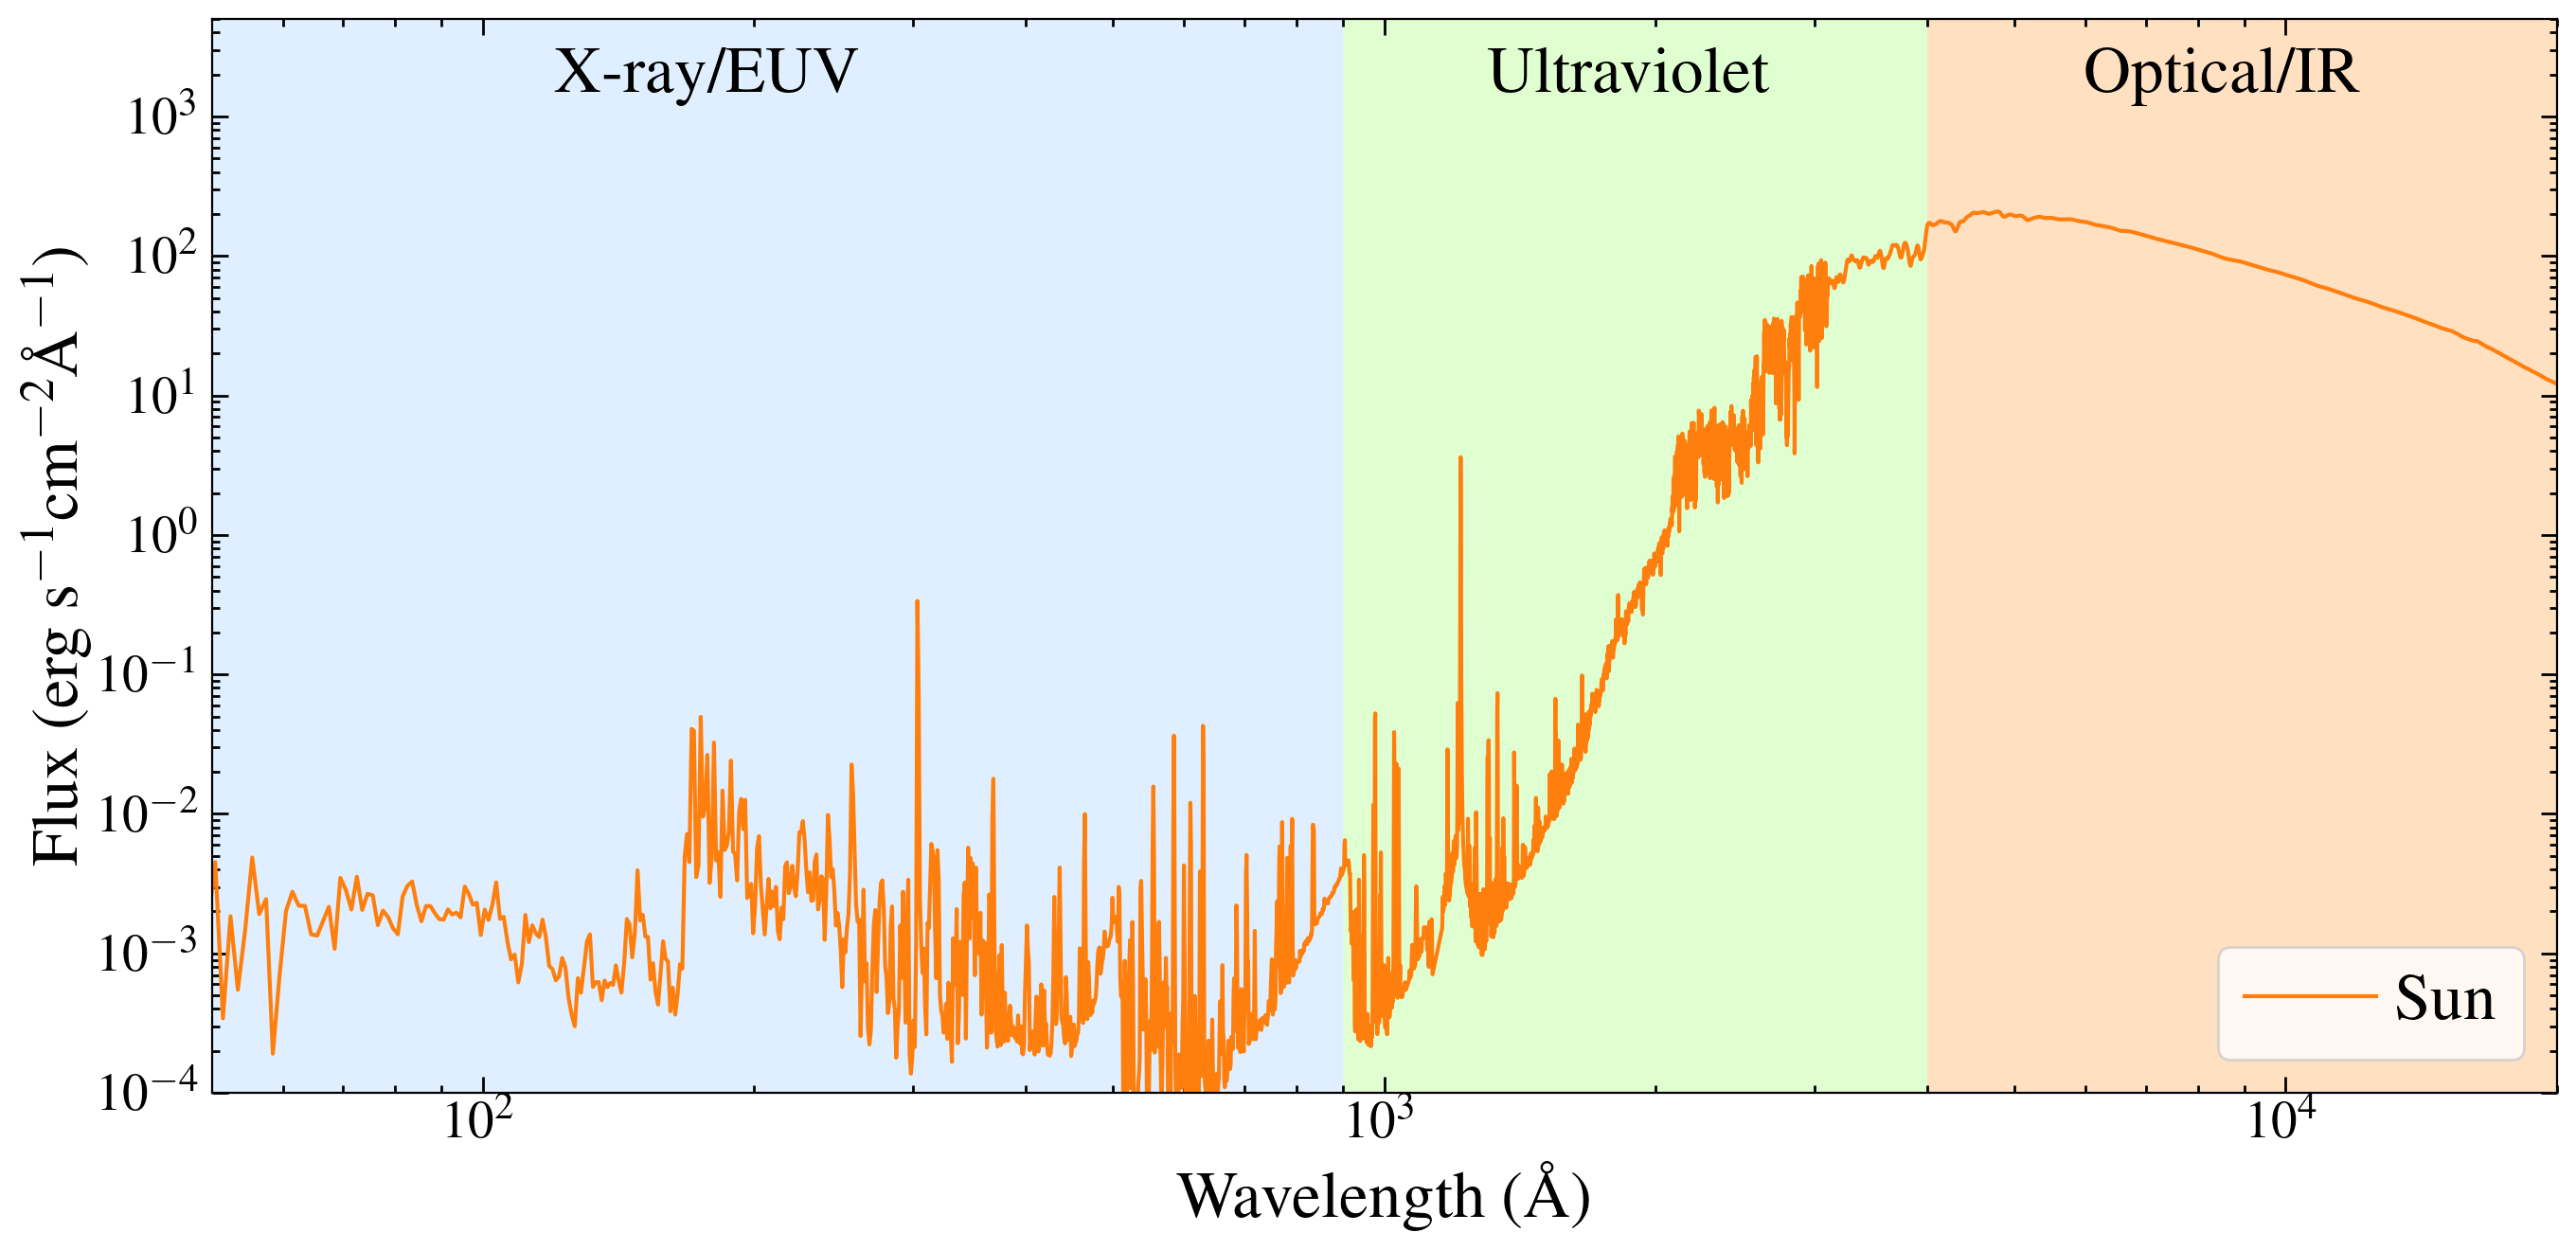

In [9]:
plt.figure(figsize=(14, 7))


plt.plot(sw, sf, c='C1', label = 'Sun')
# plt.plot(wn, fn*bb_scale, c='C3', label = 'GJ674 (M3)')
plt.xlim(50.1, 20000)
plt.yscale('log')
plt.xscale('log')
plt.ylim(1e-4, 5e3)

plt.fill_between([0,900],0,10000, facecolor='#99ccff',alpha =0.3)
#plt.annotate('Thermosphere heating/removal', (12, 1e-12))

plt.fill_between([900,4000],0,10000, facecolor='#99ff66', alpha =0.3)

# plt.fill_between([2000,4000],0,10000, facecolor='#ffff99',alpha =0.5)
#plt.annotate(' Photochemistry', (900, 1e-13))

plt.fill_between([4000,60000],0,10000, facecolor='#ff9933',alpha =0.3)
#plt.annotate('Atmosphere \& surface heating', (4100, 1e-12))

 
bar_y = 1e3
label_y = bar_y*1.5
e_y = bar_y *0.3
# plt.errorbar((5,50),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('XMM', (10, label_y))

# plt.errorbar((50,100),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('APEC', (75, label_y), ha='center')

# plt.errorbar((100,1060),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('EUV Model', (350, label_y), ha='center')

# plt.errorbar((1068, 5692),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('HST', (1900, label_y))

# plt.errorbar((5692, 25000),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# plt.annotate('PHOENIX', (8000, label_y))
plt.annotate('X-ray/EUV' ,(120, label_y), size=25)
plt.annotate('Ultraviolet' ,(1300, label_y), size=25)
plt.annotate('Optical/IR' ,(6000, label_y), size=25)

plt.xlabel('Wavelength (\AA)', size=25)
plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
plt.legend(fontsize=25, loc=4,frameon=True)
plt.tight_layout()
# plt.savefig('plots/just_sun.png', dpi=150, facecolor='w')
# plt.savefig('plots/gj674_sun.png', dpi=150, facecolor='w')


In [10]:
# plt.figure(figsize=(14, 7))


# # plt.plot(sw, sf, c='C1', label = 'Sun')
# plt.plot(wn, fn)#, c='C3', label = 'GJ674 (M3)')
# plt.xlim(5, 100000)
# plt.yscale('log')
# plt.xscale('log')
# plt.ylim(1.1e-18, 9.9e-12)

# # plt.fill_between([0,900],0,10000, facecolor='#99ccff',alpha =0.3)
# # #plt.annotate('Thermosphere heating/removal', (12, 1e-12))

# # plt.fill_between([900,4000],0,10000, facecolor='#99ff66', alpha =0.3)

# # # plt.fill_between([2000,4000],0,10000, facecolor='#ffff99',alpha =0.5)
# # #plt.annotate(' Photochemistry', (900, 1e-13))

# # plt.fill_between([4000,60000],0,10000, facecolor='#ff9933',alpha =0.3)
# # #plt.annotate('Atmosphere \& surface heating', (4100, 1e-12))

 
# # bar_y = 1e3
# # label_y = bar_y*1.5
# # e_y = bar_y *0.3
# # # plt.errorbar((5,50),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# # # plt.annotate('XMM', (10, label_y))

# # # plt.errorbar((50,100),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# # # plt.annotate('APEC', (75, label_y), ha='center')

# # # plt.errorbar((100,1060),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# # # plt.annotate('EUV Model', (350, label_y), ha='center')

# # # plt.errorbar((1068, 5692),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# # # plt.annotate('HST', (1900, label_y))

# # # plt.errorbar((5692, 25000),(bar_y, bar_y), yerr= [[e_y, e_y],[0,0]], c ='k')
# # # plt.annotate('PHOENIX', (8000, label_y))
# # plt.annotate('X-ray/EUV' ,(120, label_y), size=25)
# # plt.annotate('Ultraviolet' ,(1300, label_y), size=25)
# # plt.annotate('Optical/IR' ,(6000, label_y), size=25)

# plt.xlabel('Wavelength (\AA)', size=25)
# plt.ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)', size=25)
# # plt.legend(fontsize=25, loc=4,frameon=True)
# plt.tight_layout()
# # plt.savefig('plots/just_sun.png', dpi=150, facecolor='w')
# plt.savefig('plots/gj674_clean_png', dpi=150, facecolor='w')


In [11]:
# import mplcyberpunk
# plt.style.use("cyberpunk")

# fig = plt.figure(figsize=(20, 15))
# fig, axes = plt.subplots(4, 3,  sharex=True, sharey=True,figsize=(20,15))

# for j, spec in enumerate(specs):
    
# #     print(spec)
# #     plt.figure(figsize = (4*len(doublets), 10))
# #     gs = GridSpec(2, 4)
#     plt.subplot(4, 3, j+1)
#     data = fits.getdata(spec, 1)
#     star = fits.getheader(spec)['TARGNAME']
#     # boloflux = fits.getheader(spec)['BOLOFLUX']
# #     print(star)
# #     stars.append(star)
#     w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
# #     wn, fn, en = remove_negatives(w, f, e)
# #         plt.plot(w[w< 4000], f[w< 4000])    
#     plt.step(w, f/np.median(f), c='C{}'.format(j), where='mid')
#     # plt.step(w, f/boloflux, c='C{}'.format(j))
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.xlim(10.1, 99999.9)
#     plt.ylim(1.1e-6, 1.7e1)
# #     mplcyberpunk.add_glow_effects()
#     if star == '2MASS-J23062928-0502285':
#         star = 'TRAPPIST-1'
#     plt.title(star)
# #     if j == 3:
# #         plt.ylabel('Normalised Flux', size=25)
# #     if j == 10:
# #         plt.xlabel('Wavelength (\AA)', size=25)

# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# plt.ylabel('Normalised Flux', size=25, labelpad=12)
# plt.xlabel('Wavelength (\AA)', size=25)
# plt.tight_layout()
# # plt.subplots_adjust(left=)

# plt.savefig('plots/gallery.png', dpi=150, facecolor='w')
# plt.savefig('plots/gallery.pdf', dpi=150, facecolor='w')
# # plt.savefig('plots/gallery_cp.png', dpi=150)
# #     plt.show()

Habitable zones

In [12]:
habz = np.loadtxt('HZs.dat')

In [13]:
starsdata = Table.read('../../../stars_table/EEM_dwarf_UBVIJHK_colors_Teff_fixed.csv', format='csv')
tstars, lstars = starsdata['Teff'], 10**starsdata['logL']
li = interpolate.interp1d(tstars, lstars)

In [14]:
mm_params = Table.read('../optical/stellar_parameters.csv')
mm_params.dtype.names

('Target',
 'RAJ2000',
 'DEJ2000',
 'Jmag',
 'J_e',
 'Hmag',
 'H_e',
 'Kmag',
 'K_e',
 'Rmag',
 'R_e',
 'spt',
 'L_bol',
 'L_bol_e',
 'Mass',
 'Mass_e',
 'Radius',
 'Radius_e',
 'Teff',
 'Teff_e',
 'parallax',
 'distance',
 'P_rot_d',
 'lya_flux',
 'lya_pos_e',
 'lya_neg_e')

In [15]:
planet_m = {'GJ676A':[4.4, 11.5, 2127, 2161], 'GJ15A':[ 5.35], 'GJ649':[87.4], 'GJ674':[11.1], 'GJ163':[10.6, 6.8, 29.0],
           'GJ1132':[1.66,2.64], 'GJ849':[283, 342.9], 'TRAPPIST-1':[1.017, 1.156, 0.297,0.772, 0.934,1.148, 0.331]} 

planet_a = {'GJ676A':[0.04, 0.187, 1.8152,6.6], 'GJ 15A':[ 0.072], 'GJ649':[1.13], 'GJ674':[0.039], 'GJ163':[0.061, 0.125, 1.03],
           'GJ1132':[0.0153,0.0476], 'GJ849':[2.409, 4.974], 'TRAPPIST-1':[0.011, 0.015, 0.022,0.029, 0.039,0.047, 0.062]} 

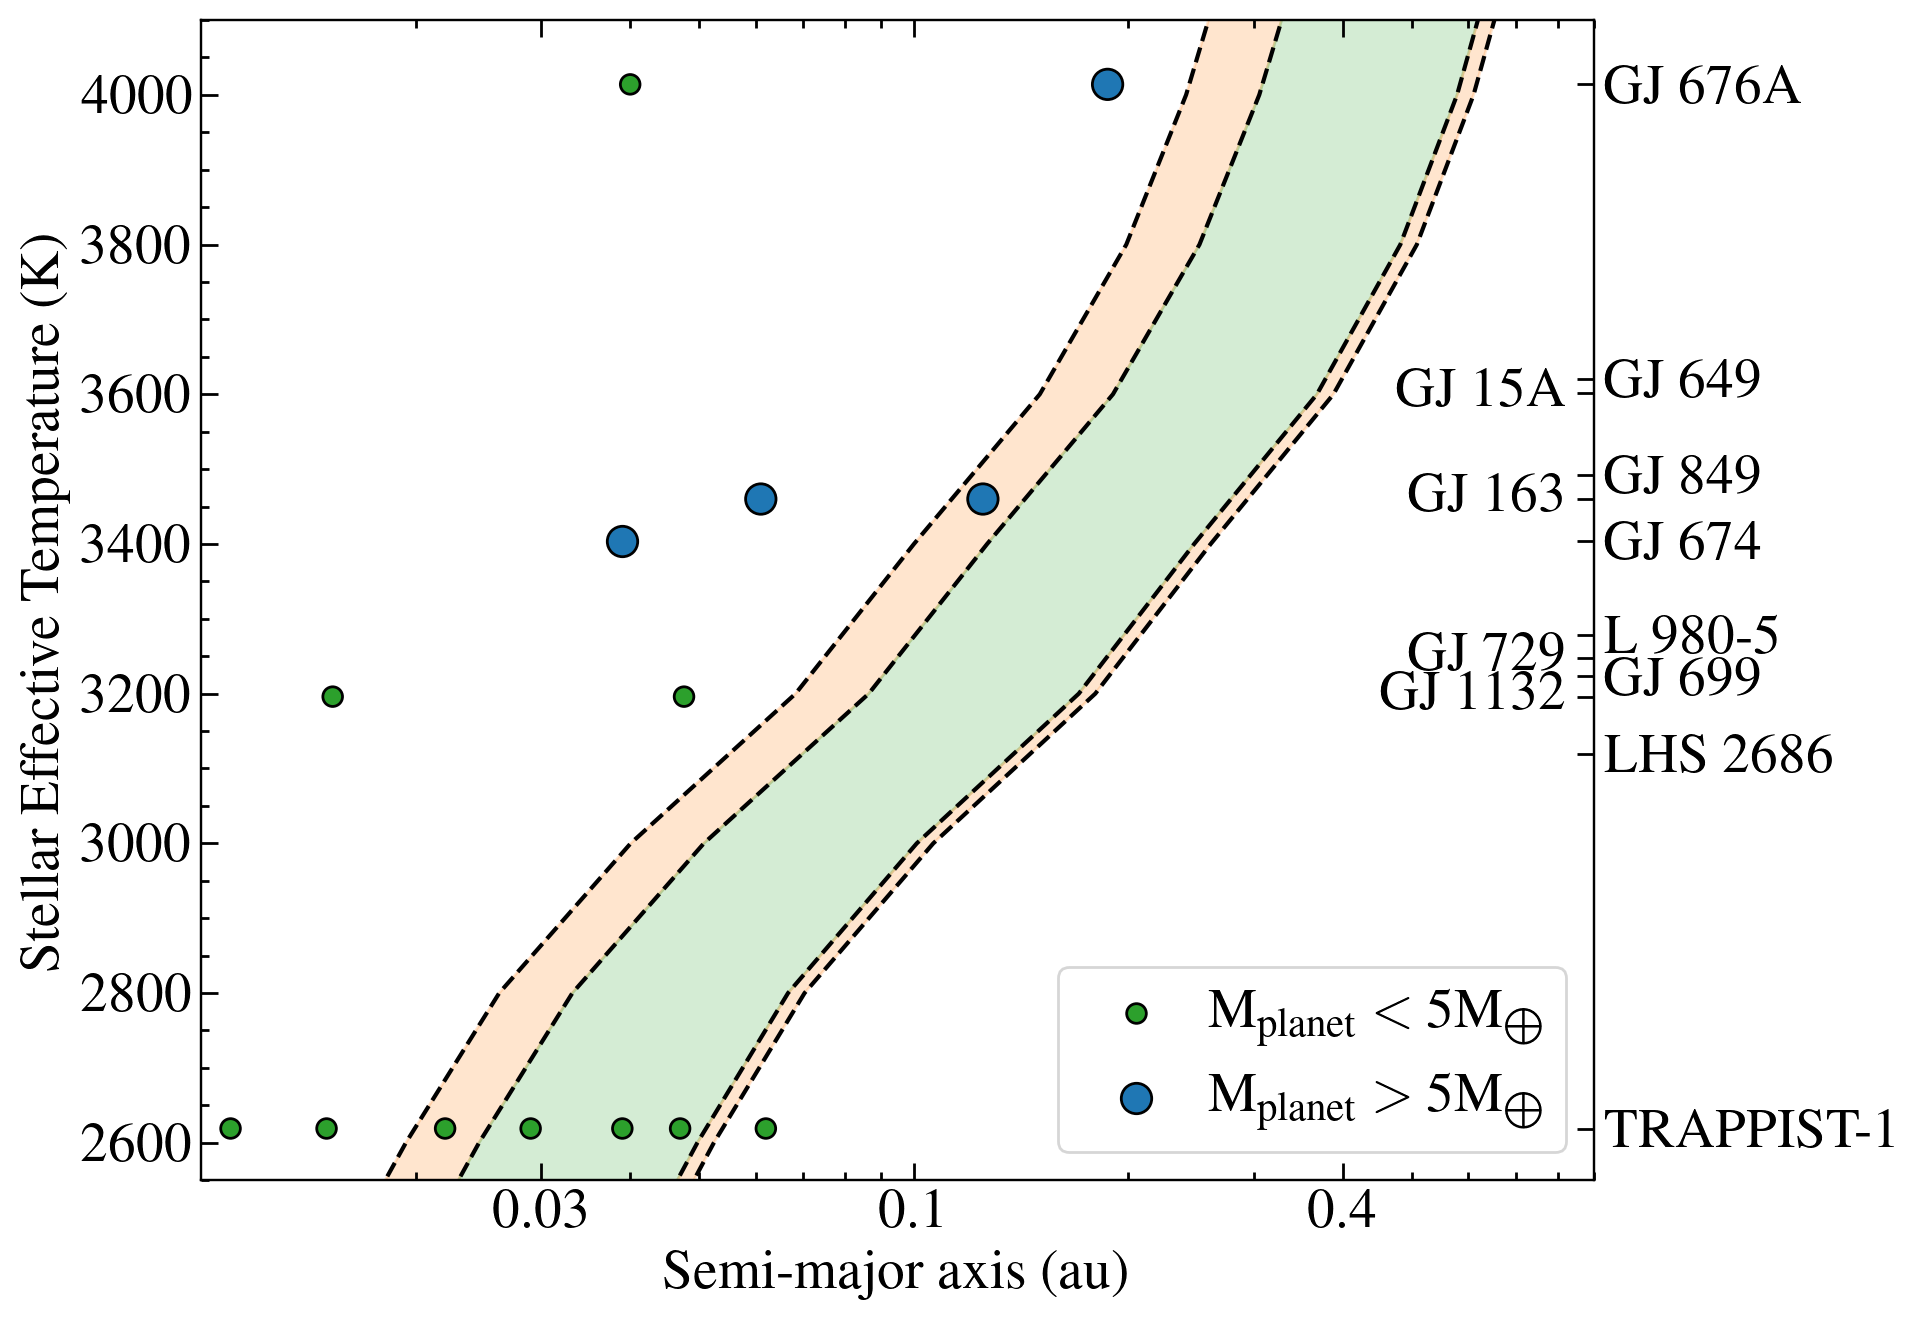

In [16]:
labels = ['Teff(K)', 'Recent Venus', 'Runaway Greenhouse', 'Maximum Greenhouse','Early Mars', '5ME Runaway  Greenhouse', '0.1ME Runaway Greenhouse']
                                              

fig, ax =plt.subplots(figsize=(10, 7), sharex=True, sharey=True)

tefflims = [2550, 4100]

columns = [1, 2, 3, 4]
cols = ['C3','C2', 'C2', 'C3']
# fillcols=['C3','C1', 'C2', 'C1']
fillcols=['w','C1', 'C2', 'C1']
hteffs = habz[:,0]
hlums = li(hteffs)
alast = np.full(len(hteffs), 0)
for i, col in enumerate(columns):
    s = habz[:,col]
    a = (hlums/s)**0.5
    plt.plot(a,hteffs, label = labels[col], c='k', ls='--', alpha=1.)
    plt.fill_betweenx(hteffs, alast, a, color=fillcols[i], alpha=0.2)
    alast = a
# plt.fill_betweenx(hteffs, alast, np.full(len(alast), 10), color='cyan', alpha=0.2)
    
    
    


t1 = [0.018942461658199808, 0.023992418349443854, 0.04864997693231791, 0.05131643030421871]
# [plt.axvline(line) for line in t1] 

plt.xlabel('Semi-major axis (au)')
plt.ylabel('Stellar Effective Temperature (K)')
plt.xscale('log')
# plt.yscale('log')
plt.ylim(tefflims[0], tefflims[1])
plt.xlim(0.01,0.9)
plt.xticks((0.03, 0.1, 0.4), (0.03, 0.1, 0.4))

#calculate the middle of the conservative HZ for a given teff.
hz_in, hz_out = habz[:,2], habz[:,3]
hz_ini = interpolate.interp1d(hteffs, hz_in)
hz_outi = interpolate.interp1d(hteffs, hz_out)
for teff in mm_params['Teff']:
    lum = li(teff)
    hi = (lum/hz_ini(teff))**0.5
    ho = (lum/hz_outi(teff))**0.5
#     plt.scatter(np.mean([hi, ho]), teff)

for star in mm_params['Target']:
    if star in planet_a:
        planets = planet_a[star]
        masses = planet_m[star]
        sizes  = [] #marker size scales with mass roughly
        cols = []
        for mass in masses: 
            if mass <=5:
                sizes.append(50)
                cols.append('C2')
            else:
                sizes.append(120)
                cols.append('C0')
        teff = mm_params['Teff'][mm_params['Target']==star]
        plt.scatter(planets, np.full(len(planets), teff), s=sizes, c=cols, edgecolor='k')


ax2 = ax.twinx()
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    right=False)      # ticks along the bottom edge are off   

teff_ticks = [2619, 3119, 3196, 3223, 3248, 3278, 3404, 3460, 3492, 3601, 3621, 4014]
tick_names = ['TRAPPIST-1', 'LHS 2686','' , 'GJ 699', '','L 980-5' , 'GJ 674','', 'GJ 849','' , 'GJ 649', 'GJ 676A']
skip_names = ['GJ 1132','GJ 729','GJ 163','GJ 15A']
skip_teffs = [3196,3248,3460, 3601]


ax2.set_yticks(teff_ticks, minor=False)
ax2.set_yticklabels(tick_names)
ax2.set_ylim(tefflims[0], tefflims[1])
[plt.annotate(name, (0.98,teff), xycoords=('axes fraction', 'data'), ha='right', va='center') for name, teff in zip(skip_names, skip_teffs)]

plt.scatter(10000, 10000, c='C2', edgecolor='k', s=50, label = r'$\mathrm{M_{planet}} < 5\mathrm{M_{\bigoplus}}$')
plt.scatter(10000, 10000, c='C0', edgecolor='k', s=120, label = r'$\mathrm{M_{planet}} > 5\mathrm{M_{\bigoplus}}$')

plt.legend(loc=4, frameon=True)
plt.tight_layout()
# plt.savefig('plots/planets_hz.png', facecolor='w', dpi=150)
# plt.savefig('plots/planets_hz.pdf', facecolor='w', dpi=150)

In [17]:
print(max(mm_params['Teff']))
print(min(mm_params['Teff']))

4014
2619


In [18]:
args = np.argsort(mm_params['Teff'])
print(np.array(mm_params['Teff'][args]))
print(np.array(mm_params['Target'][args]))

[2619 3119 3196 3223 3248 3278 3404 3460 3492 3601 3621 4014]
['TRAPPIST-1' 'LHS2686' 'GJ1132' 'GJ699' 'GJ729' 'L980-5' 'GJ674' 'GJ163'
 'GJ849' 'GJ15A' 'GJ649' 'GJ676A']


In [19]:

# import mplcyberpunk
# plt.style.use("cyberpunk")

# # fig = plt.figure(figsize=(20, 15))
# fig, axes = plt.subplots(4, 3,  sharex=True, sharey=True,figsize=(20,15))

# for j, spec in enumerate(specs):
    
# #     print(spec)
# #     plt.figure(figsize = (4*len(doublets), 10))
# #     gs = GridSpec(2, 4)
#     plt.subplot(4, 3, j+1)
#     data = fits.getdata(spec, 1)
#     star = fits.getheader(spec)['TARGNAME']
#     # boloflux = fits.getheader(spec)['BOLOFLUX']
# #     print(star)
# #     stars.append(star)
#     w, f, e, inst = data['WAVELENGTH'], data['FLUX'], data['ERROR'], data['INSTRUMENT']
# #     wn, fn, en = remove_negatives(w, f, e)
# #         plt.plot(w[w< 4000], f[w< 4000])    
#     plt.step(w, f/np.median(f), c='C{}'.format(j), where='mid')
#     # plt.step(w, f/boloflux, c='C{}'.format(j))
#     plt.yscale('log')
#     plt.xscale('log')
#     plt.xlim(10.1, 99999.9)
#     plt.ylim(1.1e-6, 1.7e1)
#     mplcyberpunk.add_glow_effects()
#     if star == '2MASS-J23062928-0502285':
#         star = 'TRAPPIST-1'
#     plt.title(star)
# #     if j == 3:
# #         plt.ylabel('Normalised Flux', size=25)
# #     if j == 10:
# #         plt.xlabel('Wavelength (\AA)', size=25)

# fig.add_subplot(111, frame_on=False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# plt.ylabel('Normalised Flux', size=25, labelpad=12)
# plt.xlabel('Wavelength (\AA)', size=25)
# plt.tight_layout()
# # plt.subplots_adjust(left=)


# plt.savefig('plots/gallery_cp.png', dpi=150)
# plt.savefig('plots/gallery_cp.pdf', dpi=150)
# #     plt.show()

Emisson lines and cross sections, formation temperature

In [20]:
path = '/media/david/2tb_ext_hd/hddata/mega_muscles/v10_hlsp/LHS-2686/'
sed = 'hlsp_muscles_multi_multi_lhs-2686_broadband_v10_var-res-sed.fits'

data = fits.getdata('{}{}'.format(path, sed), 1)

wav, fl = data['WAVELENGTH'], data['FLUX']


In [21]:
demlines = Table.read('../lines/plot_linelist.csv')
demlines.dtype.names

('Ion', 'Wavelength', 'Likelihood to measure', 'Log Formation Temperature')

In [22]:
csections = glob.glob('../../cross_sections/*.txt')
csections

['../../cross_sections/N2_cs.txt',
 '../../cross_sections/CO2_cs.txt',
 '../../cross_sections/H2_cs.txt',
 '../../cross_sections/O2_cs.txt',
 '../../cross_sections/O3_cs.txt',
 '../../cross_sections/H2O_cs.txt',
 '../../cross_sections/CH4_cs.txt',
 '../../cross_sections/N2O_cs.txt']

(0.0, 2.5e-17)

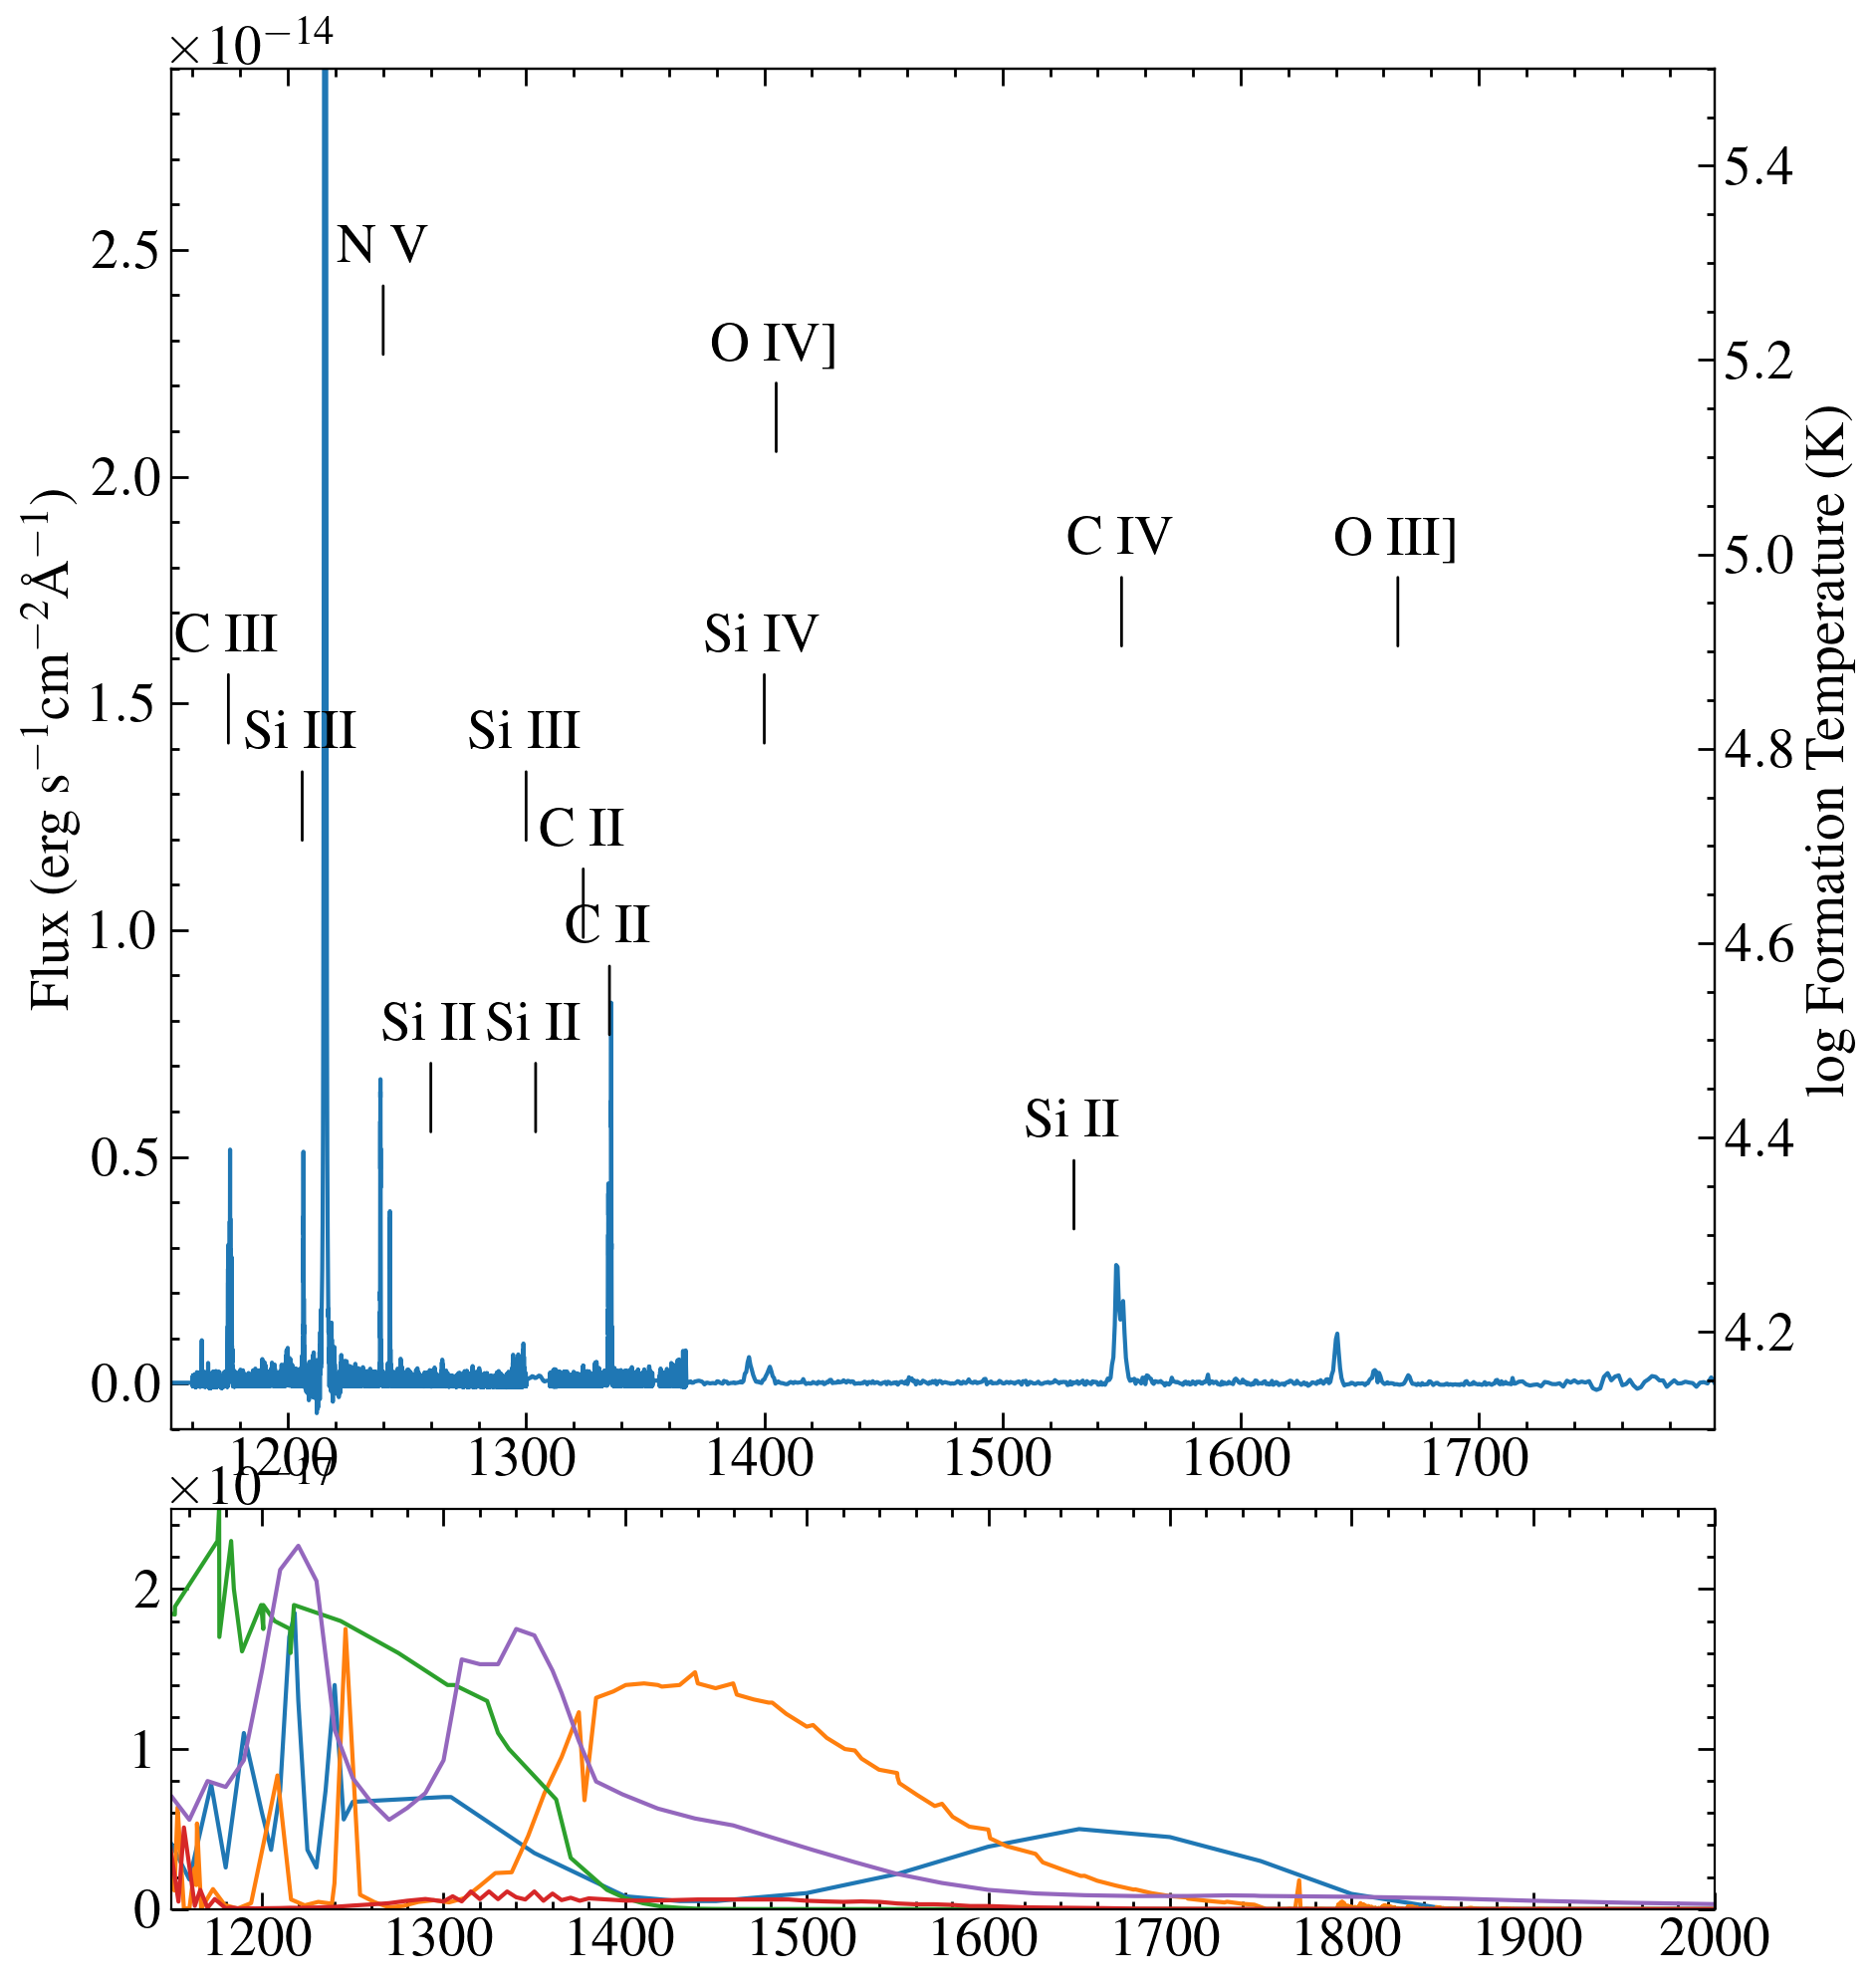

In [23]:
mask = (wav > 800) & (wav < 1000) | (wav > 1160) & (wav < 2900)
w, f = wav[mask], fl[mask]


mols = ['H2O', 'O2', 'CH4', 'CO2', 'O3']

# fig, ax = plt.subplots(figsize=(10, 12))
fig = plt.figure(figsize=(10, 12))
axes = fig.subplot_mosaic([['A'],['A'], ['A'], ['B']])

ax = axes['A']

ax.plot(w, f)

ax2 = ax.twinx()
# ax2.scatter(demlines['Wavelength'], demlines['Log Formation Temperature'])
for row in demlines:
    if row['Likelihood to measure'] in ['High', 'Medium'] and row['Wavelength'] > 1160 or row['Ion'] == 'Fe XXI':
        ax2.annotate(row['Ion'],(row['Wavelength'], row['Log Formation Temperature']-0.1), xytext=(row['Wavelength'], row['Log Formation Temperature']),arrowprops=dict(arrowstyle='-'), horizontalalignment='center') 
    # plt.annotate(name,(np.mean(si), 1.e-13), xytext=(np.mean(si), 1.05e-13), horizontalalignment='center', bbox=dict(facecolor='white', edgecolor='none'))
ax.set_xlim(1151, 1799)
ax.set_ylim(-1e-15, 2.9e-14)
ax2.set_ylim(4.1, 5.5)
ax2.set_ylabel('log Formation Temperature (K)')
ax.set_ylabel('Flux (erg s$^{-1}$cm$^{-2}$\AA$^{-1}$)')


ax3 = axes['B']

for mol in mols:
    cs = Table.read('../../cross_sections/{}_cs.txt'.format(mol), format='ascii.basic')
    ax3.plot(cs['Lambda'], cs['Total'])

ax3.set_xlim(1150, 2000)
ax3.set_ylim(0, 0.25e-16)
# ax.set_xscale('log')
# ax3.set_yscale('log')

Gallery mk2

(500.0, 3000.0)

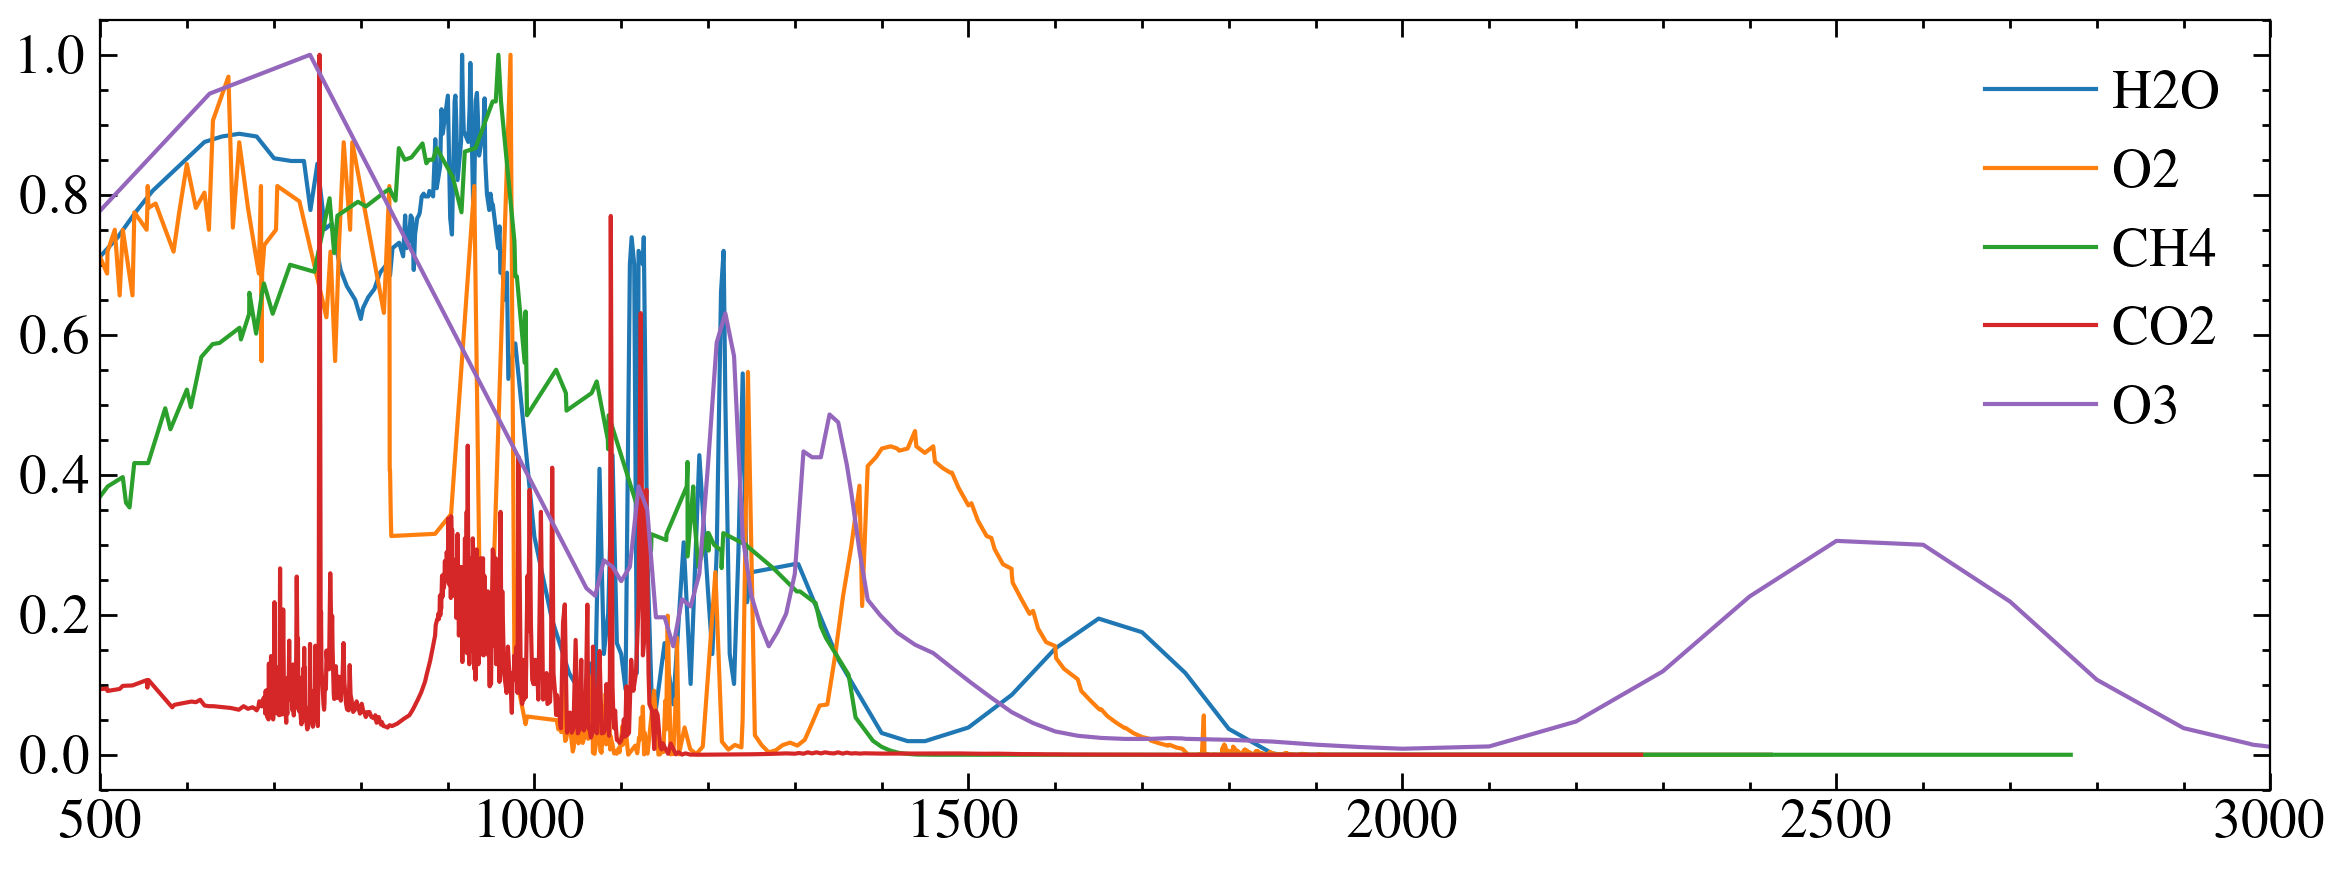

In [24]:
fig, ax = plt.subplots()

for mol in mols:
    cs = Table.read('../../cross_sections/{}_cs.txt'.format(mol), format='ascii.basic')
    ax.plot(cs['Lambda'], cs['Total']/max(cs['Total']), label =mol)
ax.legend()

ax.set_xlim(500, 3000)

# ax.set_yscale('log')

In [25]:
teffs = np.array([3196, 3601,3460,3621,3404,4014,3223,3248,3492,3278,3119,2619])
args = np.argsort(teffs)[::-1]
stars_sort = np.array(stars)[args]
specs_sort = np.array(specs)[args]
teffs_sort = teffs[args]
# prots_sort = params['P_rot_d'][args]


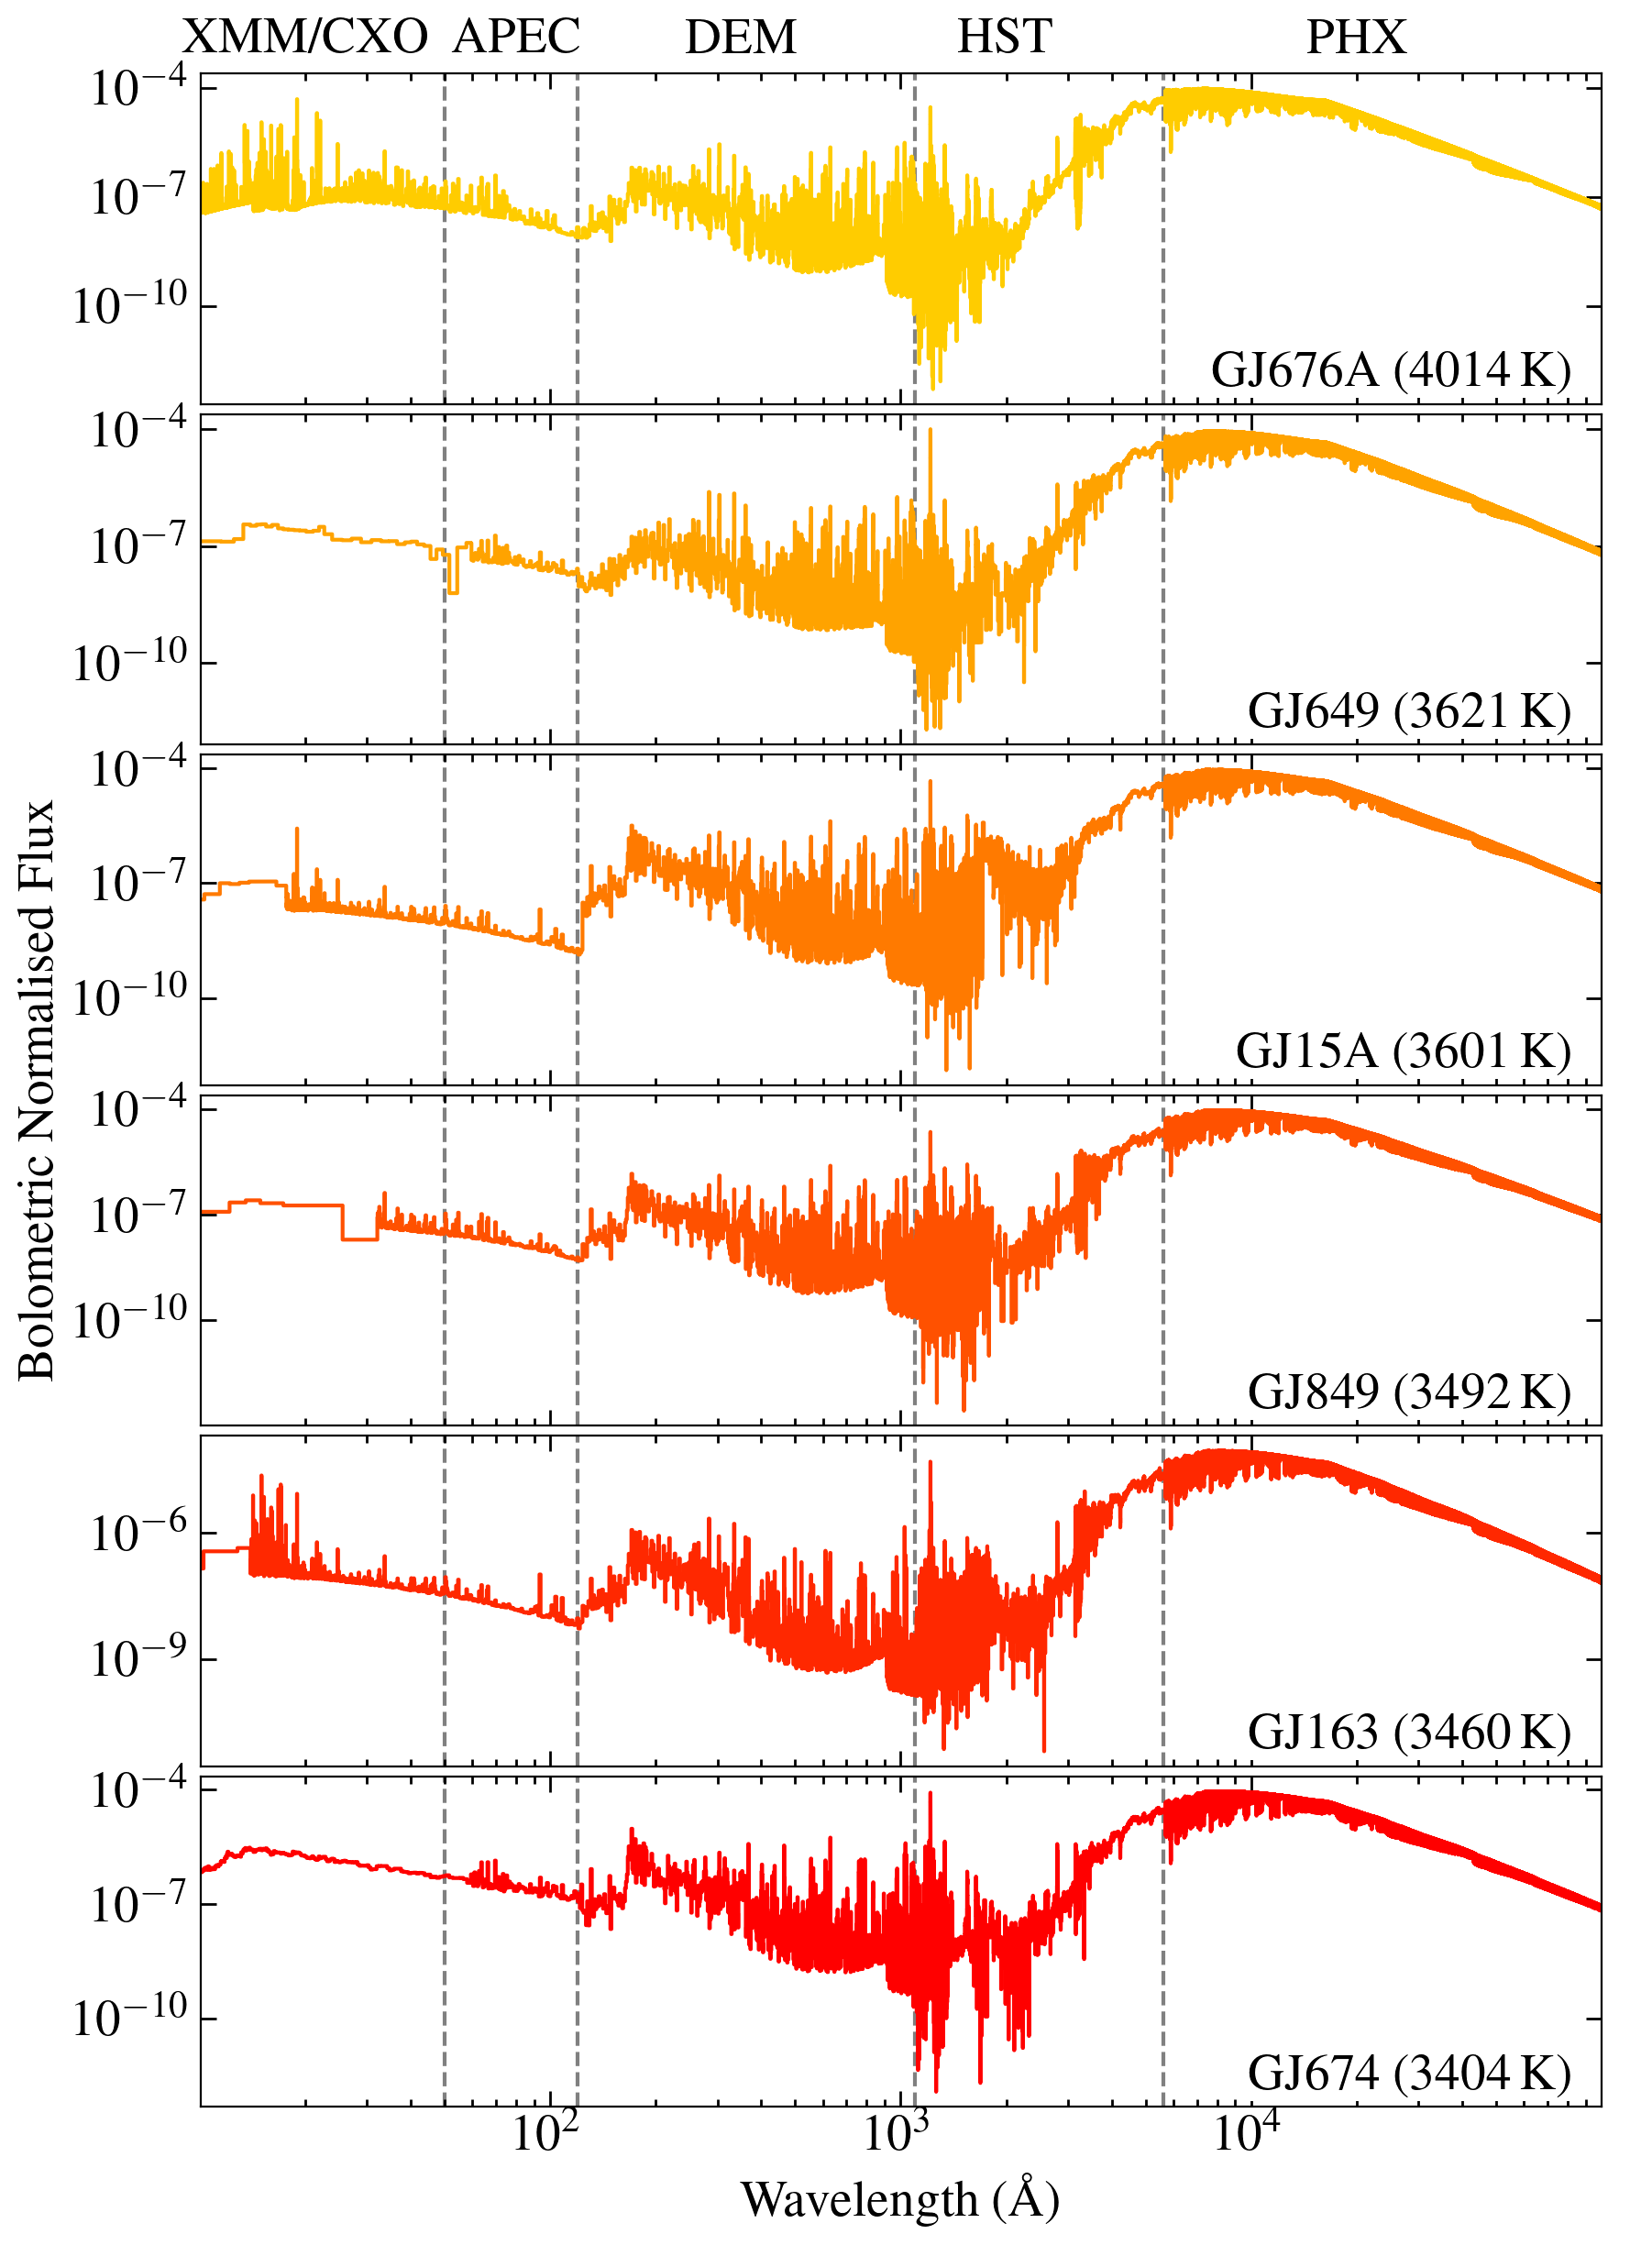

In [26]:
# import mplcyberpunk
# plt.style.use("cyberpunk")

# fig = plt.figure(figsize=(20, 15))
fig, axes = plt.subplots(6, 1,  sharex=True, sharey=False,figsize=(10,13))

cols = np.linspace(0, 0.8, 6)[::-1]

for j, spec in enumerate(specs_sort[0:6]):
    
#     print(spec)
#     plt.figure(figsize = (4*len(doublets), 10))
#     gs = GridSpec(2, 4)
    ax = plt.subplot(6, 1, j+1)
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    # boloflux = fits.getheader(spec)['BOLOFLUX']
#     print(star)
#     stars.append(star)
    w, f, e, inst = data['WAVELENGTH'], data['BOLOFLUX'], data['ERROR'], data['INSTRUMENT']
    w, f = w[f >0], f[f>0]
    w, f = w[w< 1e6], f[w < 1e6]
#     wn, fn, en = remove_negatives(w, f, e)
#         plt.plot(w[w< 4000], f[w< 4000])    
    ax.step(w, f, c=plt.cm.autumn(cols[j]), where='mid')
    # plt.step(w, f/boloflux, c='C{}'.format(j))
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(10.1, 99999.9)
    
    if j == 0:
        # ax.set_ylim(1e-11, 1)
        ylabel = 1.1
        plt.annotate('PHX', (2e4, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        plt.annotate('HST', (2000, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        plt.annotate('DEM', (350, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        plt.annotate('APEC', (80, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        plt.annotate('XMM/CXO', (20, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        
        
    if j != 5:
        ax.set_xticks([])
        
    ax.axvline(50, ls ='--', c='0.5', zorder=-5)
    ax.axvline(120, ls ='--', c='0.5', zorder=-5)
    ax.axvline(1100, ls ='--', c='0.5', zorder=-5)
    ax.axvline(5600, ls ='--', c='0.5', zorder=-5)
    
    # plt.ylim(1.1e-6, 1.7e1)
#     mplcyberpunk.add_glow_effects()
    if star == '2MASS-J23062928-0502285':
        star = 'TRAPPIST-1'
    plt.annotate('{} ({}\,K)'.format(star, teffs_sort[j]), (0.98, 0.02), xycoords='axes fraction', 
                 ha = 'right', va='bottom', bbox=dict(fc='w', ec='none', pad =0.1))
    # plt.title(star)
#     if j == 3:
#         plt.ylabel('Normalised Flux', size=25)
#     if j == 10:
#         plt.xlabel('Wavelength (\AA)', size=25)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
plt.ylabel('Bolometric Normalised Flux', size=20, labelpad=25)
plt.xlabel('Wavelength (\AA)', size=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0.03)

# plt.savefig('plots/gallery.png', dpi=150, facecolor='w')
plt.savefig('plots/all_seds_1-6.pdf')
# plt.savefig('plots/gallery_cp.png', dpi=150)
#     plt.show()

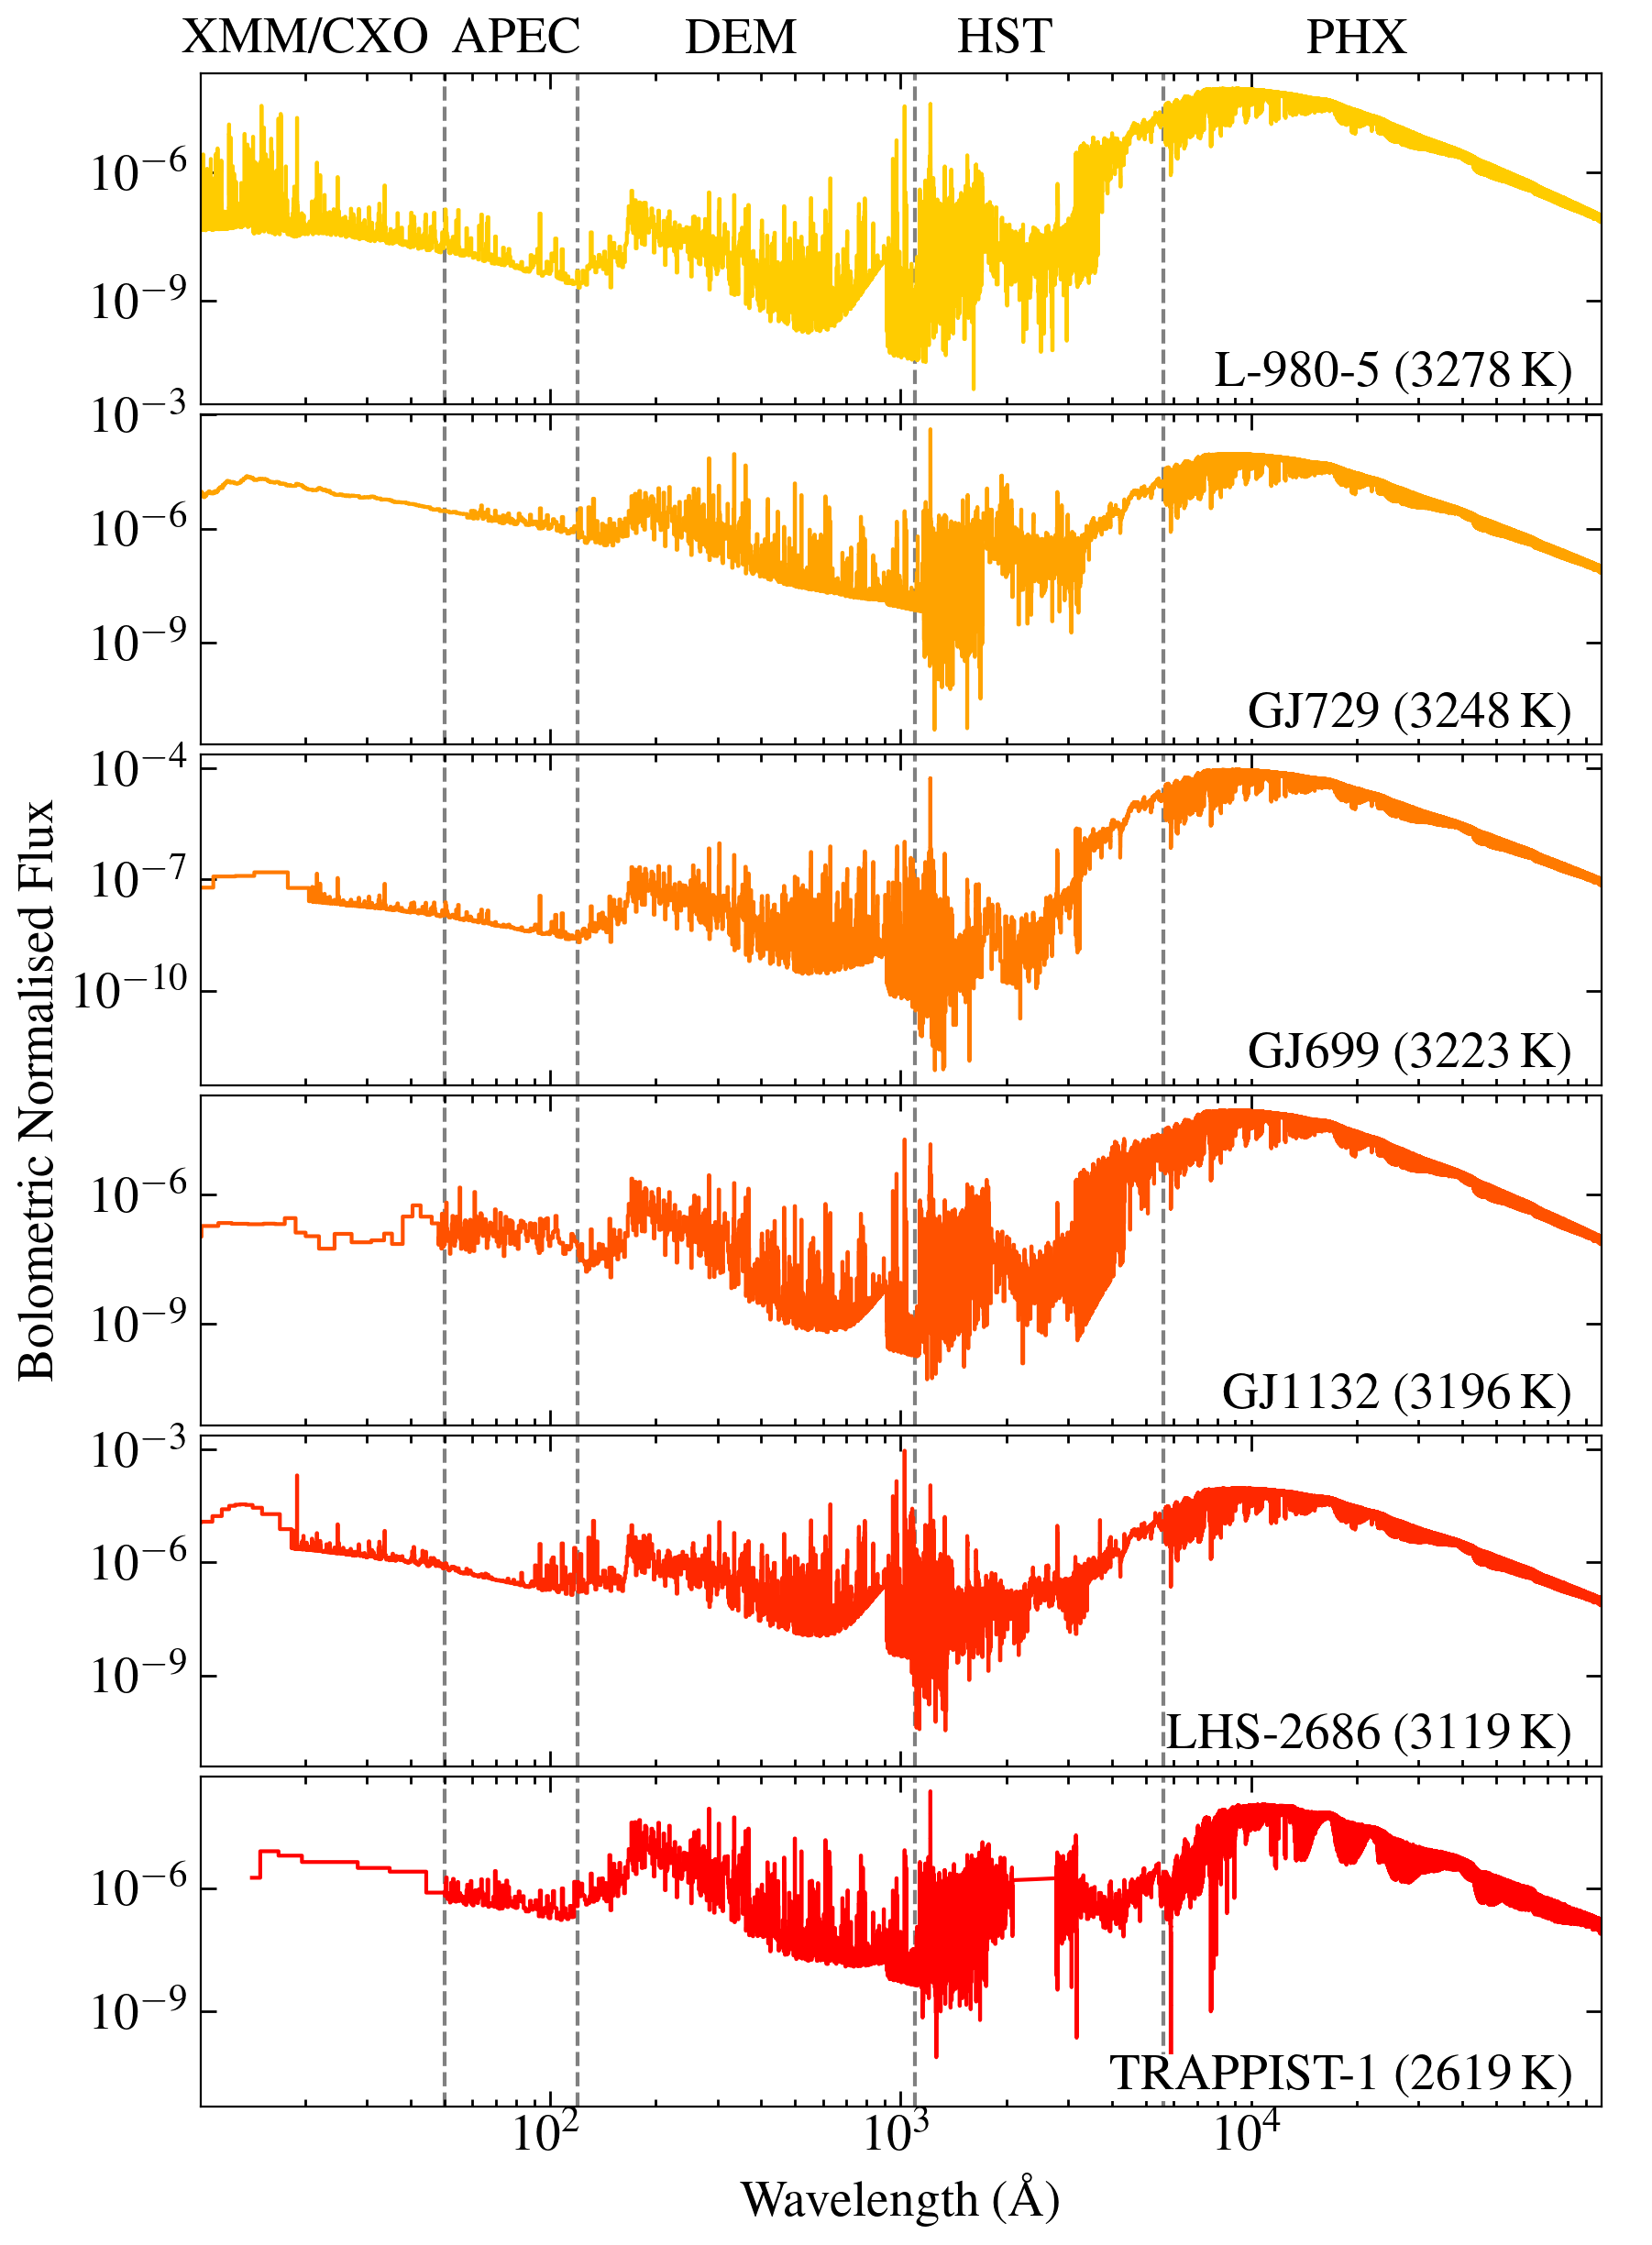

In [27]:
# import mplcyberpunk
# plt.style.use("cyberpunk")

# fig = plt.figure(figsize=(20, 15))
fig, axes = plt.subplots(6, 1,  sharex=True, sharey=False,figsize=(10,13))

cols = np.linspace(0, 0.8, 6)[::-1]

for j, spec in enumerate(specs_sort[6:]):
    
#     print(spec)
#     plt.figure(figsize = (4*len(doublets), 10))
#     gs = GridSpec(2, 4)
    ax = plt.subplot(6, 1, j+1)
    data = fits.getdata(spec, 1)
    star = fits.getheader(spec)['TARGNAME']
    # boloflux = fits.getheader(spec)['BOLOFLUX']
#     print(star)
#     stars.append(star)
    w, f, e, inst = data['WAVELENGTH'], data['BOLOFLUX'], data['ERROR'], data['INSTRUMENT']
    w, f = w[f >0], f[f>0]
    w, f = w[w< 1e6], f[w < 1e6]
#     wn, fn, en = remove_negatives(w, f, e)
#         plt.plot(w[w< 4000], f[w< 4000])    
    ax.step(w, f, c=plt.cm.autumn(cols[j]), where='mid')
    # plt.step(w, f/boloflux, c='C{}'.format(j))
    plt.yscale('log')
    plt.xscale('log')
    plt.xlim(10.1, 99999.9)
    
    if j == 0:
        # ax.set_ylim(1e-11, 1)
        ylabel = 1.1
        plt.annotate('PHX', (2e4, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        plt.annotate('HST', (2000, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        plt.annotate('DEM', (350, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        plt.annotate('APEC', (80, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        plt.annotate('XMM/CXO', (20, ylabel),  xycoords = ('data', 'axes fraction'), ha='center', va='center')
        
        
    if j != 5:
        ax.set_xticks([])
        
    ax.axvline(50, ls ='--', c='0.5', zorder=-5)
    ax.axvline(120, ls ='--', c='0.5', zorder=-5)
    ax.axvline(1100, ls ='--', c='0.5', zorder=-5)
    ax.axvline(5600, ls ='--', c='0.5', zorder=-5)
    
    # plt.ylim(1.1e-6, 1.7e1)
#     mplcyberpunk.add_glow_effects()
    if star == '2MASS-J23062928-0502285':
        star = 'TRAPPIST-1'
    plt.annotate('{} ({}\,K)'.format(star, teffs_sort[j+6]), (0.98, 0.02), xycoords='axes fraction', 
                 ha = 'right', va='bottom', bbox=dict(fc='w', ec='none', pad =0.1))
    # plt.title(star)
#     if j == 3:
#         plt.ylabel('Normalised Flux', size=25)
#     if j == 10:
#         plt.xlabel('Wavelength (\AA)', size=25)

fig.add_subplot(111, frame_on=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
plt.ylabel('Bolometric Normalised Flux', size=20, labelpad=25)
plt.xlabel('Wavelength (\AA)', size=20)
plt.tight_layout()
plt.subplots_adjust(hspace=0.03)

# plt.savefig('plots/gallery.png', dpi=150, facecolor='w')
plt.savefig('plots/all_seds_7-12.pdf')
# plt.savefig('plots/gallery_cp.png', dpi=150)
#     plt.show()

In [28]:
specs_sort

array(['/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ676A/hlsp_muscles_multi_multi_gj676a_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ649/hlsp_muscles_multi_multi_gj649_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ15A/hlsp_muscles_multi_multi_gj15a_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ849/hlsp_muscles_multi_multi_gj849_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ163/hlsp_muscles_multi_multi_gj163_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ674/hlsp_muscles_multi_multi_gj674_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/L-980-5/hlsp_muscles_multi_multi_l-980-5_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hdd

In [29]:
planet_a

{'GJ676A': [0.04, 0.187, 1.8152, 6.6],
 'GJ 15A': [0.072],
 'GJ649': [1.13],
 'GJ674': [0.039],
 'GJ163': [0.061, 0.125, 1.03],
 'GJ1132': [0.0153, 0.0476],
 'GJ849': [2.409, 4.974],
 'TRAPPIST-1': [0.011, 0.015, 0.022, 0.029, 0.039, 0.047, 0.062]}

In [30]:
path = '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/'

specs2 = glob.glob('{}*/*_var-res*.fits'.format(path))
specs2


['/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ1132/hlsp_muscles_multi_multi_gj1132_broadband_v24_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ15A/hlsp_muscles_multi_multi_gj15a_broadband_v24_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ163/hlsp_muscles_multi_multi_gj163_broadband_v24_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ649/hlsp_muscles_multi_multi_gj649_broadband_v24_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ674/hlsp_muscles_multi_multi_gj674_broadband_v24_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ676A/hlsp_muscles_multi_multi_gj676a_broadband_v24_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ699/hlsp_muscles_multi_multi_gj699_broadband_v24_var-res-sed.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ729/hlsp_muscles_multi_multi_gj729_broadband_v24_var-res-sed.fit

In [31]:
specs2_sort = np.array(specs2)[args]
specs2_sort

array(['/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ676A/hlsp_muscles_multi_multi_gj676a_broadband_v24_var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ649/hlsp_muscles_multi_multi_gj649_broadband_v24_var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ15A/hlsp_muscles_multi_multi_gj15a_broadband_v24_var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ849/hlsp_muscles_multi_multi_gj849_broadband_v24_var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ163/hlsp_muscles_multi_multi_gj163_broadband_v24_var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ674/hlsp_muscles_multi_multi_gj674_broadband_v24_var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/L-980-5/hlsp_muscles_multi_multi_l-980-5_broadband_v24_var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ729/hlsp_muscl

In [32]:
euvs = []
fuvs = []
nuvs = []
euv_es = []
fuv_es = []
nuv_es = []

gnuv = []
gnuv_e = []
gfuv = []
gfuv_e = []


def int_flux(w0, w1, f, e):
    fi = np.sum(f*(w1-w0))
    ei = (np.sum(e**2 * (w1-w0)**2))**0.5
    return fi, ei


for spec in specs2_sort:
    data = fits.getdata(spec, 1)
#     star = fits.getheader(spec)['TARGNAME']
    w0, w1, w, f, e = data['WAVELENGTH0'],data['WAVELENGTH1'], data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # print(len(e[(np.isnan(e)==True)]))
    euvmask = (w > 10) & (w <= 1000)
    fuvmask = (w > 1000) & (w <=2000)
    nuvmask = (w > 2000) & (w <=3000)
    gfmask = (w > 1350) & (w <=1750)
    gnmask = (w > 1750) & (w <=2800)
    
    

    

    euvi, euvie = int_flux(w0[euvmask], w1[euvmask], f[euvmask], e[euvmask])
    euvs.append(euvi)
    euv_es.append(euvie)

    fuvi, fuvie = int_flux(w0[fuvmask], w1[fuvmask], f[fuvmask], e[fuvmask])
    fuvs.append(fuvi)
    fuv_es.append(fuvie)

    nuvi, nuvie = int_flux(w0[nuvmask], w1[nuvmask], f[nuvmask], e[nuvmask])
    nuvs.append(nuvi)
    nuv_es.append(nuvie)

    gni, gnie = int_flux(w0[gnmask], w1[gnmask], f[gnmask], e[gnmask])
    gnuv.append(gni)
    gnuv_e.append(gnie)
    
    gfi, gfie = int_flux(w0[gfmask], w1[gfmask], f[gfmask], e[gfmask])
    gfuv.append(gfi)
    gfuv_e.append(gfie)

    
    # euvs.append(np.trapz(f[euvmask], w[euvmask]))
    # fuvs.append(np.trapz(f[fuvmask], w[fuvmask]))
    # nuvs.append(np.trapz(f[nuvmask], w[nuvmask]))
    
# print(euv_es, fuv_es, nuv_es)
    
#     print(star)
euvs, fuvs, nuvs, euv_es,fuv_es, nuv_es = np.array(euvs), np.array(fuvs), np.array(nuvs), np.array(euv_es),np.array(fuv_es), np.array(nuv_es) 
gnuv, gnuv_e, gfuv, gfuv_e = np.array(gnuv), np.array(gnuv_e), np.array(gfuv), np.array(gfuv_e)
print(specs2_sort, gfuv)

['/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ676A/hlsp_muscles_multi_multi_gj676a_broadband_v24_var-res-sed.fits'
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ649/hlsp_muscles_multi_multi_gj649_broadband_v24_var-res-sed.fits'
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ15A/hlsp_muscles_multi_multi_gj15a_broadband_v24_var-res-sed.fits'
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ849/hlsp_muscles_multi_multi_gj849_broadband_v24_var-res-sed.fits'
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ163/hlsp_muscles_multi_multi_gj163_broadband_v24_var-res-sed.fits'
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ674/hlsp_muscles_multi_multi_gj674_broadband_v24_var-res-sed.fits'
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/L-980-5/hlsp_muscles_multi_multi_l-980-5_broadband_v24_var-res-sed.fits'
 '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ729/hlsp_muscles_multi_multi_gj729_broadband_v24_var-res-sed.fits'
 '

In [33]:
# plt.plot(w, f)

# plt.plot(w, e)
# # plt.plot(w, f)

# plt.yscale('log')
# plt.xscale('log')
# # plt.ylim(-1e-17, 10e-17)
# print(spec)

specs_sort

array(['/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ676A/hlsp_muscles_multi_multi_gj676a_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ649/hlsp_muscles_multi_multi_gj649_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ15A/hlsp_muscles_multi_multi_gj15a_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ849/hlsp_muscles_multi_multi_gj849_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ163/hlsp_muscles_multi_multi_gj163_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ674/hlsp_muscles_multi_multi_gj674_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/L-980-5/hlsp_muscles_multi_multi_l-980-5_broadband_v24_adapt-var-res-sed.fits',
       '/media/david/2tb_ext_hd/hdd

In [34]:
params = Table.read('../optical/stellar_parameters.csv')
d_stars = []
for star in stars_sort:
    if star == '2MASS-J23062928-0502285':
        star = 'TRAPPIST-1'
    if star == 'LHS-2686':
        star = 'LHS2686'
    if star == 'L-980-5':
        star = 'L980-5'
    for row in params:
        if row['Target'].replace(' ','').upper() == star:
            d_stars.append(row['distance'])
print(len(d_stars))
print(d_stars)

args = np.argsort(teffs)[::-1]
prots_sort = params['P_rot_d'][args]
lbols_sort = params['L_bol'][args]
mass_sort = params['Mass'][args]

12
[15.85539876, 10.3755966, 3.562014676, 8.830022075, 15.01726986, 4.540501271, 13.39405304, 2.969826562, 1.823785815, 12.03804021, 13.14060447, 12.10946961]


In [35]:
params

<Table length=12>
  Target    RAJ2000    DEJ2000     Jmag  ... lya_flux lya_pos_e lya_neg_e
  str10     float64    float64   float64 ... float64   float64   float64 
---------- ---------- ---------- ------- ... -------- --------- ---------
    GJ1132 153.716027 -47.156796   9.245 ... 1.75e-14   6.7e-15   4.3e-15
    GJ676A 262.546646 -51.637012   6.711 ... 6.02e-13   3.8e-14   3.5e-14
     GJ15A   4.594036  44.022842   5.252 ... 3.37e-12   1.9e-13   1.8e-13
     GJ649 254.536873   25.74423   6.448 ...  1.2e-12     7e-14     7e-14
     GJ163  62.315307 -53.373737   7.948 ... 1.43e-13     7e-14     5e-14
     GJ849 332.417906  -4.640765    6.51 ... 4.35e-13     5e-14   4.1e-14
     GJ674 262.166316  -46.89513   5.711 ... 2.25e-12   1.3e-13   1.2e-13
     GJ699 269.452044   4.694597   5.244 ... 1.02e-12     1e-14     1e-14
    L980-5 215.313034  -1.122204   8.948 ...      0.0       0.0       0.0
   LHS2686 197.552869  47.755291   9.584 ... 6.26e-14   8.5e-15   5.5e-15
     GJ729 282.455404 -23.836149   6.222 ... 4.78e-12   1.6e-13   1.6e-13
TRAPPIST-1 346.622013  -5.041274  11.354 ...  1.4e-14     6e-15   3.6e-15

In [36]:
stars_sort

array(['GJ676A', 'GJ649', 'GJ15A', 'GJ849', 'GJ163', 'GJ674', 'L-980-5',
       'GJ729', 'GJ699', 'GJ1132', 'LHS-2686', '2MASS-J23062928-0502285'],
      dtype='<U23')

In [37]:
# sol_spec =  readsav('../../stuff/Solar-data.idlsav')
# w_sol, f_sol = sol_spec['wave']*10, sol_spec['flux']*100
# w_sol, f_sol = w_sol[w_sol >= mw[0]], f_sol[w_sol >= mw[0]]
# d_t1 = 12.1*u.pc 
w_sol, f_sol = sw, sf
d_sun = 1*u.au.to(u.pc)
euv_earth = np.trapz(f_sol[(w_sol > 10) & (w_sol <= 1000)], w_sol[(w_sol > 10) & (w_sol <= 1000)])
fuv_earth = np.trapz(f_sol[(w_sol > 1000) & (w_sol <= 2000)], w_sol[(w_sol > 1000) & (w_sol <= 2000)])
nuv_earth = np.trapz(f_sol[(w_sol > 2000) & (w_sol <= 3000)], w_sol[(w_sol > 2000) & (w_sol <= 3000)])


In [38]:


# j = 0

# fig, axes = plt.subplots(ncols = 2, nrows = 4, figsize=(10, 15))

# for i, star in enumerate(stars_sort):
#     if star == '2MASS-J23062928-0502285':
#         star = 'TRAPPIST-1'
#     for name in planet_a:
#         if name.replace(' ','').upper() == star:
#             print(star)
#             ax = axes.flat[j]
#             ax.annotate(star, (0.9, 0.9), ha='right', va='top', xycoords='axes fraction')
#             euv_ratio = []
#             fuv_ratio = []
#             nuv_ratio = []
#             for planet in planet_a[name]:
#                 scale = (((d_stars[i]*u.pc).to(u.au))/planet*u.au)**2
#                 euv_ratio.append(euvs[i]*scale.value/euv_earth)
#                 fuv_ratio.append(fuvs[i]*scale.value/fuv_earth)
#                 nuv_ratio.append(nuvs[i]*scale.value/nuv_earth)
#             ax.errorbar(planet_a[name], euv_ratio, marker='o', label = r'$\lambda = $ 0\,--1000\,\AA', ls='--')
#             ax.errorbar(planet_a[name], fuv_ratio, marker='o', label = r'$\lambda = $ 1000\,--\,2000\,\AA', ls='--')
#             ax.errorbar(planet_a[name], nuv_ratio, marker='o', label = r'$\lambda = $ 2000\,--\,3000\,\AA', ls='--')
#             if max(euv_ratio) / min(nuv_ratio) > 10:
#                 ax.set_yscale('log')
                
#             ax.axhline(1, ls='--')
            
#             if j == 0:
#                 ax.legend(loc=5, frameon=True)
            
#             j +=1
    

# bigax = fig.add_subplot(111, frame_on=False)
# bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
# # ax3.yaxis.set_label_position("right")
# bigax.set_xlabel('Semi-major axis (au)')    
# bigax.set_ylabel('$F_{\mathrm{Planet}}/F_{\mathrm{Earth}}$', labelpad =20)
# fig.tight_layout()

Ok so the way to do it is to plot F/Fe in their habiatble zones against teff

In [39]:
params

<Table length=12>
  Target    RAJ2000    DEJ2000     Jmag  ... lya_flux lya_pos_e lya_neg_e
  str10     float64    float64   float64 ... float64   float64   float64 
---------- ---------- ---------- ------- ... -------- --------- ---------
    GJ1132 153.716027 -47.156796   9.245 ... 1.75e-14   6.7e-15   4.3e-15
    GJ676A 262.546646 -51.637012   6.711 ... 6.02e-13   3.8e-14   3.5e-14
     GJ15A   4.594036  44.022842   5.252 ... 3.37e-12   1.9e-13   1.8e-13
     GJ649 254.536873   25.74423   6.448 ...  1.2e-12     7e-14     7e-14
     GJ163  62.315307 -53.373737   7.948 ... 1.43e-13     7e-14     5e-14
     GJ849 332.417906  -4.640765    6.51 ... 4.35e-13     5e-14   4.1e-14
     GJ674 262.166316  -46.89513   5.711 ... 2.25e-12   1.3e-13   1.2e-13
     GJ699 269.452044   4.694597   5.244 ... 1.02e-12     1e-14     1e-14
    L980-5 215.313034  -1.122204   8.948 ...      0.0       0.0       0.0
   LHS2686 197.552869  47.755291   9.584 ... 6.26e-14   8.5e-15   5.5e-15
     GJ729 282.455404 -23.836149   6.222 ... 4.78e-12   1.6e-13   1.6e-13
TRAPPIST-1 346.622013  -5.041274  11.354 ...  1.4e-14     6e-15   3.6e-15

In [40]:
prots_sort

<Column name='P_rot_d' dtype='float64' length=12>
  39.2
  23.8
  41.2
 92.23
  30.5
  61.0
  28.8
 130.4
  32.9
126.59
  2.84
   3.3

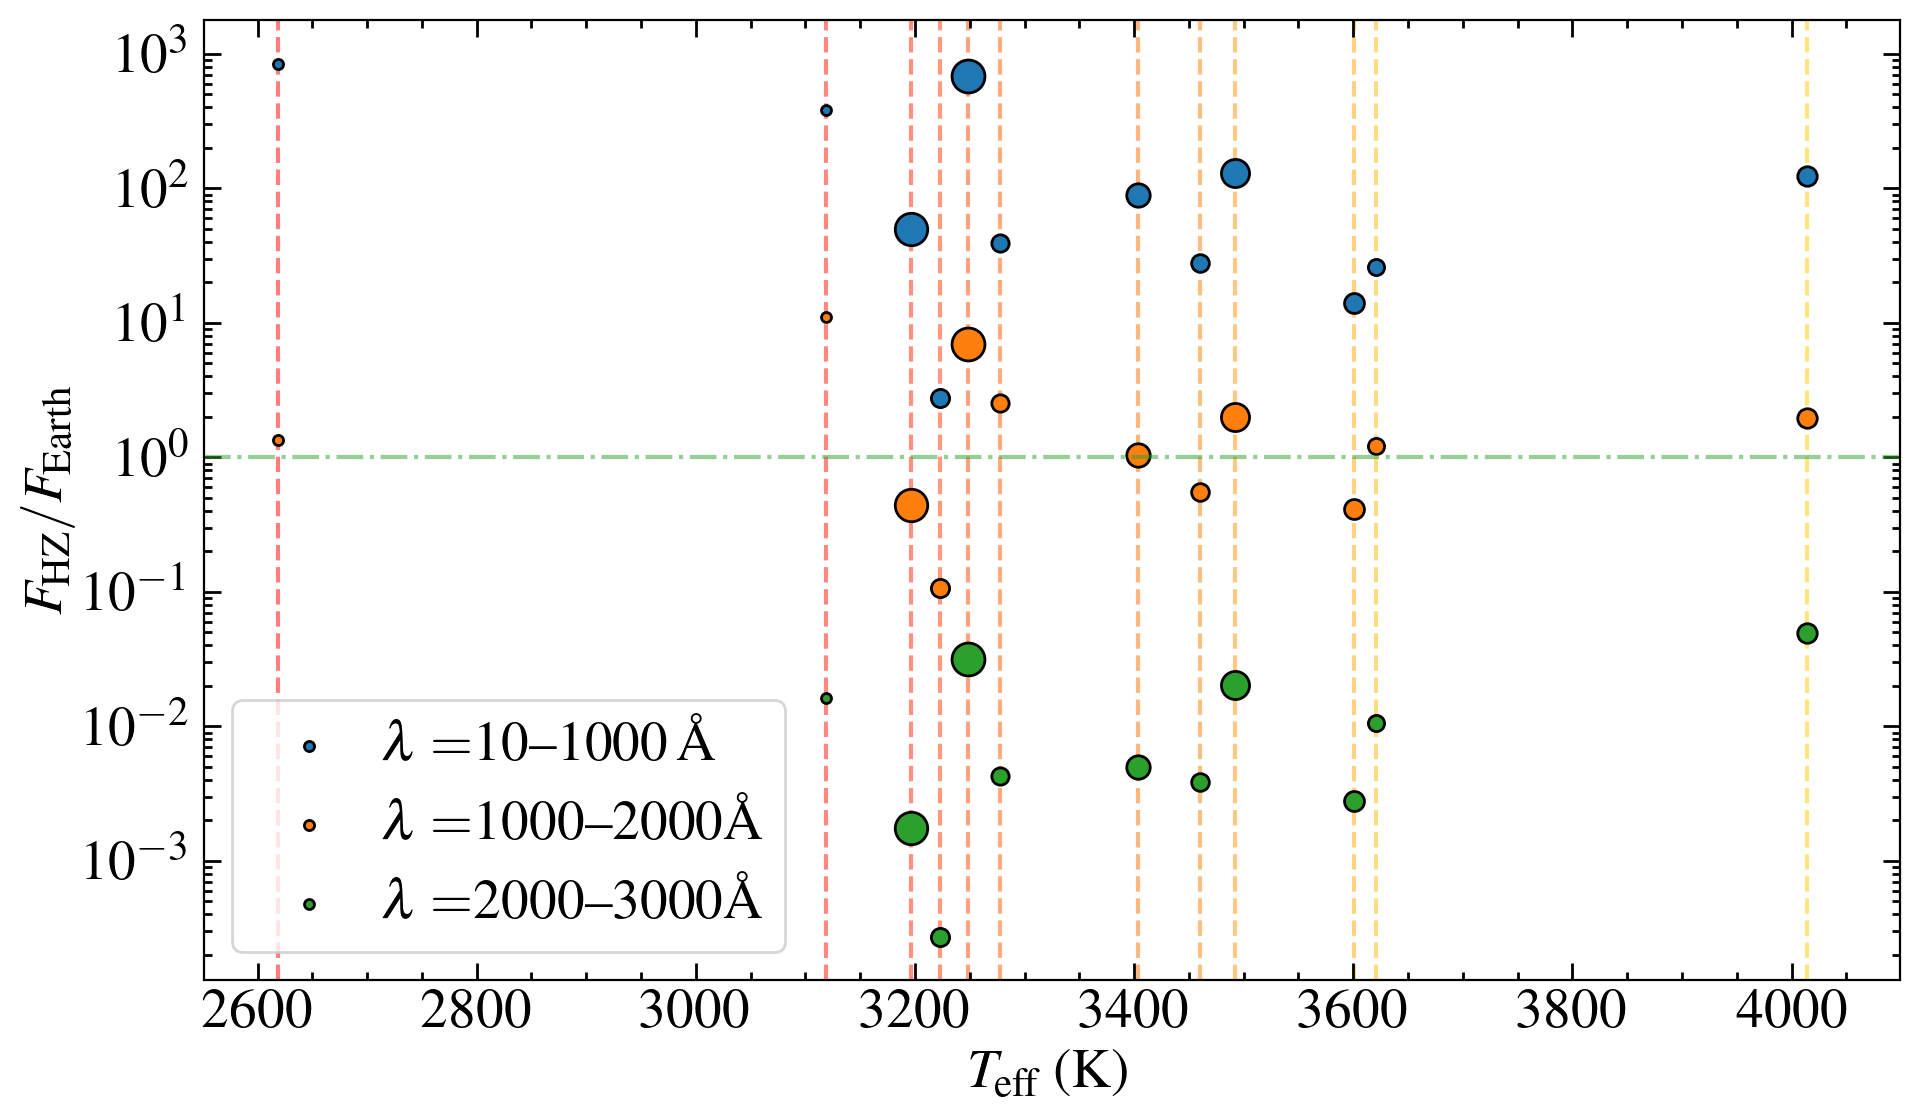

In [41]:
fig, ax = plt.subplots(figsize=(10,6))


hz_in, hz_out = habz[:,2], habz[:,3]
hz_ini = interpolate.interp1d(hteffs, hz_in)
hz_outi = interpolate.interp1d(hteffs, hz_out)

hab_mids =[]
 
for teff in teffs_sort:
    lum = li(teff)
    hi = (lum/hz_ini(teff))**0.5
    ho = (lum/hz_outi(teff))**0.5
    hab_mid = np.mean([hi, ho])
    hab_mids.append(hab_mid)

eeids = []
#use eeids instead
#eeidlhs = (1*u.au)*(llhs/(const.L_sun.to(u.erg/u.s)))**0.5
for lum in lbols_sort:
    eeid = (1*u.au)*(lum/(const.L_sun.to(u.erg/u.s)))**0.5
    eeids.append(eeid)

hab_mids = eeids

markers = []
sizes = []

for p in prots_sort:
    if p ==-1:
        sizes.append(50)
        markers.append('x')
    else:
        sizes.append(p+10)
        markers.append('o')

# markers = np.array(markers)

euv_ratio = []
fuv_ratio = []
nuv_ratio = []
    
for i, star in enumerate(stars_sort):
    if star == '2MASS-J23062928-0502285':
        star = 'TRAPPIST-1'
    
    scale = (((d_stars[i]*u.pc).to(u.au))/hab_mids[i]*u.au)**2
    euv_ratio.append(euvs[i]*scale.value/euv_earth)
    fuv_ratio.append(fuvs[i]*scale.value/fuv_earth)
    nuv_ratio.append(nuvs[i]*scale.value/nuv_earth)


for i in range(len(teffs_sort)):
    
    ax.scatter(teffs_sort[i], euv_ratio[i], label=r'$\lambda = $10--1000\,\AA', marker=markers[i], edgecolor='k', s=sizes[i], c='C0')      
    ax.scatter(teffs_sort[i], fuv_ratio[i], label = r'$\lambda = $1000--2000\AA', marker=markers[i], edgecolor='k',  s=sizes[i], c='C1')
    # if i == len(teffs_sort) -1:
        # ax.errorbar(teffs_sort[i], nuv_ratio[i], marker=markers[i], yerr=0.01, markeredgecolor='k',  markersize=sizes[i]/3, c='C2', uplims=True)     
    # else:
    if i != len(teffs_sort) -1:
        ax.scatter(teffs_sort[i], nuv_ratio[i],  label = r'$\lambda = $2000--3000\AA', marker=markers[i], edgecolor='k',  s=sizes[i], c='C2')     
ax.set_yscale('log')  


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc=3, frameon=True)
cols = np.linspace(0, 0.8, 12)[::-1]


for i, teff in enumerate(teffs_sort):
    ax.axvline(teff, ls='--', c=plt.cm.autumn(cols[i]), zorder=-1, alpha=0.5)

ax.axhline(1, ls='-.', c='C2', alpha =0.5)

ax.set_xlim(2551, 4099)

ax.set_xlabel('$T_{\mathrm{eff}}$ (K)')
ax.set_ylabel('$F_{\mathrm{HZ}}/F_{\mathrm{Earth}}$')
fig.tight_layout()

fig.savefig('plots/hz_fluxes.pdf')

In [42]:
stars_sort

array(['GJ676A', 'GJ649', 'GJ15A', 'GJ849', 'GJ163', 'GJ674', 'L-980-5',
       'GJ729', 'GJ699', 'GJ1132', 'LHS-2686', '2MASS-J23062928-0502285'],
      dtype='<U23')

In [43]:
params

<Table length=12>
  Target    RAJ2000    DEJ2000     Jmag  ... lya_flux lya_pos_e lya_neg_e
  str10     float64    float64   float64 ... float64   float64   float64 
---------- ---------- ---------- ------- ... -------- --------- ---------
    GJ1132 153.716027 -47.156796   9.245 ... 1.75e-14   6.7e-15   4.3e-15
    GJ676A 262.546646 -51.637012   6.711 ... 6.02e-13   3.8e-14   3.5e-14
     GJ15A   4.594036  44.022842   5.252 ... 3.37e-12   1.9e-13   1.8e-13
     GJ649 254.536873   25.74423   6.448 ...  1.2e-12     7e-14     7e-14
     GJ163  62.315307 -53.373737   7.948 ... 1.43e-13     7e-14     5e-14
     GJ849 332.417906  -4.640765    6.51 ... 4.35e-13     5e-14   4.1e-14
     GJ674 262.166316  -46.89513   5.711 ... 2.25e-12   1.3e-13   1.2e-13
     GJ699 269.452044   4.694597   5.244 ... 1.02e-12     1e-14     1e-14
    L980-5 215.313034  -1.122204   8.948 ...      0.0       0.0       0.0
   LHS2686 197.552869  47.755291   9.584 ... 6.26e-14   8.5e-15   5.5e-15
     GJ729 282.455404 -23.836149   6.222 ... 4.78e-12   1.6e-13   1.6e-13
TRAPPIST-1 346.622013  -5.041274  11.354 ...  1.4e-14     6e-15   3.6e-15

In [44]:
d_stars

[15.85539876,
 10.3755966,
 3.562014676,
 8.830022075,
 15.01726986,
 4.540501271,
 13.39405304,
 2.969826562,
 1.823785815,
 12.03804021,
 13.14060447,
 12.10946961]

In [45]:
fuvs

array([5.12508225e-13, 1.13385631e-12, 6.69698701e-12, 3.84032763e-13,
       1.27040480e-13, 2.49364584e-12, 9.20613580e-14, 6.12337087e-12,
       1.16088677e-12, 3.06479322e-14, 5.94570004e-13, 1.29507502e-14])

In [46]:
# def make_phot(bp_w, bp_cc, w, f, e=0):
#     mask = (w >= bp_w[0]) & (w <= bp_w[-1])
#     w, f = w[mask], f[mask]
#     bb_cci = interpolate.interp1d(bp_w, bp_cc, fill_value='extrapolate')(w)
#     flux = np.trapz(f*bb_cci, w)/np.trapz(bb_cci, w)
#     if isinstance(e, int) != True:
#         e = e[mask]
#         intf = np.trapz(f, w)
#         inte = (np.sum(e[1:]**2 * np.diff(w)**2))**0.5
#         flux_error = (inte/intf)*flux
#         return flux, flux_error
#     else:
#         return flux 

# gnuv = []
# gnuv_e = []
# gfuv = []
# gfuv_e = []

# filters = ['/home/david/work/filters/galex/GALEX_GALEX.NUV.dat', '/home/david/work/filters/galex/GALEX_GALEX.FUV.dat']


# bpn, ccn = np.loadtxt(filters[0], unpack=True)
# bpf, ccf = np.loadtxt(filters[1], unpack=True)
# for spec in specs2_sort:
#     data = fits.getdata(spec, 1)
#     w, f, e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
#     mask = (w > 1000) & (w < 4000)
#     w, f, e = w[mask], f[mask], e[mask]
#     photn, photn_e = make_phot(bpn, ccn, w, f, e=e)
#     gnuv.append(photn)
#     gnuv_e.append(photn_e)
#     photf, photf_e = make_phot(bpf, ccf, w, f, e=e)
#     gfuv.append(photf)
#     gfuv_e.append(photf_e)
    
# gnuv, gnuv_e, gfuv, gfuv_e = np.array(gnuv), np.array(gnuv_e), np.array(gfuv), abs(np.array(gfuv_e)) 


# #this comes out as nonsense.


In [47]:
# plt.plot(bpn, ccn)
# plt.plot(bpf, ccf)

In [48]:
# print(specs2_sort)

In [49]:
# print(gnuv/gnuv_e, gfuv/gfuv_e)

In [50]:
#add muscles stars
muspath = '/media/david/2tb_ext_hd/hddata/mega_muscles/muscles_hlsp/'
musstars = glob.glob('{}*/*_var-res-sed.fits'.format(muspath))
print(musstars)

teff_muss = [3111, 3632, 3477, 2992,3424, 3443, 3539, 3201, 4783,4400,5170,5049]
# print(len(teff_muss))
mfuvs = []
mnuvs = []
mfuv_es = []
mnuv_es = []


def int_flux(w0, w1, f, e):
    fi = np.sum(f*(w1-w0))
    ei = (np.sum(e**2 * (w1-w0)**2))**0.5
    return fi, ei


for spec in musstars:
    data = fits.getdata(spec, 1)
#     star = fits.getheader(spec)['TARGNAME']
    w0, w1, w, f, e = data['WAVELENGTH0'],data['WAVELENGTH1'], data['WAVELENGTH'], data['FLUX'], data['ERROR']
    # print(len(e[(np.isnan(e)==True
    fuvmask = (w > 1000) & (w <=2000)
    nuvmask = (w > 2000) & (w <=3000)

    fuvi, fuvie = int_flux(w0[fuvmask], w1[fuvmask], f[fuvmask], e[fuvmask])
    mfuvs.append(fuvi)
    mfuv_es.append(fuvie)

    nuvi, nuvie = int_flux(w0[nuvmask], w1[nuvmask], f[nuvmask], e[nuvmask])
    mnuvs.append(nuvi)
    mnuv_es.append(nuvie)


    
# print(euv_es, fuv_es, nuv_es)
    
#     print(star)
mfuvs, mnuvs,mfuv_es, mnuv_es = np.array(mfuvs), np.array(mnuvs), np.array(mfuv_es), np.array(mnuv_es) 

print(mfuvs, mnuvs)


['/media/david/2tb_ext_hd/hddata/mega_muscles/muscles_hlsp/gj1214/hlsp_muscles_multi_multi_gj1214_broadband_v22_var-res-sed.fits', '/media/david/2tb_ext_hd/hddata/mega_muscles/muscles_hlsp/gj176/hlsp_muscles_multi_multi_gj176_broadband_v22_var-res-sed.fits', '/media/david/2tb_ext_hd/hddata/mega_muscles/muscles_hlsp/gj436/hlsp_muscles_multi_multi_gj436_broadband_v22_var-res-sed.fits', '/media/david/2tb_ext_hd/hddata/mega_muscles/muscles_hlsp/gj551/hlsp_muscles_multi_multi_gj551_broadband_v22_var-res-sed.fits', '/media/david/2tb_ext_hd/hddata/mega_muscles/muscles_hlsp/gj581/hlsp_muscles_multi_multi_gj581_broadband_v22_var-res-sed.fits', '/media/david/2tb_ext_hd/hddata/mega_muscles/muscles_hlsp/gj667c/hlsp_muscles_multi_multi_gj667c_broadband_v22_var-res-sed.fits', '/media/david/2tb_ext_hd/hddata/mega_muscles/muscles_hlsp/gj832/hlsp_muscles_multi_multi_gj832_broadband_v22_var-res-sed.fits', '/media/david/2tb_ext_hd/hddata/mega_muscles/muscles_hlsp/gj876/hlsp_muscles_multi_multi_gj876_broa

In [51]:
haz = fits.getdata('hazmat.fits',1)
startab = Table.read('/home/david/work/stars_table/EEM_dwarf_UBVIJHK_colors_Teff_fixed.csv', format='csv')
teffs_haz = []
for i, spt in enumerate(haz['SpType']):
    if spt[-1] == '0':
        spt = spt[:-2]
    if spt[0] == 'K' and spt[-1] =='5':
        spt = spt[:-2]
    row = np.where(startab['SpT']==spt+'V')
    # print(spt, row)
    # if len(row) == 0:
        # print(spt)
    teffs_haz.append(startab['Teff'][row[0][0]])
    # if i < 10:
    #     print(row)
    #     print(spt+'V')
    #     print(startab['Teff'][row])

fnh = haz['fFUV_fJ']/haz['fNUV_fJ']

In [52]:
haz.names# haz['SpType']

['recno',
 'ID',
 '_2MASS',
 'DisRef',
 'SpType',
 'Jmag',
 'e_Jmag',
 'l_FUVmag',
 'FUVmag',
 'e_FUVmag',
 'l_NUVmag',
 'NUVmag',
 'e_NUVmag',
 'l_fFUV_fJ',
 'fFUV_fJ',
 'l_fNUV_fJ',
 'fNUV_fJ',
 'Bin',
 'r_Bin',
 'Simbad',
 '_RA',
 '_DE']

Model: Linear1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
            slope              intercept    
    ---------------------- -----------------
    -0.0009789346145948944 3.250191380448332


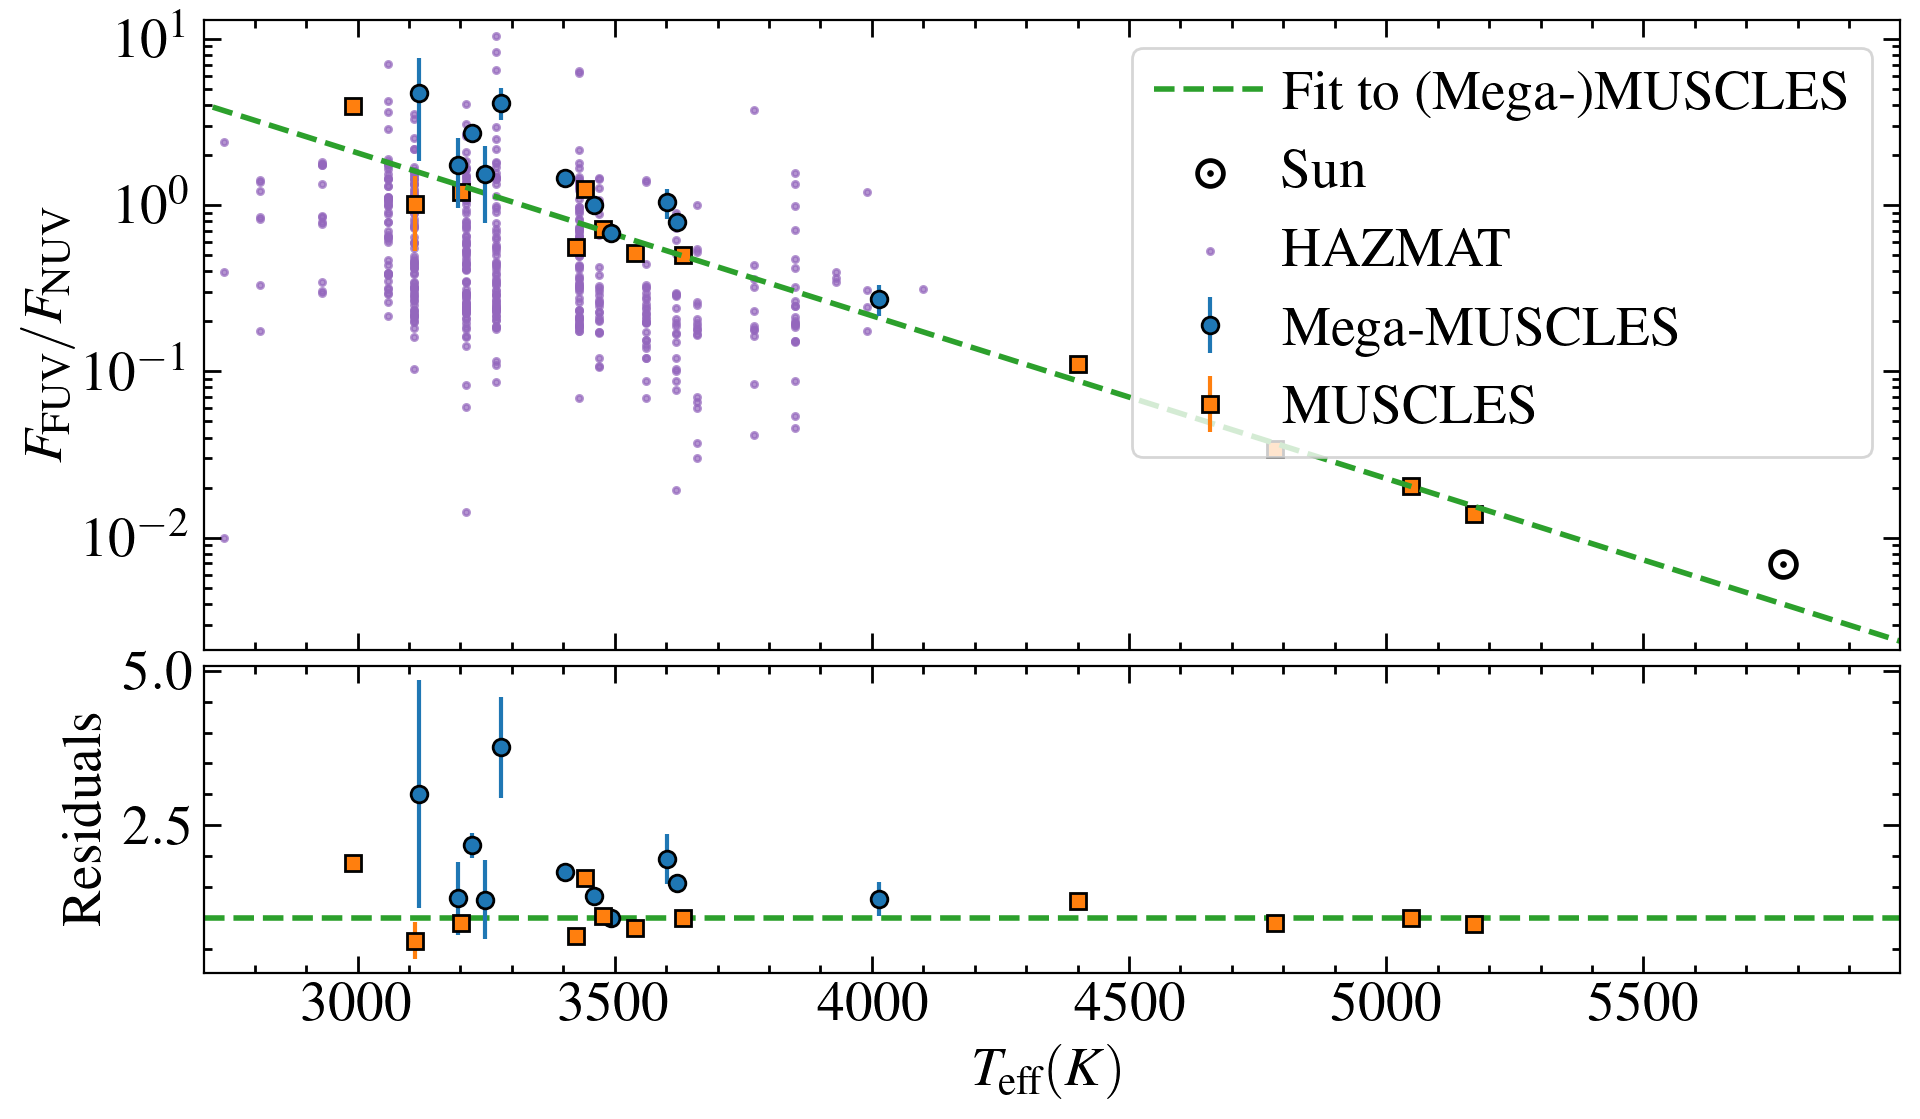

In [53]:
# fig, ax = plt.subplots(figsize=(10, 6))

fig, axes = plt.subplot_mosaic('''
AAA
AAA
BBB
''', figsize=(10, 6), sharex=True)

ax= axes['A']

fitter = fitting.LinearLSQFitter(calc_uncertainties=True)

fnr = fuvs/nuvs
fnr_e = fnr * ((nuv_es/nuvs)**2 + (fuv_es/fuvs)**2)**0.5

# fng = gnuv[:-1]/gfuv[:-1]
# fng_e =  fng * ((gnuv_e[:-1]/gnuv[:-1])**2 + (gfuv_e[:-1]/gfuv[:-1])**2)**0.5

fnm = mfuvs/mnuvs
fnm_e = fnm * ((mnuv_es*2/mnuvs)**2 + (mfuv_es*2/mfuvs)**2)**0.5
# ax[0].scatter(teffs_sort, fnr) 
ax.errorbar(teffs_sort, fnr, yerr=fnr_e, marker='o', ls='none', markeredgecolor='k', label='Mega-MUSCLES', zorder=10) 
ax.errorbar(teff_muss, fnm, yerr=fnm_e, marker='s', ls='none', markeredgecolor='k', label='MUSCLES', zorder=1) 
# ax[1].scatter(prots_sort, fnr) 

fnearth = fuv_earth/nuv_earth
tsun = 5772 
protsun = 27.26 


fit_t = np.hstack((teffs_sort[:-1], teff_muss))
fit_r = np.log10(np.hstack((fnr[:-1], fnm)))
fit_e = np.hstack((fnr_e[:-1], fnm_e)) / (np.hstack((fnr[:-1], fnm)) * np.log(10))

mod = models.Linear1D(slope=-1)
# mod=models.Polynomial1D(1)
fit_mod = fitter(mod, fit_t, fit_r, weights=1/fit_e)

print(fit_mod)

linet = np.linspace(2500, 6000, 1000)
# linef = 10**(linet*fit_mod.slope + fit_mod.intercept)
# ax.plot(linet, linef)
ax.plot(linet,10**(fit_mod(linet)), lw=2, ls='--', label = 'Fit to (Mega-)MUSCLES')

# n=2000
# slopes = np.random.normal(fit_mod.slope.value, fit_mod.stds['slope'], n)
# intercepts = np.random.normal(fit_mod.intercept.value, fit_mod.stds['intercept'], n)
# for i in range(n):
#     ax.plot(linet, 10**(linet*slopes[i] + intercepts[i]), alpha=0.005, c='k', zorder=-10)


ax.scatter(tsun, fnearth, marker=r'$\bigodot$', c='k', s=100, label='Sun')

ax.scatter(teffs_haz, fnh, alpha=0.7, c='C4', s=5, zorder=-10, label='HAZMAT')

# ax[1].scatter(protsun, fnearth)

#r'$\log_{10}(F_{\mathrm{FUV}}/F_{\mathrm{NUV}}) = (-1\pm0.02)\times10^{-3}T_{\mathrm{eff}} + 3.3\pm0.1)$'

ax.set_yscale('log')

ax.set_xlim(2701, 5999)
ax.set_ylim(2.1e-3, 1.3e1)
# ax.grid(which='both', axis='y', zorder=-100)
ax.legend(frameon=True)
ax.set_ylabel('$F_{\mathrm{FUV}}/F_{\mathrm{NUV}}$')
axes['B'].set_xlabel('$T_{\mathrm{eff}} (K)$')

# ax.fill_between(linet,10**(fit_mod(linet+1500)), color='k', alpha=0.3)
# ax.fill_between(linet,10**(fit_mod(linet-1500)), 1000, color='k', alpha=0.3)


#residuals
mmmodr = 10**fit_mod(teffs_sort[:-1])

mmres = fnr[:-1]/mmmodr
mmres_e = (fnr_e[:-1]/fnr[:-1]) * mmres
axes['B'].errorbar(teffs_sort[:-1], mmres, yerr=mmres_e, marker='o', ls='none', markeredgecolor='k', zorder=10) 

mmodr = 10**fit_mod(teff_muss)
mres = fnm/mmodr
mres_e = (fnm_e/fnm * mres)
axes['B'].errorbar(teff_muss, mres, yerr=mres_e, marker='s', ls='none', markeredgecolor='k', zorder=10) 

axes['B'].axhline(1, ls='--', c='C2', lw=2)
axes['B'].set_ylabel('Residuals')

fig.tight_layout()
fig.subplots_adjust(hspace=0.05)

fig.savefig('plots/fuv_nuv_teff.pdf')

In [54]:
# # fig, ax = plt.subplots(figsize=(10, 6))

# fig, axes = plt.subplot_mosaic('''
# AAA
# AAA
# BBB
# ''', figsize=(10, 6), sharex=True)

# ax= axes['A']

# fitter = fitting.LinearLSQFitter(calc_uncertainties=True)

# fnr = fuvs/nuvs
# fnr_e = fnr * ((nuv_es/nuvs)**2 + (fuv_es/fuvs)**2)**0.5

# # fng = gnuv[:-1]/gfuv[:-1]
# # fng_e =  fng * ((gnuv_e[:-1]/gnuv[:-1])**2 + (gfuv_e[:-1]/gfuv[:-1])**2)**0.5

# fnm = mfuvs/mnuvs
# fnm_e = fnm * ((mnuv_es*2/mnuvs)**2 + (mfuv_es*2/mfuvs)**2)**0.5

# # ax[0].scatter(teffs_sort, fnr) 
# ax.errorbar(teffs_sort, fnr, yerr=fnr_e, marker='o', ls='none', markeredgecolor='k', label='Mega-MUSCLES', zorder=10) 
# ax.errorbar(teff_muss, fnm, yerr=fnm_e, marker='s', ls='none', markeredgecolor='k', label='MUSCLES', zorder=1) 
# # ax[1].scatter(prots_sort, fnr) 

# fnearth = fuv_earth/nuv_earth
# tsun = 5772 
# protsun = 27.26 


# fit_t = np.hstack((teffs_sort[:-1], teff_muss))
# fit_r = np.log10(np.hstack((fnr[:-1], fnm)))
# fit_e = np.hstack((fnr_e[:-1], fnm_e)) / (np.hstack((fnr[:-1], fnm)) * np.log(10))

# mod = models.Linear1D(slope=-1)
# # mod=models.Polynomial1D(1)
# fit_mod = fitter(mod, fit_t, fit_r, weights=1/fit_e)

# print(fit_mod)

# linet = np.linspace(2500, 6000, 1000)
# # linef = 10**(linet*fit_mod.slope + fit_mod.intercept)
# # ax.plot(linet, linef)
# ax.plot(linet,10**(fit_mod(linet)), lw=2, ls='--', label = 'Fit to (Mega-)MUSCLES')

# # n=2000
# # slopes = np.random.normal(fit_mod.slope.value, fit_mod.stds['slope'], n)
# # intercepts = np.random.normal(fit_mod.intercept.value, fit_mod.stds['intercept'], n)
# # for i in range(n):
# #     ax.plot(linet, 10**(linet*slopes[i] + intercepts[i]), alpha=0.005, c='k', zorder=-10)


# ax.scatter(tsun, fnearth, marker=r'$\bigodot$', c='k', s=100, label='Sun')

# ax.scatter(teffs_haz, fnh, alpha=0.7, c='C4', s=5, zorder=-10, label='HAZMAT')

# # ax[1].scatter(protsun, fnearth)

# #r'$\log_{10}(F_{\mathrm{FUV}}/F_{\mathrm{NUV}}) = (-1\pm0.02)\times10^{-3}T_{\mathrm{eff}} + 3.3\pm0.1)$'

# ax.set_yscale('log')

# ax.set_xlim(2701, 5999)
# ax.set_ylim(2.1e-3, 1.3e1)
# # ax.grid(which='both', axis='y', zorder=-100)
# ax.legend(frameon=True)
# ax.set_ylabel('$F_{\mathrm{FUV}}/F_{\mathrm{NUV}}$')
# axes.set_xlabel('$T_{\mathrm{eff}} (K)$')

# ax.fill_between(linet,10**(fit_mod(linet+1500)), color='k', alpha=0.3)
# ax.fill_between(linet,10**(fit_mod(linet-1500)), 1000, color='k', alpha=0.3)


# fig.tight_layout()

# # fig.savefig('plots/fuv_nuv_teff.pdf')

In [55]:
10**(4500*-1e-3 + 3.3)

0.0630957344480193

Comparing hottest and coolest not-TRAPPIST-1 compared with the Sun

In [56]:
teffs_sort

array([4014, 3621, 3601, 3492, 3460, 3404, 3278, 3248, 3223, 3196, 3119,
       2619])

(1000, 3000)

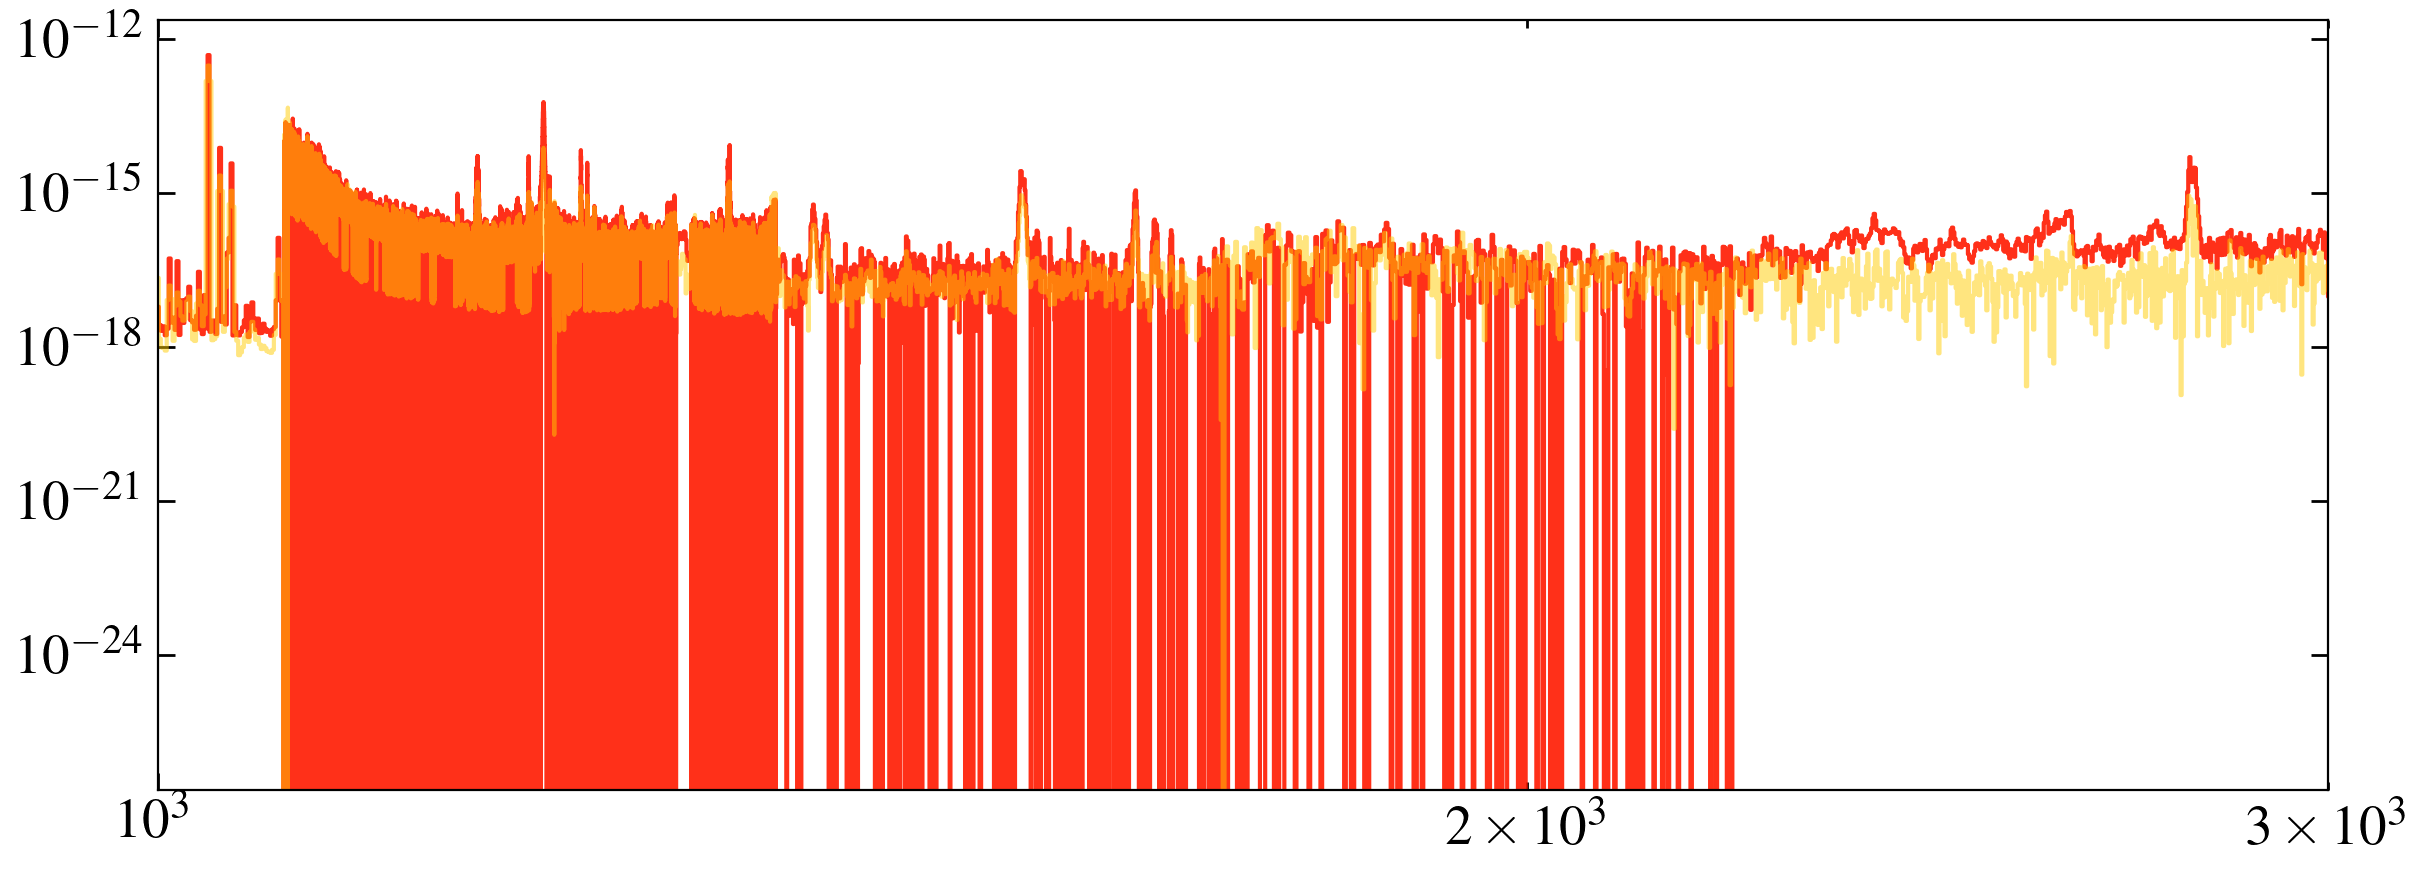

In [57]:

fig, ax = plt.subplots()

lhs = fits.getdata(specs2_sort[-2], 1)

ax.step(lhs['WAVELENGTH'], lhs['FLUX'], where='mid', label = 'LHS\,2686', alpha=0.9, c=plt.cm.autumn(0.1))
ax.step(lhs['WAVELENGTH'], lhs['ERROR'], where='mid', label = 'LHS\,2686', alpha=0.5, c=plt.cm.autumn(0.8))

ax.set_yscale('log')
ax.set_xscale('log')

ax.set_xlim(1000, 3000)



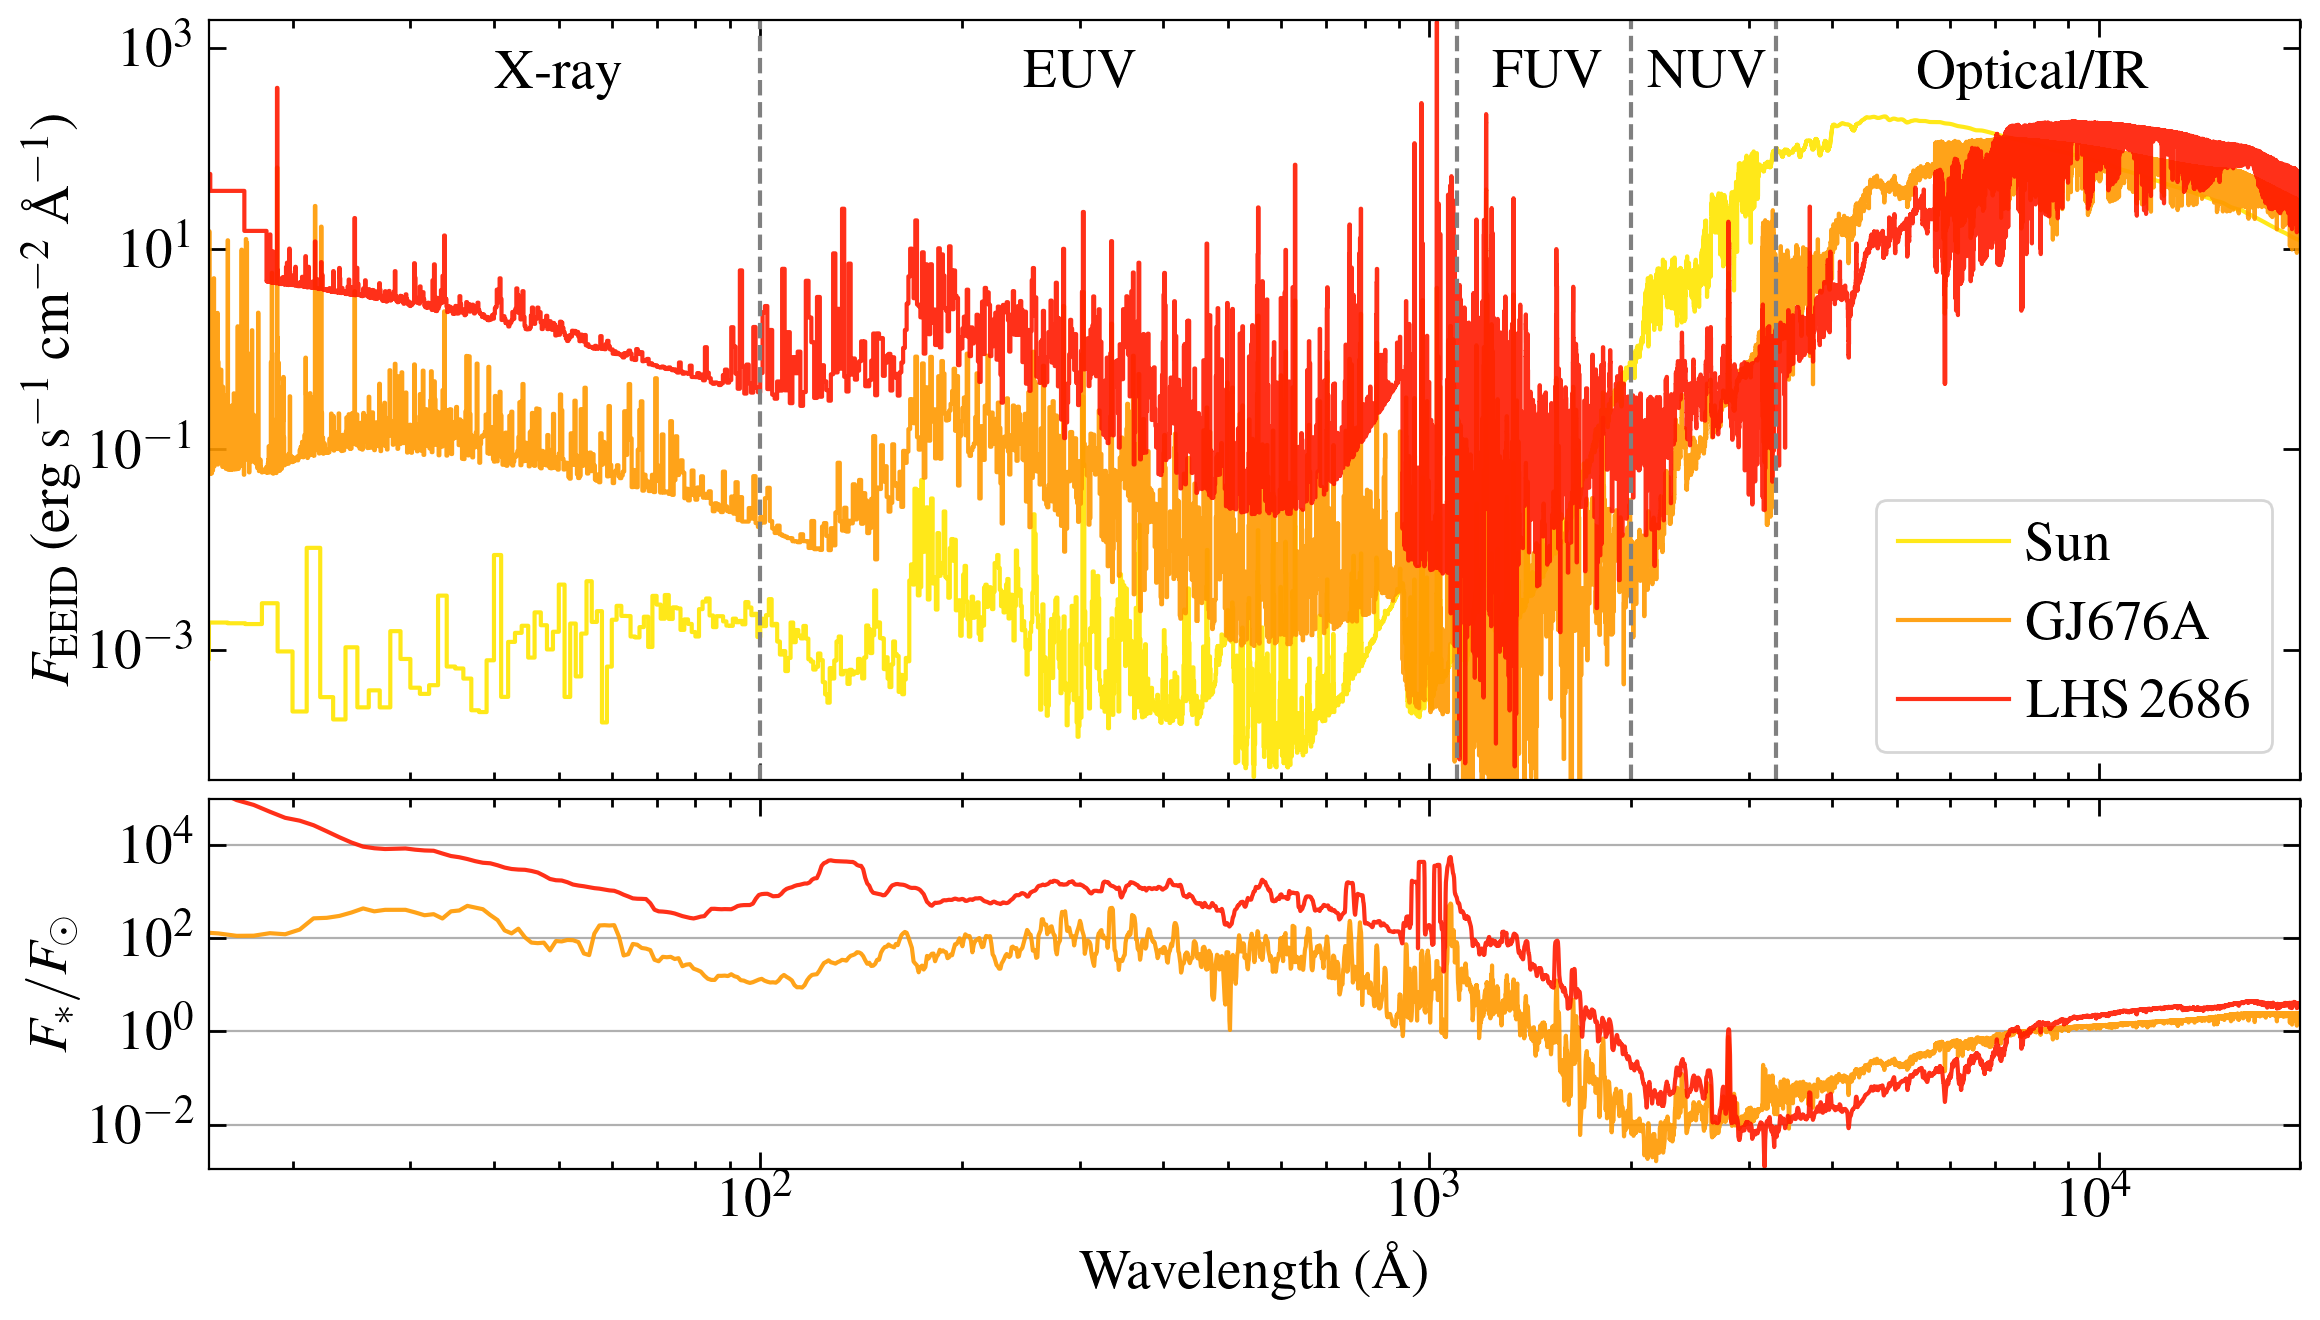

In [58]:
fig, axes = plt.subplot_mosaic([[0],
                               [0],
                               [1]], figsize=(12, 7), sharex=True)

ax = axes[0]

# #add the sun
# dstar = 3.6*u.pc
# dsun = 1*u.au
# lstar = 10**-0.6540
# eeidau = 0.471*u.au

# solscale = lstar*(dsun.to(u.m)/dstar.to(u.m))**2
# starscale = (dstar.to(u.m)/eeidau.to(u.m))**2

cols = np.linspace(0.1, 0.9, 3)[::-1]

ax.step(sw, sf, where='mid', label='Sun', alpha=0.9, c=plt.cm.autumn(0.9))



ax.set_ylim(5.1e-5, 1.9e3)
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(15, 2e4)

#highest t = gj676A

gj676 = fits.getdata(specs_sort[0], 1)
l676 =3.404e32*u.erg/u.s
d676 = 15.85539876*u.pc
eeid676 = (1*u.au)*(l676/(const.L_sun.to(u.erg/u.s)))**0.5
scale676 = (d676.to(u.au)/eeid676)**2
ax.step(gj676['WAVELENGTH'], gj676['FLUX']*scale676, where='mid', label = 'GJ676A', alpha=0.9, c=plt.cm.autumn(0.6))

#lowest t = lhs-2686
lhs = fits.getdata(specs_sort[-2], 1)
llhs =1.08e31*u.erg/u.s
dlhs = 13.14060447*u.pc
eeidlhs = (1*u.au)*(llhs/(const.L_sun.to(u.erg/u.s)))**0.5
scalelhs = (d676.to(u.au)/eeidlhs)**2
ax.step(lhs['WAVELENGTH'], lhs['FLUX']*scalelhs, where='mid', label = 'LHS\,2686', alpha=0.9, c=plt.cm.autumn(0.1))
ax.set_ylabel('$F_{\mathrm{EEID}}$ (erg s$^{-1}$ cm$^{-2}$ \AA$^{-1}$)')

ax.legend(frameon=True, loc=4)
labelfac = 1
labely = 400

ax.annotate('X-ray', (50, labelfac*labely),  ha='center')
ax.annotate('EUV', (300, labelfac*labely), ha='center')
ax.annotate('FUV', (1500, labelfac*labely), ha='center')
ax.annotate('NUV', (2600, labelfac*labely), ha='center')
ax.annotate('Optical/IR', (8000, labelfac*labely), ha='center')


# ax.legend(frameon =True, loc=4)

lines = [100, 1100, 2000, 3300]
[ax.axvline(line, ls = '--', c='0.5') for line in lines]

# yrange = 1e-10, 1e10
# for axi in [axes[0], axes[1]]:

#     axi.fill_betweenx(yrange, 0, 100, color='#2ad135', alpha=0.2, zorder=-1)
#     axi.fill_betweenx(yrange, 100, 1100, color='#66ffcc', alpha=0.2, zorder=-1)
#     axi.fill_betweenx(yrange, 1100, 2000, color='#d10fb4', alpha=0.2, zorder=-1)
#     axi.fill_betweenx(yrange, 2000, 3300, color='#0f94fa', alpha=0.2, zorder=-1)
#     axi.fill_betweenx(yrange, 3300, 2e5, color='#cc0e0e', alpha=0.2, zorder=-1)


ax1= axes[1]

mask = (gj676['WAVELENGTH'] > sw[0]) & (gj676['WAVELENGTH'] < sw[-1])
fnew = interpolate.interp1d(gj676['WAVELENGTH'][mask], gj676['FLUX'][mask], fill_value='extrapolate')(sw)
fnew = fnew*scale676
ratio = fnew/sf
ratio = convolve(ratio,Box1DKernel(5))
ax1.plot(sw, ratio, alpha=0.9, c=plt.cm.autumn(0.6))

mask = (lhs['WAVELENGTH'] > sw[0]) & (lhs['WAVELENGTH'] < sw[-1])
fnew = interpolate.interp1d(lhs['WAVELENGTH'][mask], lhs['FLUX'][mask], fill_value='extrapolate')(sw)
fnew = fnew*scalelhs
ratio = abs(fnew/sf)
ratio = convolve(ratio,Box1DKernel(20))
ax1.plot(sw, ratio, alpha=0.9, c=plt.cm.autumn(0.1))

# ax1.axhline(1, ls='--', c='C0')

ax1.grid(True, which='both', axis='y')
# ax1.plot(sw, sf)
ax1.set_yscale('log')
ax1.set_ylim(1.1e-3, 9.9e4)
ax1.set_yticks([1e-2, 1, 1e2, 1e4])#, [0.01, 1, 100, 10000])

# ax1.set_xlim(30, 2e4)
ax1.set_xlabel('Wavelength (\AA)')
ax1.set_ylabel('$F_*/F_{\odot}$')

fig.tight_layout()
fig.subplots_adjust(hspace=0.05)

fig.savefig('plots/mdwarfs_v_sun.pdf')

In [59]:
params

<Table length=12>
  Target    RAJ2000    DEJ2000     Jmag  ... lya_flux lya_pos_e lya_neg_e
  str10     float64    float64   float64 ... float64   float64   float64 
---------- ---------- ---------- ------- ... -------- --------- ---------
    GJ1132 153.716027 -47.156796   9.245 ... 1.75e-14   6.7e-15   4.3e-15
    GJ676A 262.546646 -51.637012   6.711 ... 6.02e-13   3.8e-14   3.5e-14
     GJ15A   4.594036  44.022842   5.252 ... 3.37e-12   1.9e-13   1.8e-13
     GJ649 254.536873   25.74423   6.448 ...  1.2e-12     7e-14     7e-14
     GJ163  62.315307 -53.373737   7.948 ... 1.43e-13     7e-14     5e-14
     GJ849 332.417906  -4.640765    6.51 ... 4.35e-13     5e-14   4.1e-14
     GJ674 262.166316  -46.89513   5.711 ... 2.25e-12   1.3e-13   1.2e-13
     GJ699 269.452044   4.694597   5.244 ... 1.02e-12     1e-14     1e-14
    L980-5 215.313034  -1.122204   8.948 ...      0.0       0.0       0.0
   LHS2686 197.552869  47.755291   9.584 ... 6.26e-14   8.5e-15   5.5e-15
     GJ729 282.455404 -23.836149   6.222 ... 4.78e-12   1.6e-13   1.6e-13
TRAPPIST-1 346.622013  -5.041274  11.354 ...  1.4e-14     6e-15   3.6e-15

In [60]:
const.L_sun.to(u.erg/u.s)

<Quantity 3.828e+33 erg / s>

In [61]:
len(fnew[fnew <0])

3

In [62]:
ratio

<Quantity [2.55132255e+18, 2.55132255e+18, 2.55132255e+18, ...,
           2.94220225e+00, 2.68530355e+00, 2.41460510e+00]>

In [63]:
# wi

In [64]:
# plt.plot(wsol, fsol)
# plt.yscale('log')
# plt.xlim(0, 100)

Adding a teff v rotaion plot to the hab zones plot

In [65]:
newton= fits.getdata('../../newton_prots.fits', 1)
newton.names

['Type',
 '_2MASS',
 'LSPM',
 'RAJ2000',
 'DEJ2000',
 'pmRA',
 'pmDE',
 'plx',
 'e_plx',
 'r_plx',
 'Dist',
 'RV',
 'e_RV',
 'r_RV',
 'Per',
 'Amp',
 'e_Amp',
 'M_',
 'R_',
 'Flag',
 'NPts',
 'NDays',
 'magerr',
 'F-test',
 'Simbad']

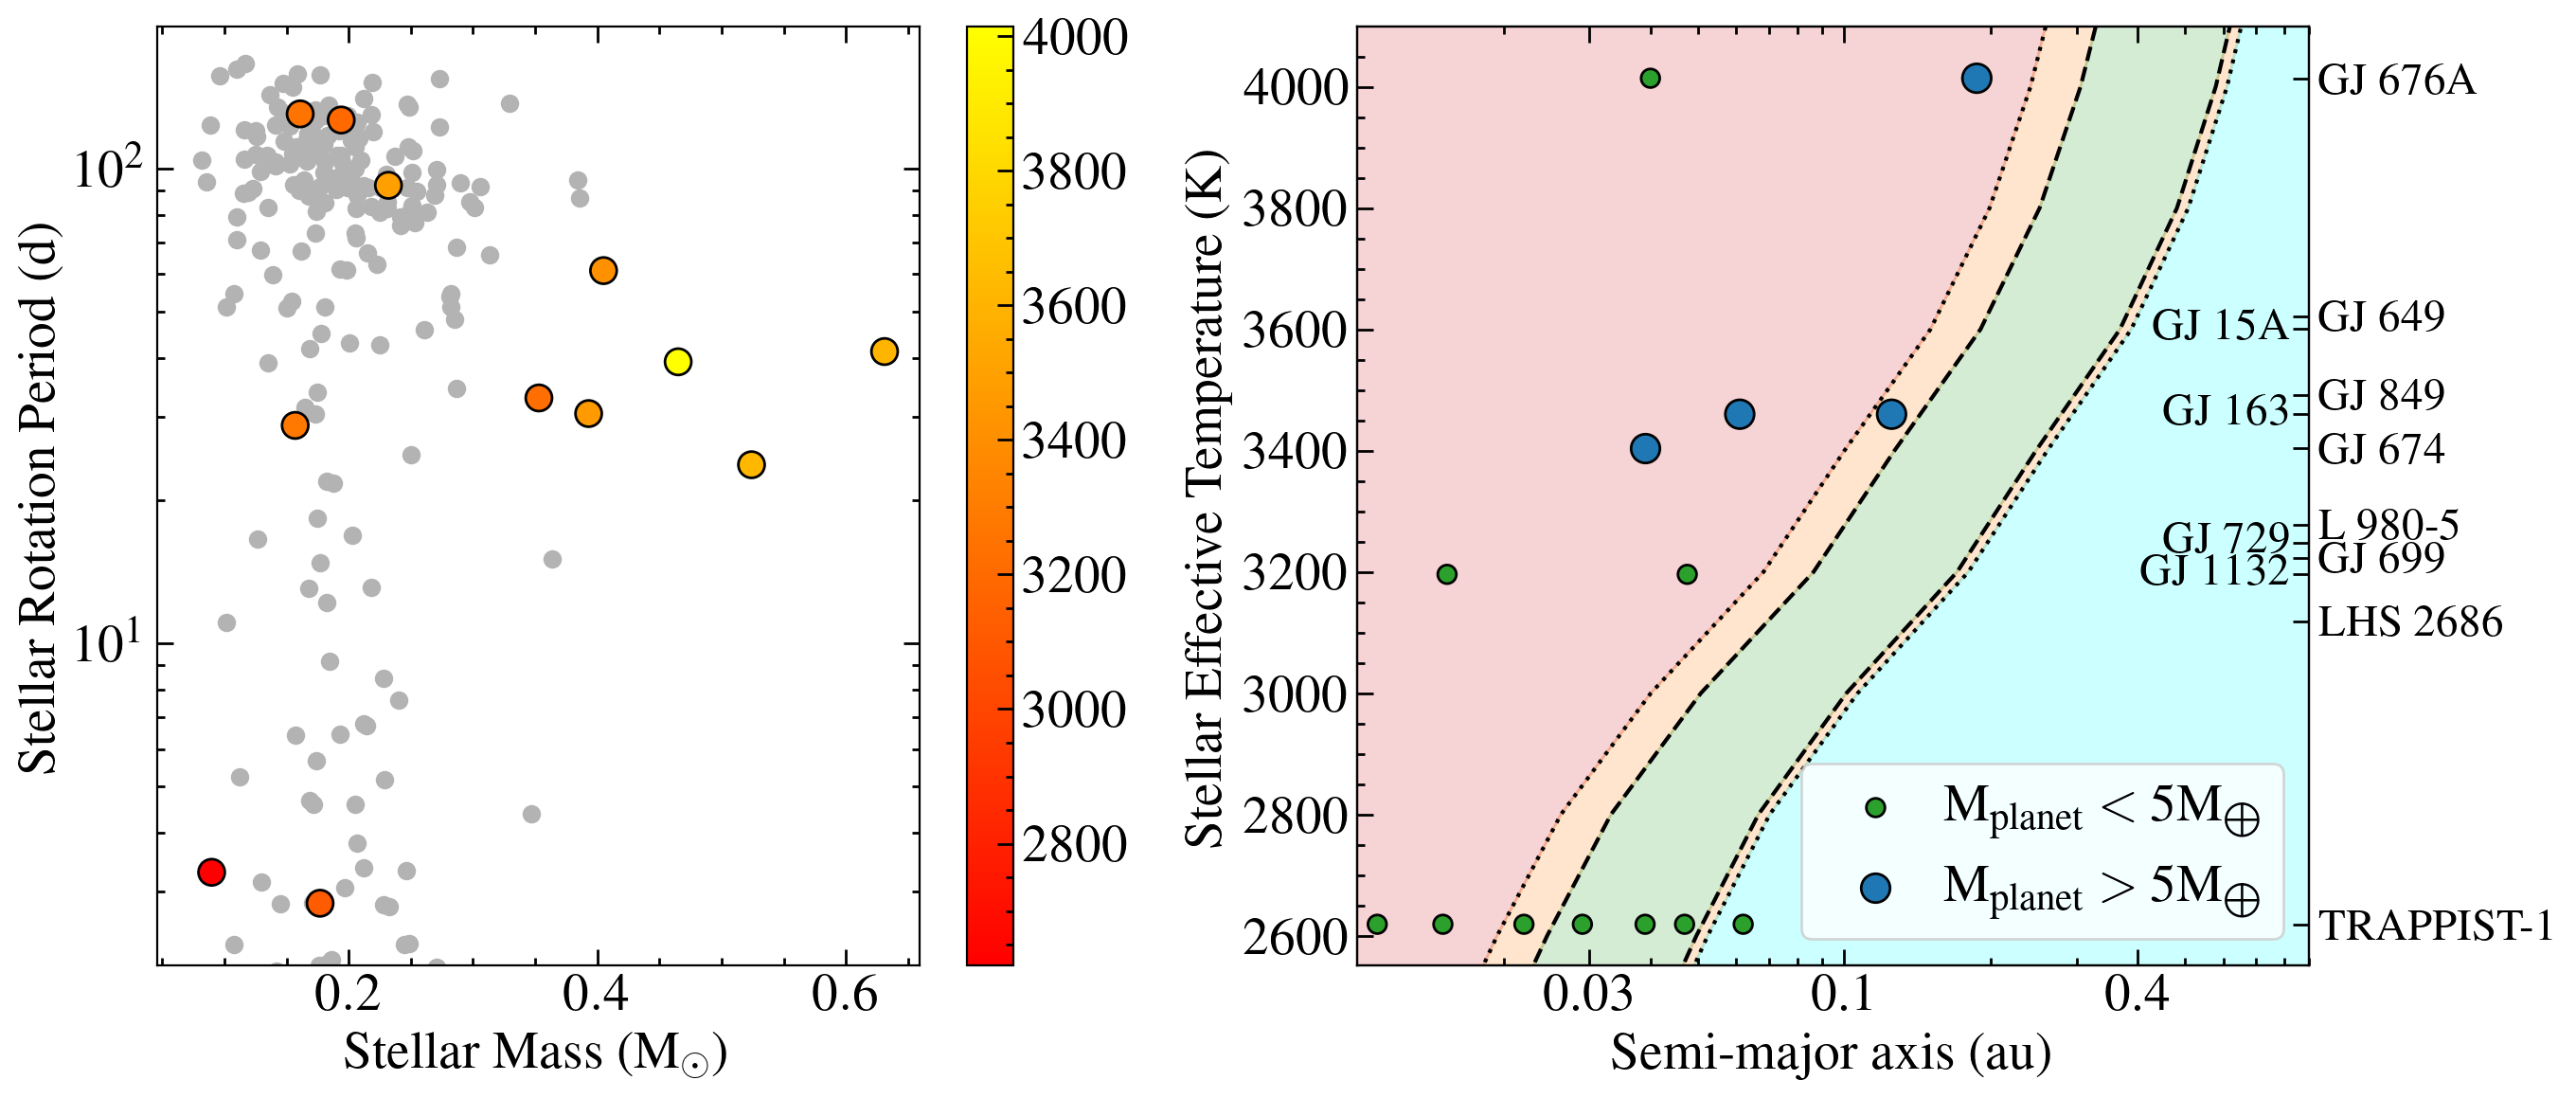

In [66]:
labels = ['Teff(K)', 'Recent Venus', 'Runaway Greenhouse', 'Maximum Greenhouse','Early Mars', '5ME Runaway  Greenhouse', '0.1ME Runaway Greenhouse']
                                              

fig, axes =plt.subplots(figsize=(14, 6.2), ncols=2)

tefflims = [2551, 4099]

columns = [1, 2, 3, 4]
cols = ['C3','C2', 'C2', 'C3']
# fillcols=['C3','C1', 'C2', 'C1']
fillcols=['C3','C1', 'C2', 'C1']
hteffs = habz[:,0]
hlums = li(hteffs)
alast = np.full(len(hteffs), 0)
ls = [':', '--', '--', ':']
for i, col in enumerate(columns):
    s = habz[:,col]
    a = (hlums/s)**0.5
    plt.plot(a,hteffs, label = labels[col], c='k', ls=ls[i], alpha=1.)
    plt.fill_betweenx(hteffs, alast, a, color=fillcols[i], alpha=0.2)
    alast = a
plt.fill_betweenx(hteffs, alast, np.full(len(alast), 10), color='cyan', alpha=0.2)
    
    
ax = axes[1]    


t1 = [0.018942461658199808, 0.023992418349443854, 0.04864997693231791, 0.05131643030421871]
# [plt.axvline(line) for line in t1] 

plt.xlabel('Semi-major axis (au)')
plt.ylabel('Stellar Effective Temperature (K)')
plt.xscale('log')
# plt.yscale('log')
plt.ylim(tefflims[0], tefflims[1])
plt.xlim(0.01,0.9)
plt.xticks((0.03, 0.1, 0.4), (0.03, 0.1, 0.4))

#calculate the middle of the conservative HZ for a given teff.
hz_in, hz_out = habz[:,2], habz[:,3]
hz_ini = interpolate.interp1d(hteffs, hz_in)
hz_outi = interpolate.interp1d(hteffs, hz_out)
for teff in mm_params['Teff']:
    lum = li(teff)
    hi = (lum/hz_ini(teff))**0.5
    ho = (lum/hz_outi(teff))**0.5
#     plt.scatter(np.mean([hi, ho]), teff)

for star in stars:
    if star == '2MASS-J23062928-0502285':
        star='TRAPPIST-1'
    if star in planet_a:
        # print('yes')
        planets = planet_a[star]
        masses = planet_m[star]
        sizes  = [] #marker size scales with mass roughly
        cols = []
        for mass in masses: 
            if mass <=5:
                sizes.append(50)
                cols.append('C2')
            else:
                sizes.append(120)
                cols.append('C0')
        teff = mm_params['Teff'][mm_params['Target']==star]
        ax.scatter(planets, np.full(len(planets), teff), s=sizes, c=cols, edgecolor='k')


ax2 = ax.twinx()
ax2.tick_params(
    axis='y',          # changes apply to the x-axis
    which='minor',      # both major and minor ticks are affected
    right=False)      # ticks along the bottom edge are off   

teff_ticks = [2619, 3119, 3196, 3223, 3248, 3278, 3404, 3460, 3492, 3601, 3621, 4014]
tick_names = ['TRAPPIST-1', 'LHS 2686','' , 'GJ 699', '','L 980-5' , 'GJ 674','', 'GJ 849','' , 'GJ 649', 'GJ 676A']
skip_names = ['GJ 1132','GJ 729','GJ 163','GJ 15A']
skip_teffs = [3196,3248,3460, 3601]


ax2.set_yticks(teff_ticks, minor=False)
ax2.set_yticklabels(tick_names, size=17)
ax2.set_ylim(tefflims[0], tefflims[1])
[plt.annotate(name, (0.98,teff), xycoords=('axes fraction', 'data'), ha='right', va='center', size=17) for name, teff in zip(skip_names, skip_teffs)]

plt.scatter(10000, 10000, c='C2', edgecolor='k', s=50, label = r'$\mathrm{M_{planet}} < 5\mathrm{M_{\bigoplus}}$')
plt.scatter(10000, 10000, c='C0', edgecolor='k', s=120, label = r'$\mathrm{M_{planet}} > 5\mathrm{M_{\bigoplus}}$')

plt.legend(loc=4, frameon=True)




ax1 = axes[0]

prots_sort_agd = np.copy(prots_sort)
markers = []
for i in range(len(prots_sort)):
    if prots_sort[i] ==-1:
        # sizes.append(50)
        markers.append('x')
        prots_sort_agd[i] = 200
    else:
        # sizes.append(p+10)
        markers.append('o')
cols = np.linspace(0, 0.8, len(prots_sort))[::-1]

# for i in range(len(prots_sort)):
    # ax1.scatter(mass_sort[i],prots_sort_agd[i],  marker=markers[i],edgecolor='k', s=100, c=plt.cm.autumn(cols[i]))

points = ax1.scatter(mass_sort,prots_sort_agd,  marker='o',edgecolor='k', s=100, c=teffs_sort, cmap="autumn")
# ax1.colorbar()

fig.colorbar(points, ax=ax1)

ax1.set_xlabel('Stellar Mass (M$_{\odot}$)')
ax1.set_ylabel('Stellar Rotation Period (d)')


ax1.scatter(newton['M_'], newton['Per'], c='0.7', zorder=-10)
ax1.set_ylim(2.1, 199)

ax1.set_yscale('log')




plt.tight_layout()
# plt.savefig('plots/planets_hz.png', facecolor='w', dpi=150)
# plt.savefig('plots/planets_hz.pdf', facecolor='w', dpi=150)
# fig.savefig('plots/params_hz.pdf')

In [79]:
xcatpath = '/media/david/2tb_ext_hd/hddata/carmenes_binary/xraycat/'
xraycat = fits.open('{}J_ApJ_743_48_catalog.dat.fits'.format(xcatpath))
xraydata = xraycat[1].data
xraydata.names

['Name',
 'HD',
 'HIP',
 'GJ',
 'GCVS',
 '2MASS',
 'RAh',
 'RAm',
 'RAs',
 'DE-',
 'DEd',
 'DEm',
 'DEs',
 'Cluster',
 'Dist',
 'Vmag',
 'V-K',
 'SpT',
 'r_SpT',
 'logLx',
 'r_logLx',
 'Prot',
 'r_Prot',
 'M*',
 'R*',
 'L*',
 'Teff',
 'dcz',
 'Lx/bol']

(0.001, 0.66)

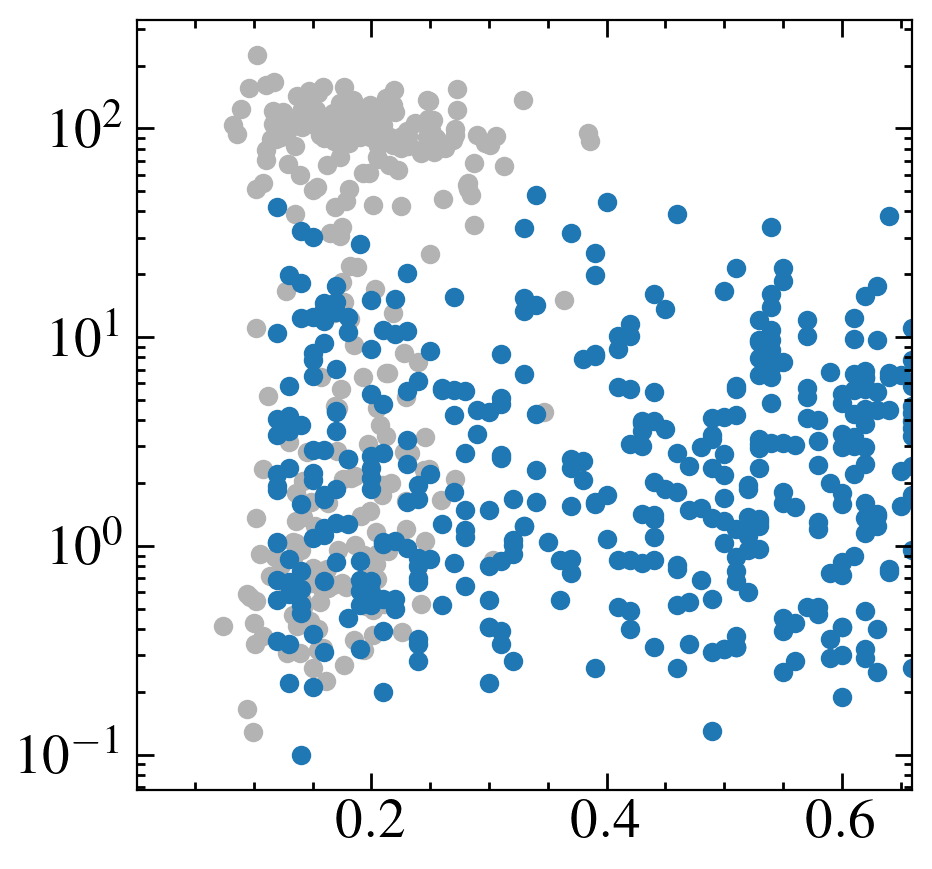

In [68]:
fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(xraydata['M*'], xraydata['Prot'])
ax.scatter(newton['M_'], newton['Per'], c='0.7', zorder=-10)

ax.set_yscale('log')
ax.set_xlim(0.001,0.66)

In [69]:
mm_params['Target']

<Column name='Target' dtype='str10' length=12>
    GJ1132
    GJ676A
     GJ15A
     GJ649
     GJ163
     GJ849
     GJ674
     GJ699
    L980-5
   LHS2686
     GJ729
TRAPPIST-1

In [70]:
for spec in specs2_sort:
    data = fits.getdata(spec, 1)
    w, inst = data['WAVELENGTH'], data['INSTRUMENT']
    mask = inst ==256
    print(w[mask][0])

3259.5590801168073
3157.706371394405
3067.431753800151
3279.604469842293
3272.0402206591684
3155.2551735986917
3657.37128566154
3067.571287526454
3243.2125402588417
4334.549466078687
3150.3638909522683
3217.8006010776307


In [71]:
(max(w)*u.AA).to(u.um)

<Quantity 999.5 um>

In [72]:
max(w)

9995000.0

Girish tables.

In [73]:
metapath = '/media/david/2tb_ext_hd/hddata/mega_muscles/dems/metadata/'
metas = glob.glob('{}*metadata*.fits'.format(metapath))
metas

['/media/david/2tb_ext_hd/hddata/mega_muscles/dems/metadata/GJ_1132_p17_metadata_summary.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/dems/metadata/gj_15A_p17_metadata_summary.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/dems/metadata/gj_163_p17_metadata_summary.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/dems/metadata/gj_649_p17_metadata_summary.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/dems/metadata/gj_674_p17_metadata_summary.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/dems/metadata/gj_676A_p17_metadata_summary.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/dems/metadata/gj_699_p17_metadata_summary.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/dems/metadata/gj_729_p17_metadata_summary.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/dems/metadata/gj_849_p17_metadata_summary.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/dems/metadata/gj_876_p17_metadata_summary.fits',
 '/media/david/2tb_ext_hd/hddata/mega_muscles/de

In [74]:
# fig, ax = plt.subplots()

# starts = np.array([], dtype=float)
# ends = np.array([], dtype=float)

line_stars = []
names = []

fluxes = []
errors = []
starts =[]
ends = []

    # print(data['Species'])
# for row in data:
#         if row['lambda_min'] not in starts:
#             starts.append(row['lambda_min'])
#             ends.append(row['lambda_max'])
#             names.append(row['Species'])

# for i in range(len(starts)):
#     print(names[i], starts[i], ends[i])


# for i, meta in enumerate(metas):
#     star_fluxes = []
#     star_errors = []
#     data = fits.getdata(meta, 2)
#     mask = data['Species'] != 'SPEC'
#     data = data[mask]
#     for start in starts:
#         mask = data['lambda_min'] == start
#         row = data[mask]
#         # print(row)
#         if len(row) > 0:
#             star_fluxes.append(row['Flux'][0])
#             star_errors.append(row['Error'][0])
#         else:
#             star_fluxes.append(0.0)
#             star_errors.append(0.0)
#     fluxes.append(star_fluxes)
#     errors.append(star_errors)

# means = np.mean((starts, ends), axis=0)
# print(means)   

# for i in range(len(names)):
    # print(names[i], means[i])

lines = np.array([1334.524,  1242.00 , 1354.08, 1238.821, 1253.811,  1309.27, 1206.499, 1335.709, 1550.772, 1218.39, 1404.818])
# ions = ['C II', 'Fe XII', 'Fe XXI', 'N V', 'S II', 'Si II', 'Si III', 'C II', 'C IV', 'O V', 'Si IV']
# lines_doub = np.array([1334.524,  1242.00 , 1354.08, 1238.821, 1253.811,  1309.27, 1206.499, 1335.709, 1550.772, 1218.39, 1404.818])
ions = ['Si III', 'O V', 'N V', 'Fe XII', 'S II', 'Si II', 'C II' ,'Fe XXI', 'Si IV' ,'C IV']
lines_doub = np.array([1206.499, 1218.39,  1240,  1242.0, 1253.811, 1309.27,  1335, 1354.08,  1400.0, 1550])

scale = 1e16

name_str = ' '
for ion in ions:
    name_str += ' & {}'.format(ion)
name_str += '\\\\'
print(name_str)

line_str = ' '
for line in lines_doub:
    line_str += ' & {}'.format(line)
line_str += '\\\\'
print(line_str)

for i, meta in enumerate(metas):
    star = fits.getheader(meta, 0)['Star']
    star_fluxes = np.zeros(len(lines_doub))
    star_errors = np.zeros(len(lines_doub))
    data = fits.getdata(meta, 2)
    mask = data['Species'] != 'SPEC'
    data = data[mask]
    for i, line in enumerate(lines_doub):
        # print(line)
        for row in data:
            s, e = row['lambda_min'], row['lambda_max']
            if line >= s-2 and line <= s+5:
                # print('yes')
                star_fluxes[i] = row['Flux']
                star_errors[i] = row['Error']
                
    # for start in starts:
#         mask = data['lambda_min'] == start
#         row = data[mask]
#         # print(row)
#         if len(row) > 0:
#             star_fluxes.append(row['Flux'][0])
#             star_errors.append(row['Error'][0])
#         else:
#             star_fluxes.append(0.0)
#             star_errors.append(0.0)
    fluxes.append(star_fluxes)
    errors.append(star_errors)
    row_string = star
    for f, e in zip(star_fluxes, star_errors):
        if e == 0.0:
            row_string += ' & '
        elif f == 0.0:
            row_string += ' & $<${:.2f}'.format(3*e*scale)
        else:
            row_string += ' & {:.2f}$\pm${:.2f}'.format(f*scale, e*scale)
    row_string += '\\\\'
    print(row_string)


# for i in range(len(lines_doub)):
#     print(ions[i], lines_doub[i], fluxes[0][i], fluxes[1][i])
    
# args = np.argsort(lines)
# print(np.array(names)[args])
# print(lines[args])

# print(names, starts)
    # print(data['Species'])
    
    # means = np.mean((data['lambda_min'], data['lambda_max']), axis=0)
    # ax.errorbar(means, data['Flux'],yerr=data['Error'], ls='none', marker='o')
    # starts = np.hstack((starts, data['lambda_min']))
# ax.set_yscale('log')

# print(np.unique(starts))
# print(names)

# for i in range(len(line_stars)):
    

  & Si III & O V & N V & Fe XII & S II & Si II & C II & Fe XXI & Si IV & C IV\\
  & 1206.499 & 1218.39 & 1240.0 & 1242.0 & 1253.811 & 1309.27 & 1335.0 & 1354.08 & 1400.0 & 1550.0\\
GJ 1132 & 0.21$\pm$0.01 &  & 0.25$\pm$0.12 & 0.25$\pm$0.12 &  &  & 0.63$\pm$0.03 &  &  & 1.23$\pm$0.87\\
GJ 15A & 202.15$\pm$3.41 & 119.75$\pm$3.01 & 294.40$\pm$2.11 & 294.40$\pm$2.11 &  &  & 320.17$\pm$3.00 &  & 16.28$\pm$1.18 & 1119.30$\pm$8.18\\
GJ 163 & 6.91$\pm$2.00 & 0.44$\pm$0.03 & 0.63$\pm$0.02 & 0.63$\pm$0.02 &  &  & 1.95$\pm$0.04 & $<$1.50 &  & 0.70$\pm$0.04\\
GJ 649 &  & 1.01$\pm$10.08 & 24.93$\pm$0.17 & 24.93$\pm$0.17 &  &  & 44.36$\pm$0.17 & $<$1.73 &  & 65.56$\pm$3.28\\
GJ 674 & 77.80$\pm$0.37 &  & 121.14$\pm$0.52 & 121.14$\pm$0.52 &  &  & 116.90$\pm$0.44 & $<$0.17 &  & \\
GJ 676A &  & 5.25$\pm$0.53 & 48.05$\pm$0.23 & 48.05$\pm$0.23 &  & 1.59$\pm$15.85 & 72.10$\pm$7.21 & $<$1.03 & 4.95$\pm$1.36 & 88.44$\pm$8.84\\
Barnard\'s Star & 14.39$\pm$1.25 &  & 31.49$\pm$0.61 & 31.49$\pm$0.61 & 0.02$\pm$0

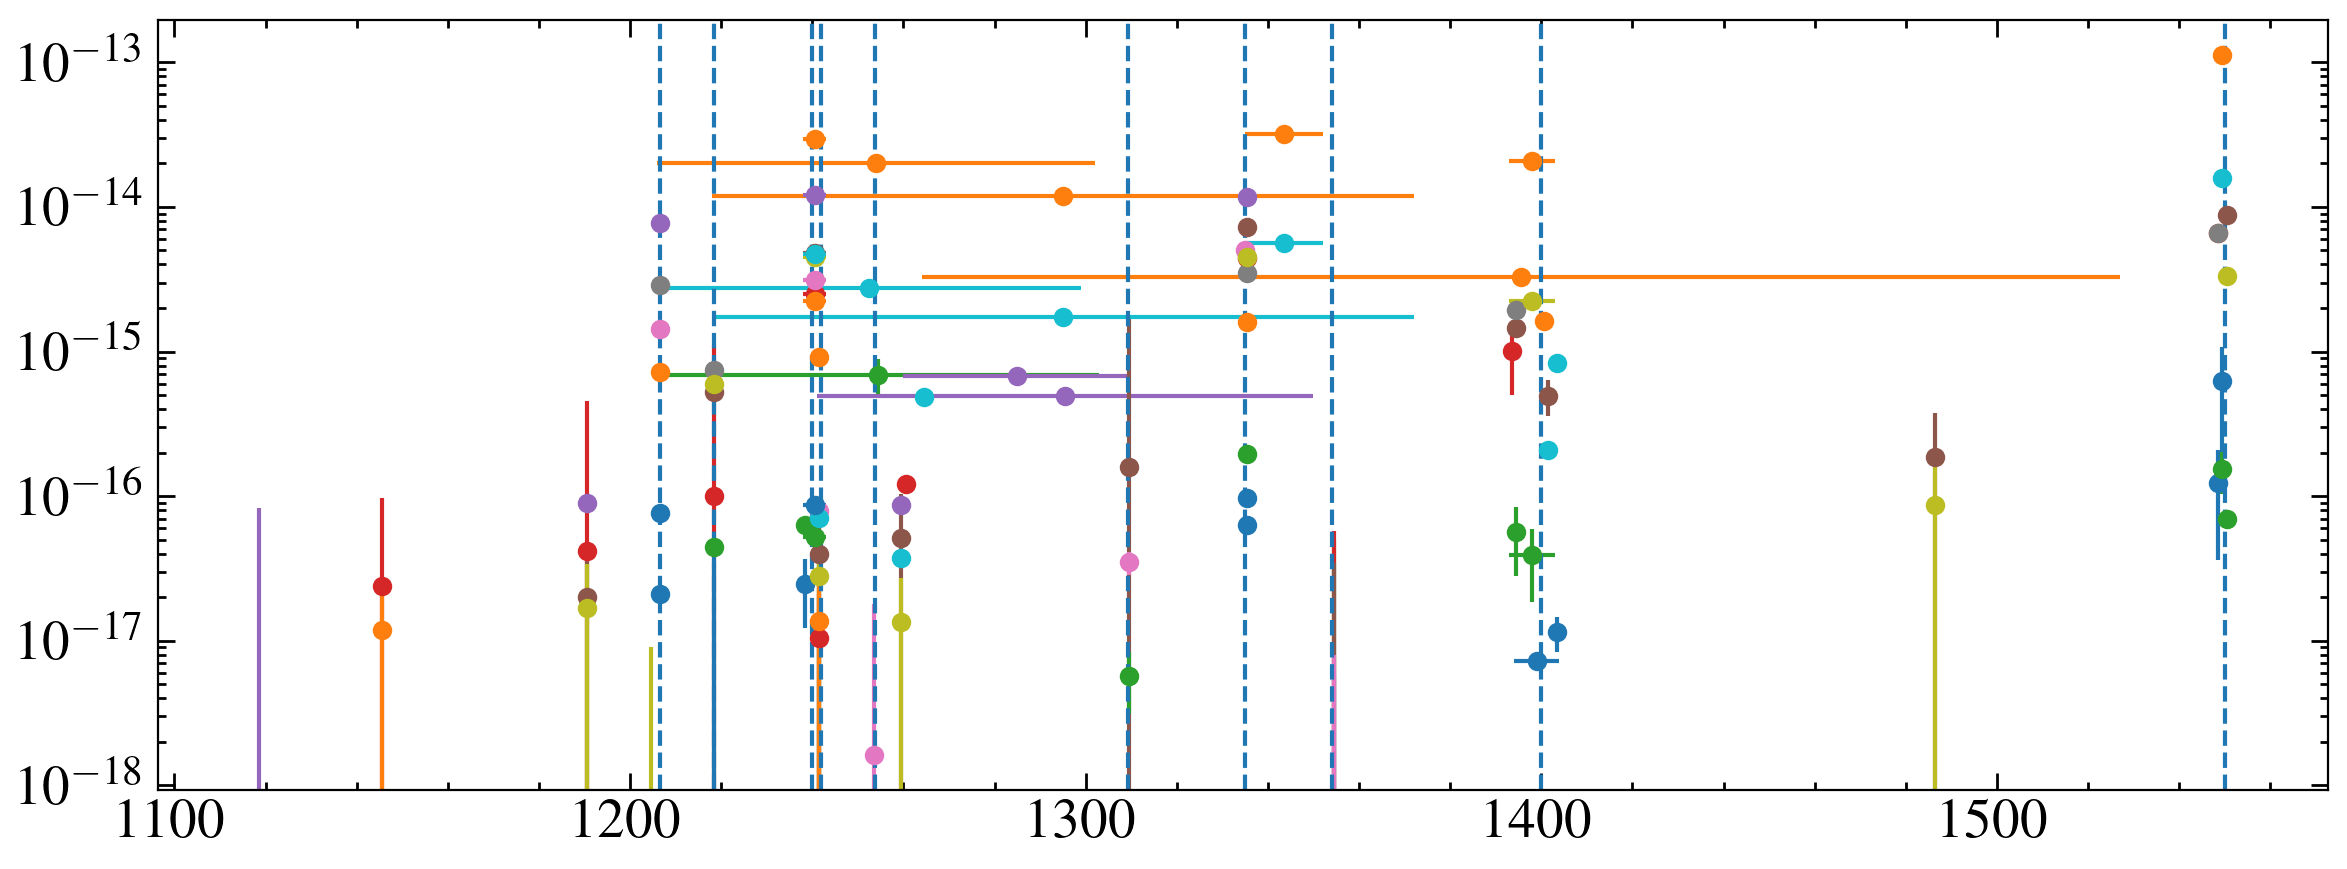

In [75]:
fig, ax = plt.subplots()

for i, meta in enumerate(metas):
    line_stars.append(fits.getheader(meta, 0)['Star'])
    data = fits.getdata(meta, 2)
    mask = data['Species'] != 'SPEC'
    data = data[mask]
    means = np.mean((data['lambda_min'], data['lambda_max']), axis=0)
    ax.errorbar(means, data['Flux'],yerr=data['Error'], xerr = (means-data['lambda_min'], data['lambda_max']-means), ls='none', marker='o')
[ax.axvline(line, ls='--') for line in lines_doub] 
ax.set_yscale('log')


Plot of all NUV/optical spectra

/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ676A/hlsp_muscles_model_phx_gj676a_na_v24_component-spec.fits
/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ649/hlsp_muscles_model_phx_gj649_na_v24_component-spec.fits
/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ15A/hlsp_muscles_model_phx_gj15a_na_v24_component-spec.fits
/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ849/hlsp_muscles_model_phx_gj849_na_v24_component-spec.fits
/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ163/hlsp_muscles_model_phx_gj163_na_v24_component-spec.fits
/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ674/hlsp_muscles_model_phx_gj674_na_v24_component-spec.fits
/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/L-980-5/hlsp_muscles_model_phx_l-980-5_na_v24_component-spec.fits
/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ729/hlsp_muscles_model_phx_gj729_na_v24_component-spec.fits
/media/david/2tb_ext_hd/hddata/mega_muscles/v24_hlsp/GJ699/hlsp_muscles_mo

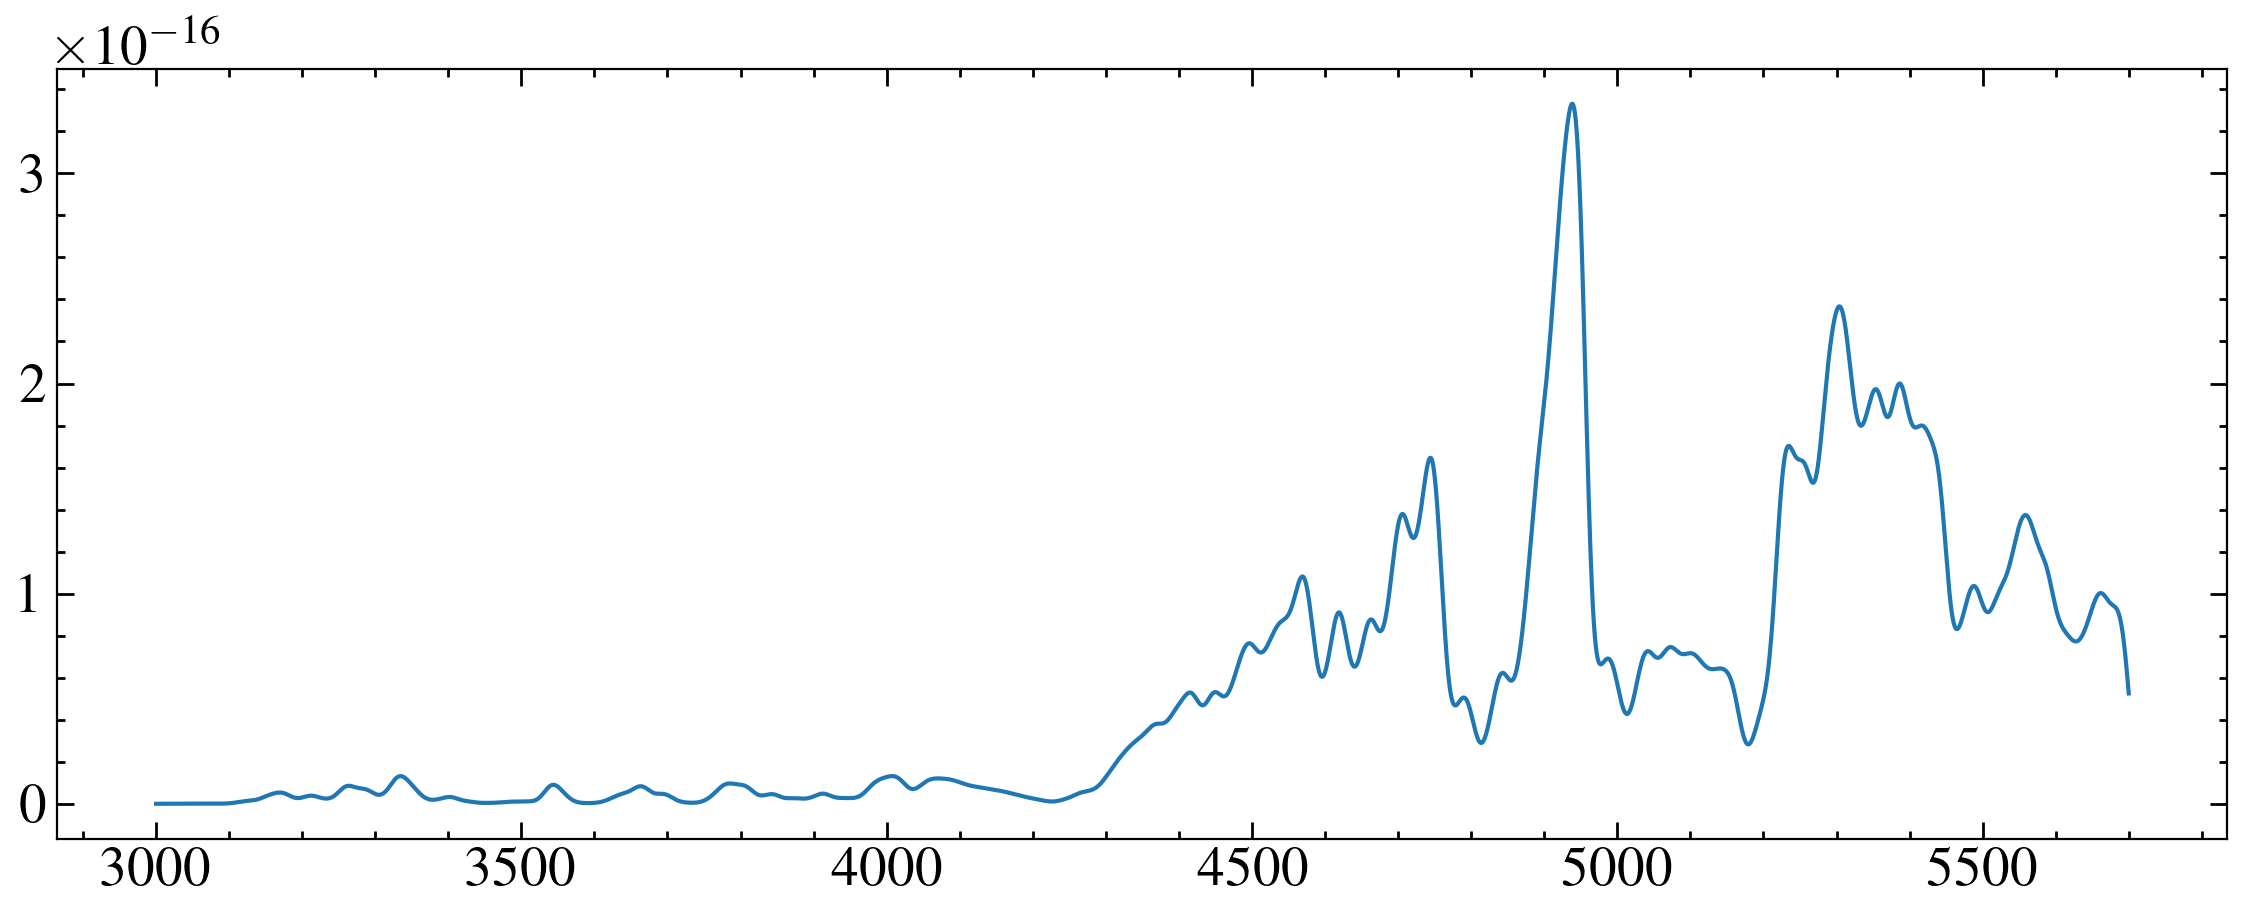

In [210]:
#get all phx spectra first so I don't have to reloed them each time

pws = []
pfs = []
starscheck = []
# for i in (0, 1):
    # ax = axes[i]
    # starrow = stars_sort[0+i*6:6+i*6]

for i, star in enumerate(stars_sort):
    if star == '2MASS-J23062928-0502285':
        star = 'TRAPPIST-1'
    starpath = '{}{}/'.format(path, star)
    phxpath = glob.glob('{}*phx*.fits'.format(starpath))[0]
    print(phxpath)
    phx = fits.getdata(phxpath, 1)
    phxnorm = fits.getheader(phxpath, 0)['NORMFAC']
    pw, pf = phx['WAVELENGTH'], phx['FLUX']*phxnorm
    pmask = (pw > 3000) & (pw < 5700)
    pw, pf = pw[pmask], pf[pmask]
    pf = convolve(pf, Gaussian1DKernel(200))
    pws.append(pw)
    pfs.append(pf)
    starscheck.append(star)

plt.plot(pw, pf)
            


/tmp/ipykernel_295019/2262525791.py:18: RuntimeWarning: invalid value encountered in divide
  sn = np.array([np.mean(fo[i:i+bin_width]/eo[i:i+bin_width]) for i in range(len(wo[:-bin_width]))])


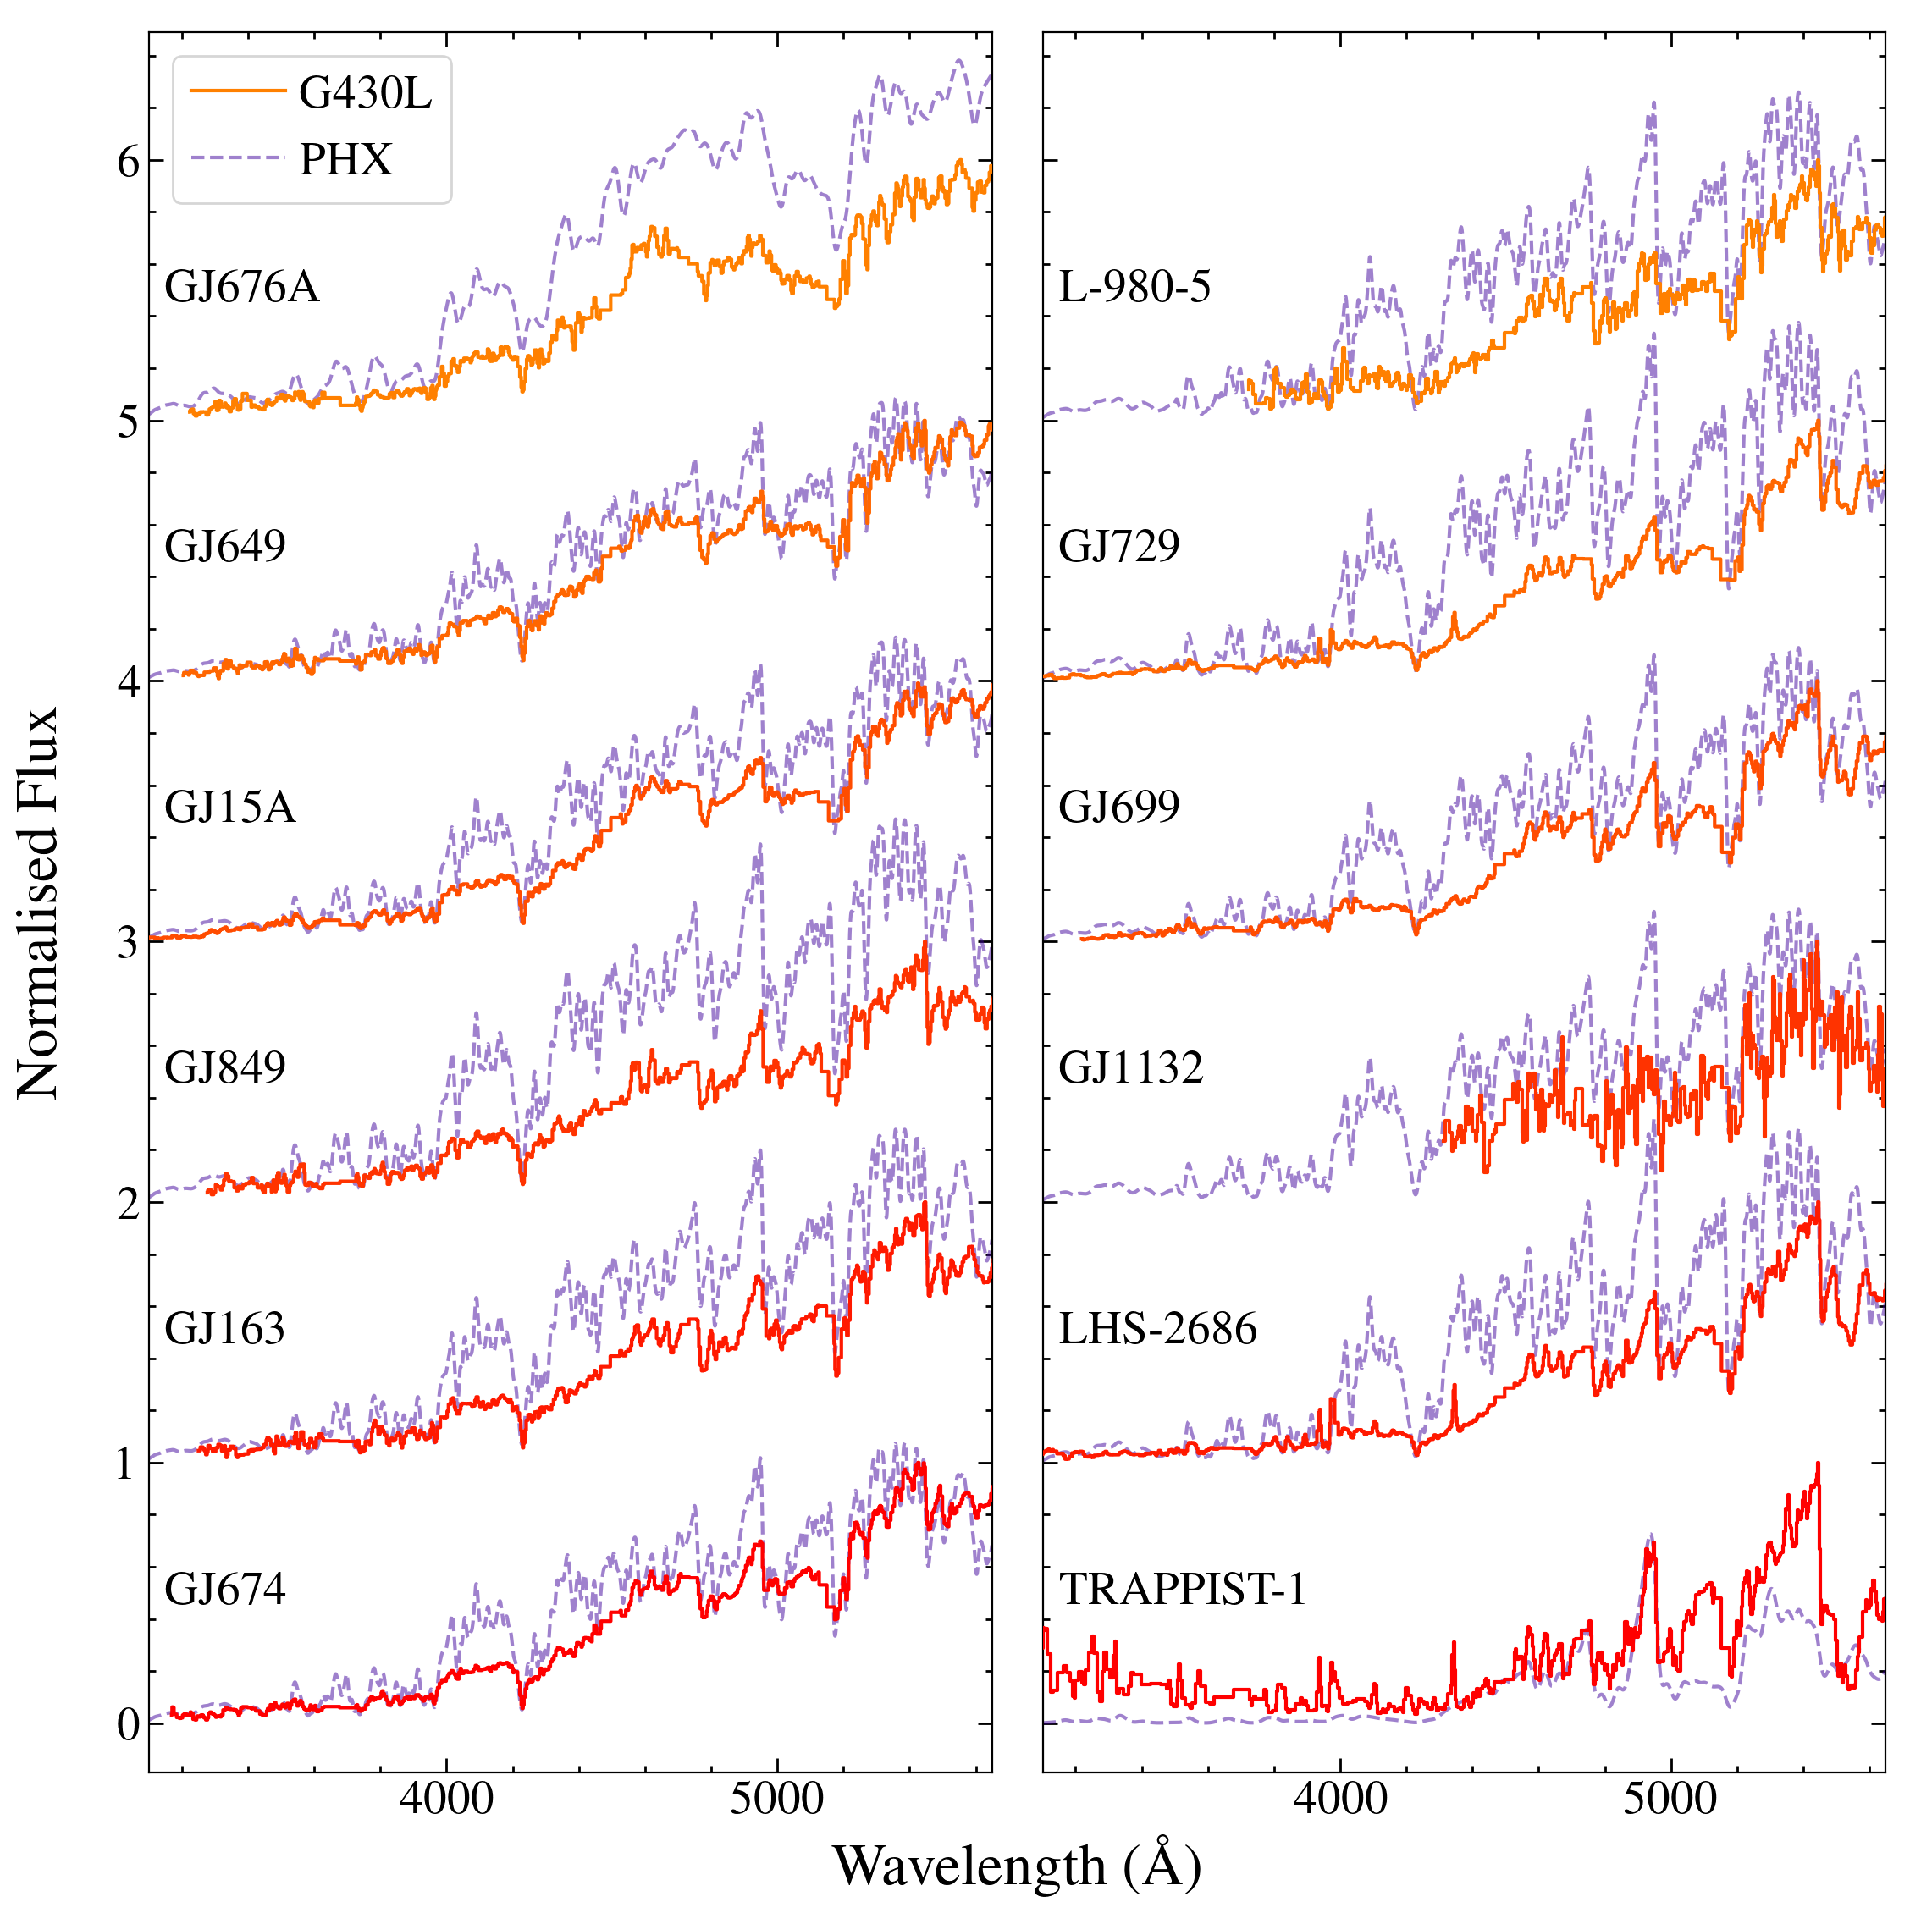

In [194]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 12), sharey = True, sharex=True)
for i in (0, 1):
    ax = axes[i]
    starrow = stars_sort[0+i*6:6+i*6]
    for j, star in enumerate(starrow):
        star = starrow[5-j]
        if star == '2MASS-J23062928-0502285':
            star = 'TRAPPIST-1'
        # print(star)
        starpath = '{}{}/'.format(path, star)
        opt = fits.getdata(glob.glob('{}*g430l*.fits'.format(starpath))[0], 1)
        wo, fo, eo, dq = opt['WAVELENGTH'], opt['FLUX'], opt['ERROR'], opt['DQ']
        # mask = (fo/eo > 5) & (wo > 3000) & (dq ==0)
        # print(max(wo))
        # wo, fo, eo = wo[mask], fo[mask], eo[mask]

        bin_width = 50
        sn = np.array([np.mean(fo[i:i+bin_width]/eo[i:i+bin_width]) for i in range(len(wo[:-bin_width]))])
        start = wo[:-bin_width][np.where(sn > 1)[0][0]]
        mask = (wo > start) & (dq ==0)
        wo, fo, eo = wo[mask], fo[mask], eo[mask]
        fo = convolve(fo, Box1DKernel(2))

        norm = np.max(fo)
        # print(norm)
        # ax.step(wo, (fo/norm)+j, where='mid', c=plt.cm.plasma(0.1), zorder=10)
        ax.step(wo, (fo/norm)+j, where='mid', c=plt.cm.autumn(j/10), zorder=10, label='G430L', lw=1.5)
        # ax.plot(wo, (fo/norm)+j, c=plt.cm.autumn(j/10), zorder=10, label='G430L', lw=2)

        pw, pf = pws[(5-j)+i*6], pfs[(5-j)+i*6]
        # print(starscheck[(5-j)+i*6])
        # norm = np.max(pf)
        ax.plot(pw, (pf/norm)+j, alpha=0.5, c= plt.cm.plasma(0.1), label='PHX', ls='--')
        ax.annotate(star, (3150, j+0.5), xycoords='data', ha='left', va='center')


      

        # nuv = fits.getdata(glob.glob('{}*g230l*.fits'.format(starpath))[0], 1)
        # wn, fn, en, dq = nuv['WAVELENGTH'], nuv['FLUX'], nuv['ERROR'], nuv['DQ']
        # mask = (fn/en > 5) & (wn> 1700) & (dq ==0)
        # wn, fn, en = wn[mask], fn[mask], en[mask]
        # ax.step(wn, (fn/norm)+(10**j), where='mid')
        # ax.step(wn, (fn/norm), where='mid')

    # ax.set_yscale('log')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
axes[0].legend(by_label.values(), by_label.keys(), loc=2, frameon=True)
ax.set_xlim(3101, 5649)
ax.set_ylim(-0.19, 6.49)

bigax= fig.add_subplot(111, frame_on=False)
bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
bigax.set_ylabel('Normalised Flux', size=25, labelpad=5)
bigax.set_xlabel('Wavelength (\AA)', size=25)
fig.tight_layout()
# plt.subplots_adjust(hspace=0.03)



In [180]:
# fig, ax = plt.subplots(figsize=(10, 6))
# x = np.linspace(0, 2, 1000)
# for i in range(0, 10, 1):
#     mod = models.Sine1D(1, 1, 0+i/10)
#     ax.plot(x, mod(x), c=plt.cm.plasma(i/10), label='{}'.format(i/10))
# ax.set_xlim(0, 1)
# ax.legend(frameon=True)
# ax.set_xticks([])
# ax.set_yticks([])

In [181]:
# # fig, axes = plt.subplots(ncols=2, figsize=(12, 12), sharey = True, sharex=True)
# for i, star in enumerate(stars_sort):
#     fig, ax = plt.subplots()
#     if star == '2MASS-J23062928-0502285':
#         star = 'TRAPPIST-1'
#     print(star)
#     starpath = '{}{}/'.format(path, star)
#     opt = fits.getdata(glob.glob('{}*g430l*.fits'.format(starpath))[0], 1)
#     wo, fo, eo, dq = opt['WAVELENGTH'], opt['FLUX'], opt['ERROR'], opt['DQ']
#     mask = (fo/eo > 5) & (wo > 3000) & (dq ==0)
#     wo, fo, eo = wo[mask], fo[mask], eo[mask]
#     norm = np.max(fo)
#     # print(norm)
#     ax.step(wo, fo, where='mid')
#     ax.annotate(star, (0.05, 0.95), xycoords='axes fraction', ha='left', va='top')
    
#     pw, pf = pws[i], pfs[i]
#     # norm = np.max(pf)
#     ax.plot(pw, pf)

# plt.show()
      

#         # nuv = fits.getdata(glob.glob('{}*g230l*.fits'.format(starpath))[0], 1)
#         # wn, fn, en, dq = nuv['WAVELENGTH'], nuv['FLUX'], nuv['ERROR'], nuv['DQ']
#         # mask = (fn/en > 5) & (wn> 1700) & (dq ==0)
#         # wn, fn, en = wn[mask], fn[mask], en[mask]
#         # ax.step(wn, (fn/norm)+(10**j), where='mid')
#         # ax.step(wn, (fn/norm), where='mid')

#     # ax.set_yscale('log')





OSError: File-like object does not have a 'write' method, required for mode 'ostream'.

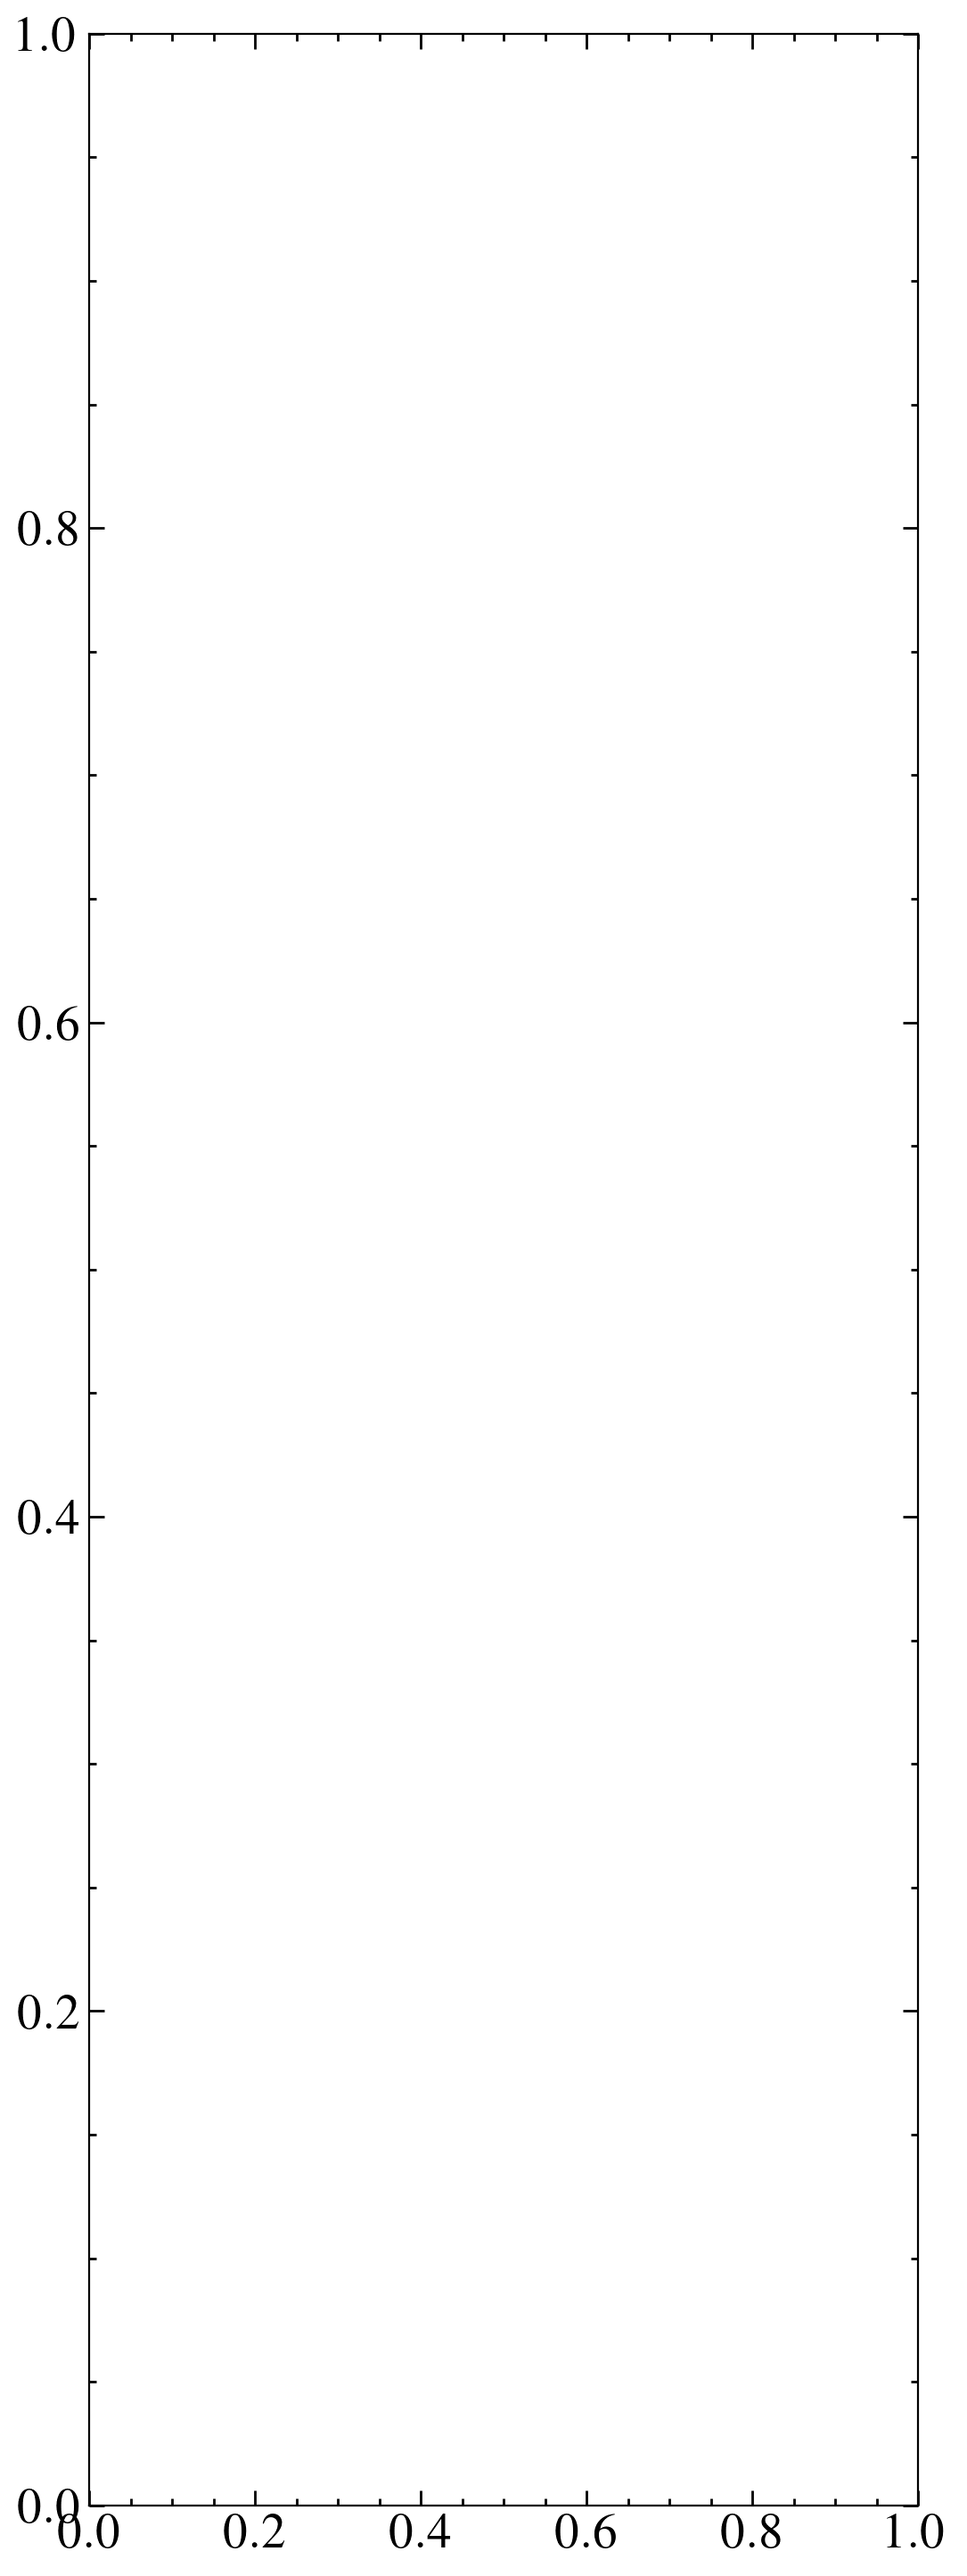

In [212]:
fig, ax = plt.subplots(figsize=(6, 18))
# for i in (0, 1):
    # ax = axes[i]
    # starrow = stars_sort[0+i*6:6+i*6]
for j, star in enumerate(stars_sort[::-1]):
    # star = starrow[5-j]
    if star == '2MASS-J23062928-0502285':
        star = 'TRAPPIST-1'
    # print(star)
    starpath = '{}{}/'.format(path, star)
    opt = fits.getdata(glob.glob('{}*g430l*.fits'.format(starpath))[0], 1)
    wo, fo, eo, dq = opt['WAVELENGTH'], opt['FLUX'], opt['ERROR'], opt['DQ']
    mask = (wo > 3000) 
    wo, fo, eo, dq = wo[mask], fo[mask], eo[mask], dq[mask]

    bin_width = 30
    sn = np.array([np.mean(fo[i:i+bin_width]/eo[i:i+bin_width]) for i in range(len(wo[:-bin_width]))])
    start = wo[:-bin_width][np.where(sn > 1)[0][0]]
    if star == 'TRAPPIST-1':
        print(start)
        start = 3600
    mask = (wo > start) & (dq ==0)
    
    wo, fo, eo = wo[mask], fo[mask], eo[mask]
    fo = convolve(fo, Box1DKernel(2))

    norm = np.max(fo[wo >4000])
    # print(norm)
    # ax.step(wo, (fo/norm)+j, where='mid', c=plt.cm.plasma(0.1), zorder=10)
    ax.step(wo, (fo/norm)+j, where='mid', c=plt.cm.autumn(j/10), zorder=10, label='G430L', lw=1.5)
    # ax.plot(wo, (fo/norm)+j, c=plt.cm.autumn(j/10), zorder=10, label='G430L', lw=2)

    pw, pf = pws[11-j], pfs[11-j]
    # print(starscheck[(5-j)+i*6])
    # norm = np.max(pf)
    ax.plot(pw, (pf/norm)+j, alpha=0.5, c= plt.cm.plasma(0.1), label='PHX', ls='--')
    ax.annotate(star, (3150, j+0.5), xycoords='data', ha='left', va='center')


      

        # nuv = fits.getdata(glob.glob('{}*g230l*.fits'.format(starpath))[0], 1)
        # wn, fn, en, dq = nuv['WAVELENGTH'], nuv['FLUX'], nuv['ERROR'], nuv['DQ']
        # mask = (fn/en > 5) & (wn> 1700) & (dq ==0)
        # wn, fn, en = wn[mask], fn[mask], en[mask]
        # ax.step(wn, (fn/norm)+(10**j), where='mid')
        # ax.step(wn, (fn/norm), where='mid')

    # ax.set_yscale('log')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc=2, frameon=True)
ax.set_xlim(3101, 5649)
ax.set_ylim(-0.19, 12.49)

# bigax= fig.add_subplot(111, frame_on=False)
# bigax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False, which='both')
ax.set_ylabel('Normalised Flux', size=20)
ax.set_xlabel('Wavelength (\AA)', size=20)
fig.tight_layout()
# # plt.subplots_adjust(hspace=0.03)
fig.savefig('plots/all_g430l_long.pdf')
